# HOUSING: PRICE PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                          #for plotting and EDA
import seaborn as sns                                   #for plotting and EDA
import warnings
warnings.filterwarnings('ignore')

# Loading and reading datasets

In [2]:
train = pd.read_csv('PFA Housing train.csv')
test = pd.read_csv('PFA Housing test.csv')

In [3]:
train.head(50)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    127         120       RL          NaN     4928   Pave   NaN      IR1   
1    889          20       RL         95.0    15865   Pave   NaN      IR1   
2    793          60       RL         92.0     9920   Pave   NaN      IR1   
3    110          20       RL        105.0    11751   Pave   NaN      IR1   
4    422          20       RL          NaN    16635   Pave   NaN      IR1   
5   1197          60       RL         58.0    14054   Pave   NaN      IR1   
6    561          20       RL          NaN    11341   Pave   NaN      IR1   
7   1041          20       RL         88.0    13125   Pave   NaN      Reg   
8    503          20       RL         70.0     9170   Pave   NaN      Reg   
9    576          50       RL         80.0     8480   Pave   NaN      Reg   
10   449          50       RM         50.0     8600   Pave   NaN      Reg   
11   833          60       RL         44.0     9548   Pave   NaN      IR1   
12   277          20       RL        129.0     9196   Pave   NaN      IR1   
13    84          20       RL         80.0     8892   Pave   NaN      IR1   
14   888          50       RL         59.0    16466   Pave   NaN      IR1   
15  1013          70       RL         55.0    10592   Pave   NaN      Reg   
16  1154          30       RM          NaN     5890   Pave   NaN      Reg   
17   728          20       RL         64.0     7314   Pave   NaN      Reg   
18   270          20       RL          NaN     7917   Pave   NaN      IR1   
19  1105         160       RM         24.0     2016   Pave   NaN      Reg   
20   259          60       RL         80.0    12435   Pave   NaN      Reg   
21  1407          85       RL         70.0     8445   Pave   NaN      Reg   
22  1459          20       RL         68.0     9717   Pave   NaN      Reg   
23   997          20       RL          NaN    10659   Pave   NaN      IR1   
24  1094          20       RL         71.0     9230   Pave   NaN      Reg   
25   114          20       RL          NaN    21000   Pave   NaN      Reg   
26  1384          30       RL          NaN    25339   Pave   NaN      Reg   
27   379          20       RL         88.0    11394   Pave   NaN      Reg   
28   556          45       RM         58.0     6380   Pave   NaN      Reg   
29   464          70       RL         74.0    11988   Pave   NaN      IR1   
30    46         120       RL         61.0     7658   Pave   NaN      Reg   
31   426          60       RM         60.0     3378   Pave  Grvl      Reg   
32  1231          90       RL          NaN    18890   Pave   NaN      IR1   
33   171          50       RM          NaN    12358   Pave   NaN      IR1   
34   869          60       RL          NaN    14762   Pave   NaN      IR2   
35   151          20       RL        120.0    10356   Pave   NaN      Reg   
36   859          20       RL         80.0    10400   Pave   NaN      Reg   
37   176          20       RL         84.0    12615   Pave   NaN      Reg   
38   361          85       RL          NaN     7540   Pave   NaN      IR1   
39   590          40       RM         50.0     9100   Pave   NaN      Reg   
40   172          20       RL        141.0    31770   Pave   NaN      IR1   
41   527          20       RL         70.0    13300   Pave   NaN      Reg   
42  1365         160       FV         30.0     3180   Pave  Pave      Reg   
43   146         160       RM         24.0     2522   Pave   NaN      Reg   
44  1006          80       RL         65.0     8385   Pave   NaN      Reg   
45   275          20       RL         76.0     8314   Pave   NaN      Reg   
46   380          60       RL         60.0     8123   Pave   NaN      IR1   
47  1309          20       RM        100.0    12000   Pave   NaN      Reg   
48   534          20       RL         50.0     5000   Pave   NaN      Reg   
49   494          20       RL         70.0     7931   Pave   NaN      Reg   

   LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0 

In [4]:
train.shape, test.shape

((1168, 81), (292, 80))

In [5]:
train['source']='train'
test['source']='test'
df = pd.concat([train, test],ignore_index=True)
train.shape, test.shape, df.shape

((1168, 82), (292, 81), (1460, 82))

In [6]:
pd.set_option('display.max_rows', None)

In [7]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [8]:
df.apply(lambda x: len(x.unique()))

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1073
Street              2
Alley               3
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          5
MasVnrArea        328
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            5
BsmtCond            5
BsmtExposure        5
BsmtFinType1        7
BsmtFinSF1        637
BsmtFinType2        7
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          6
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [9]:
df.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

# Treating missing values

In [10]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [11]:
df[df['Electrical'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1271  1380          80       RL         73.0     9735   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold  \
1271         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   

     YrSold SaleType  SaleCondition  SalePrice  source  
1271   2008       WD         Normal        NaN    test  

[1 rows x 82 columns]

In [12]:
df.loc[(df['MSSubClass'] == 80) & (df['Street'] == 'Pave') & (df['Utilities'] == 'AllPub') & (df['SaleType'] == 'WD') & (df['SaleCondition'] == 'Normal') & (df['LotShape'] == 'Reg') & (df['MiscVal'] == 0)]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
44    1006          80       RL         65.0     8385   Pave   NaN      Reg   
73     843          80       RL         82.0     9020   Pave   NaN      Reg   
144    819          80       RL         80.0     8816   Pave   NaN      Reg   
156   1157          80       RL         85.0     9350   Pave   NaN      Reg   
190   1372          80       RL         80.0     9600   Pave   NaN      Reg   
214   1171          80       RL         76.0     9880   Pave   NaN      Reg   
284    261          80       RL        120.0    19296   Pave   NaN      Reg   
434    809          80       RL         85.0    13400   Pave   NaN      Reg   
443    630          80       RL         82.0     9020   Pave   NaN      Reg   
456    628          80       RL         80.0     9600   Pave   NaN      Reg   
518   1226          80       RL         65.0    10482   Pave   NaN      Reg   
532    325          80       RL         96.0    11275   Pave   NaN      Reg   
622    643          80       RL         75.0    13860   Pave   NaN      Reg   
819    947          80       RL         70.0     8163   Pave   NaN      Reg   
877    320          80       RL          NaN    14115   Pave   NaN      Reg   
976    575          80       RL         70.0    10500   Pave   NaN      Reg   
995   1117          80       RL          NaN     7750   Pave   NaN      Reg   
1050  1230          80       RL         70.0     7910   Pave   NaN      Reg   
1176   427          80       RL          NaN    12800   Pave   NaN      Reg   
1252   850          80       RL         80.0     9600   Pave   NaN      Reg   
1271  1380          80       RL         73.0     9735   Pave   NaN      Reg   
1308    55          80       RL         60.0     7134   Pave   NaN      Reg   
1340   807          80       RL         75.0     9750   Pave   NaN      Reg   
1416  1119          80       RL         85.0    13825   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
44           Lvl    AllPub  ...    NaN    NaN         NaN       0     11   
73           Lvl    AllPub  ...    NaN  GdPrv         NaN       0      5   
144          Lvl    AllPub  ...    NaN  MnPrv         NaN       0      6   
156          Lvl    AllPub  ...    NaN  MnPrv         NaN       0     10   
190          Lvl    AllPub  ...    NaN  MnPrv         NaN       0     10   
214          Lvl    AllPub  ...     Gd  GdPrv         NaN       0      7   
284          Lvl    AllPub  ...    NaN   GdWo         NaN       0      5   
434          Lvl    AllPub  ...    NaN   GdWo         NaN       0      6   
443          Lvl    AllPub  ...    NaN  GdPrv         NaN       0      6   
456          Lvl    AllPub  ...    NaN    NaN         NaN       0      3   
518          Lvl    AllPub  ...    NaN   MnWw         NaN       0      6   
532          Lvl    AllPub  ...    NaN    NaN         NaN       0      6   
622          Lvl    AllPub  ...    NaN  MnPrv         NaN       0      7   
819          Lvl    AllPub  ...    NaN    NaN         NaN       0      3   
877          Lvl    AllPub  ...    NaN    NaN         NaN       0      6   
976          Lvl    AllPub  ...    NaN   GdWo         NaN       0     12   
995          Lvl    AllPub  ...    NaN    NaN         NaN       0      3   
1050         Lvl    AllPub  ...    NaN   GdWo         NaN       0      8   
1176         Low    AllPub  ...    NaN    NaN         NaN       0      8   
1252         Lvl    AllPub  ...    NaN    NaN         NaN       0      8   
1271         Lvl    AllPub  ...    NaN    NaN         NaN       0      5   
1308         Bnk    AllPub  ...    NaN  MnPrv         NaN       0      2   
1340         Lvl    AllPub  ...    NaN    NaN         NaN       0     10   
1416         Lvl    AllPub  ...    NaN    NaN         NaN       0     12   

     YrSold SaleType  SaleCondition  SalePrice  source  
44     2008       WD         Normal   149900.0   train  
73     2008      

In [13]:
df.loc[[1340]]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1340  807          80       RL         75.0     9750   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold  \
1340         Lvl    AllPub  ...    NaN   NaN         NaN       0     10   

     YrSold SaleType  SaleCondition  SalePrice  source  
1340   2006       WD         Normal        NaN    test  

[1 rows x 82 columns]

In [14]:
df['Electrical'].loc[[1340]]

1340    SBrkr
Name: Electrical, dtype: object

In [15]:
df.at[1271, 'Electrical'] = 'SBrkr'

In [16]:
df.drop('Id', axis = 1, inplace = True)

In [17]:
df.drop(["PoolQC", "MiscFeature", "Alley", "Fence"], axis=1, inplace=True)

Majority of data is missing in these columns so we will drop it.

In [18]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'source']


In [19]:
s = (df.dtypes != 'object')
num_cols = list(s[s].index)

print("Numerical variables:")
print(num_cols)

Numerical variables:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [20]:
num_cols.remove('SalePrice')

In [21]:
df[object_cols] = df[object_cols].fillna('0')

In [22]:
df['LotFrontage'].fillna((df['LotFrontage'].mean()), inplace=True)

In [23]:
df[num_cols] = df[num_cols].fillna(0)

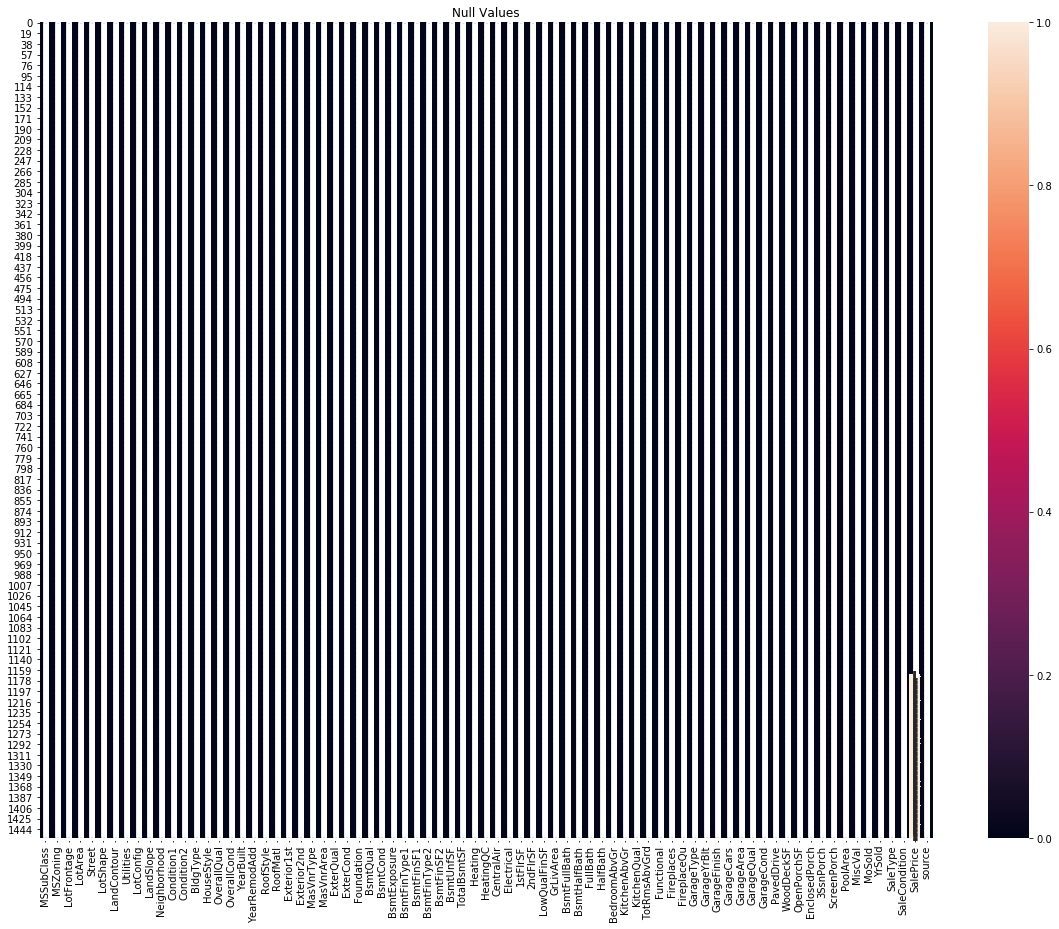

In [24]:
plt.figure(figsize = [20, 15])
sns.heatmap(df.isnull(), annot = True)                           #Visual representation of null values present in dataset
plt.title('Null Values')
plt.show()

# EDA

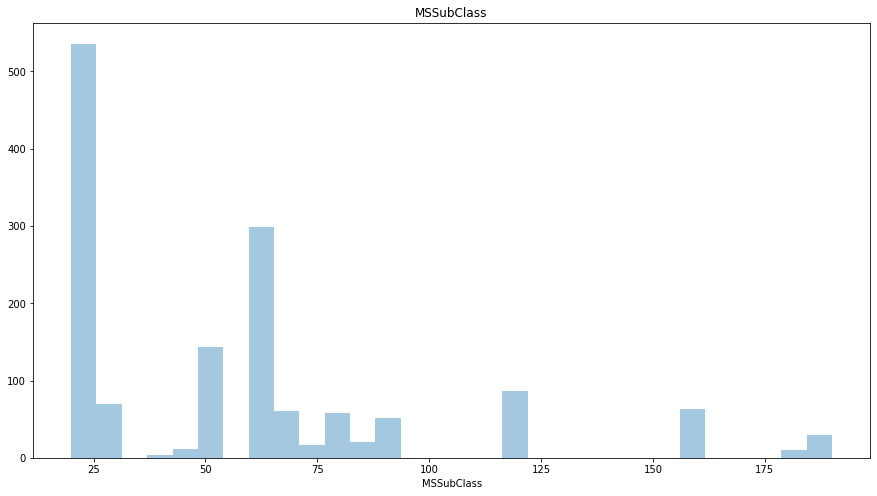

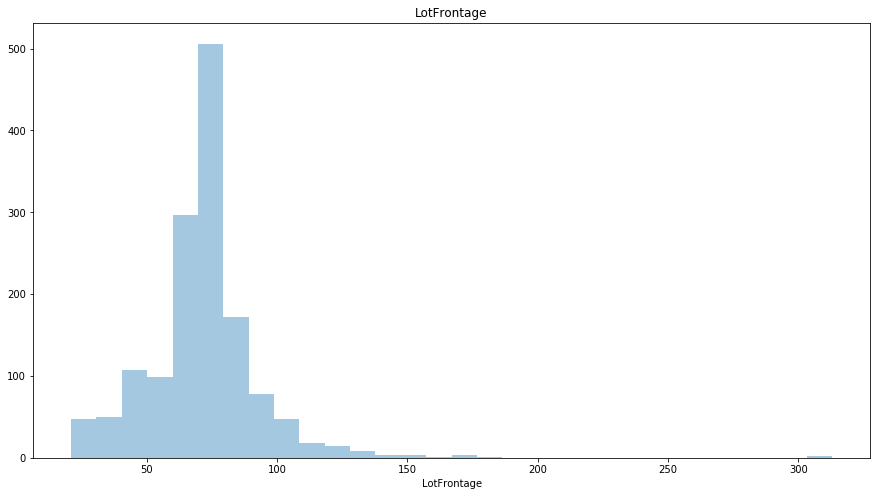

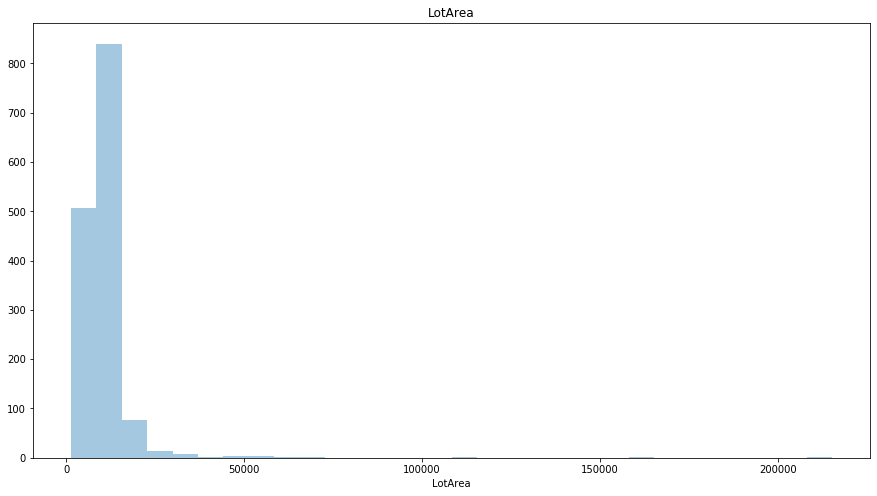

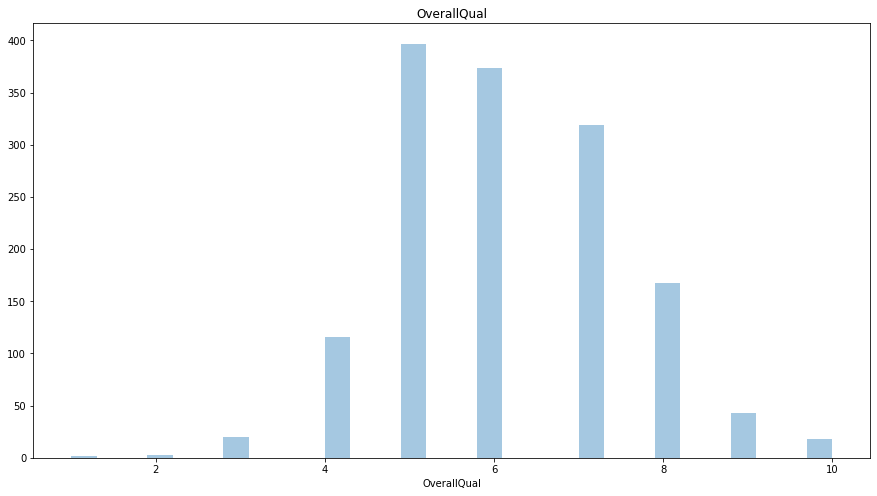

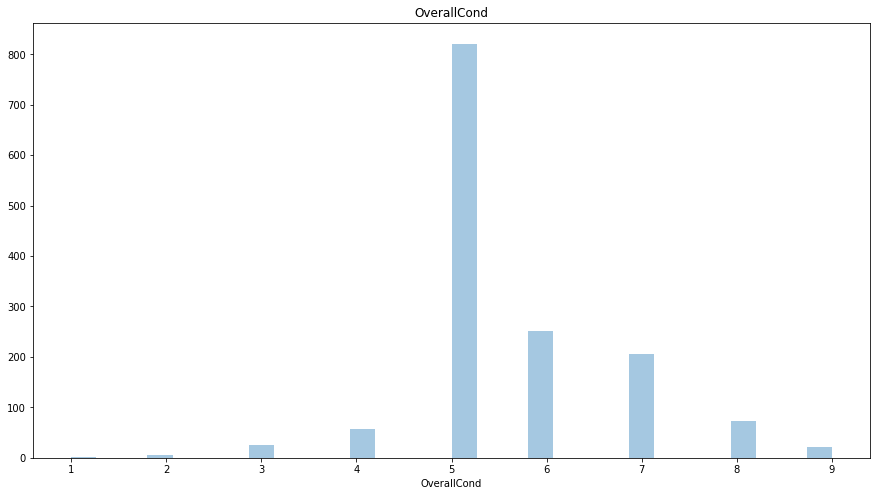

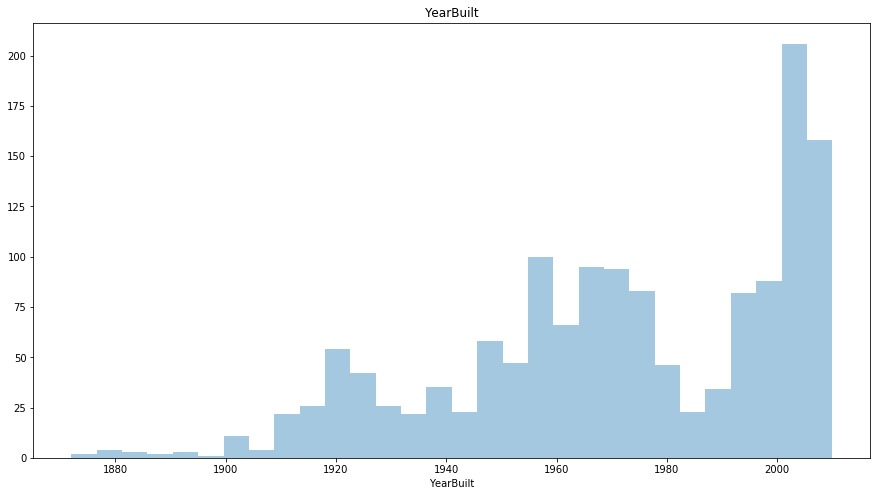

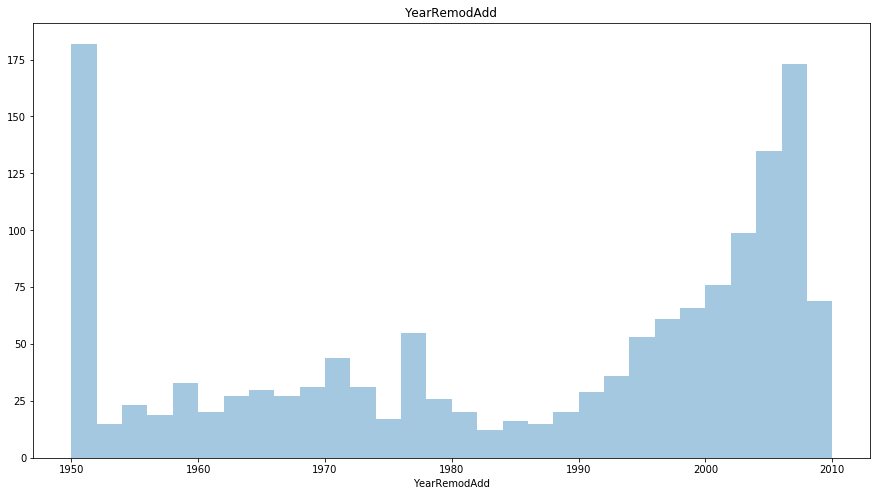

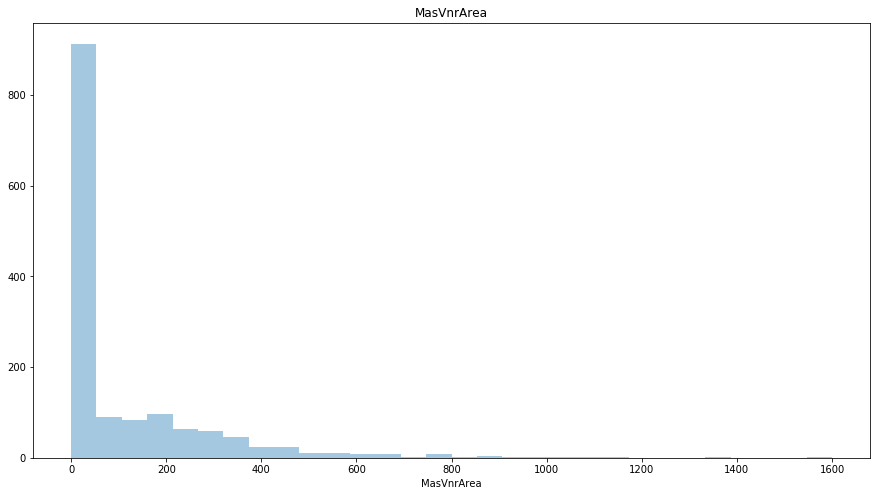

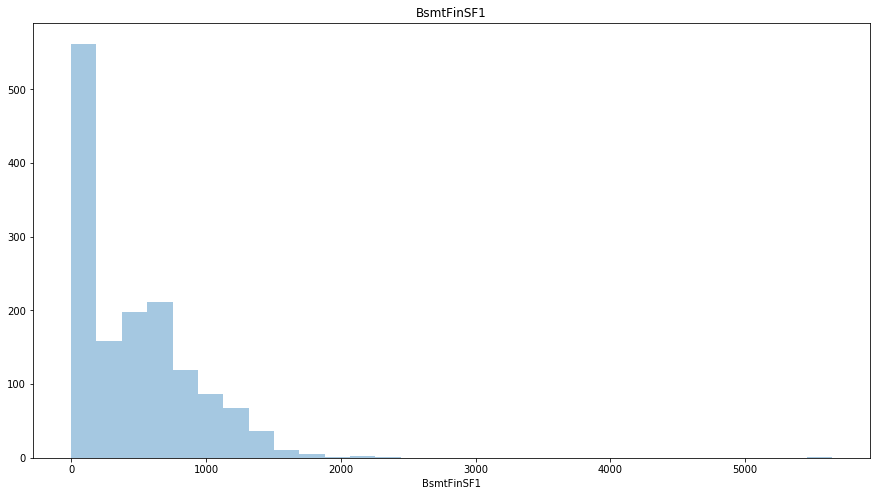

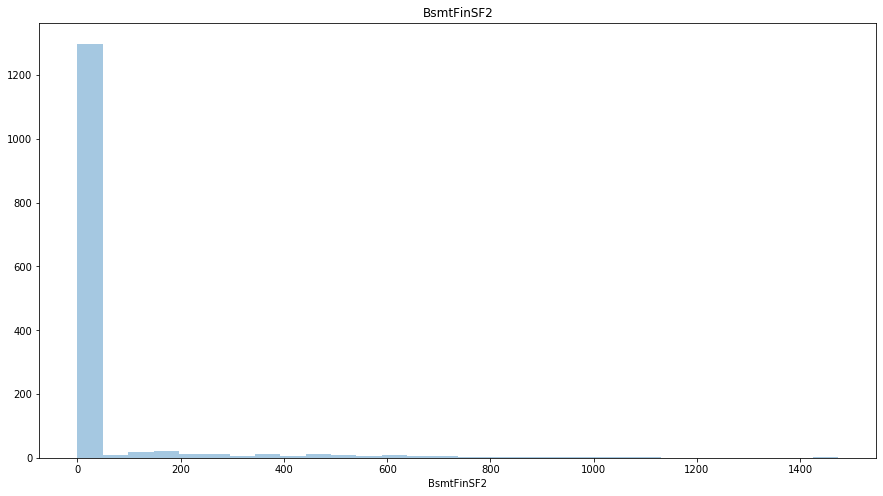

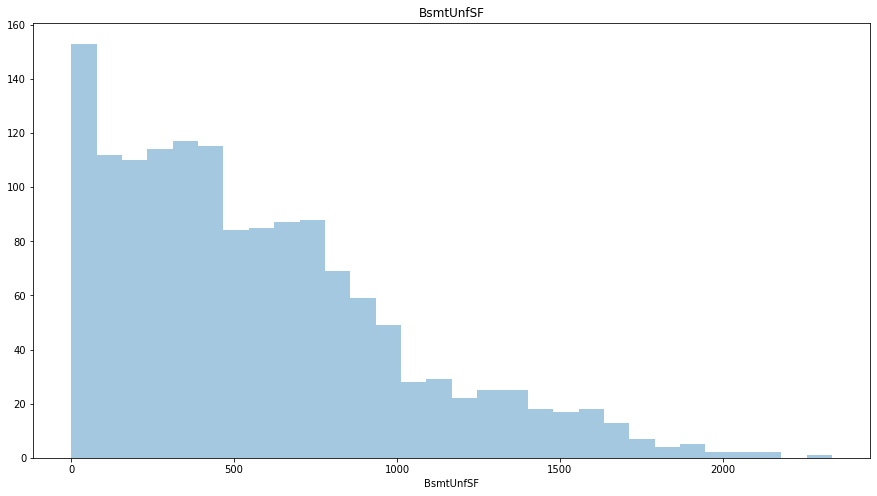

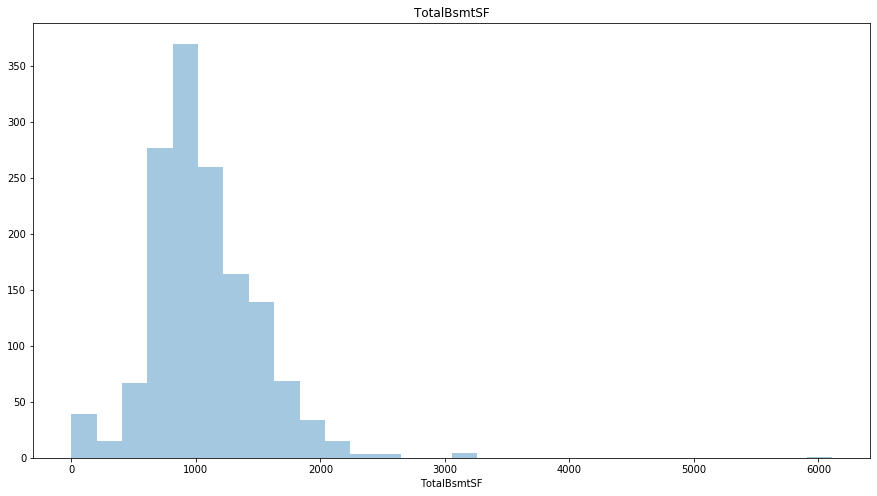

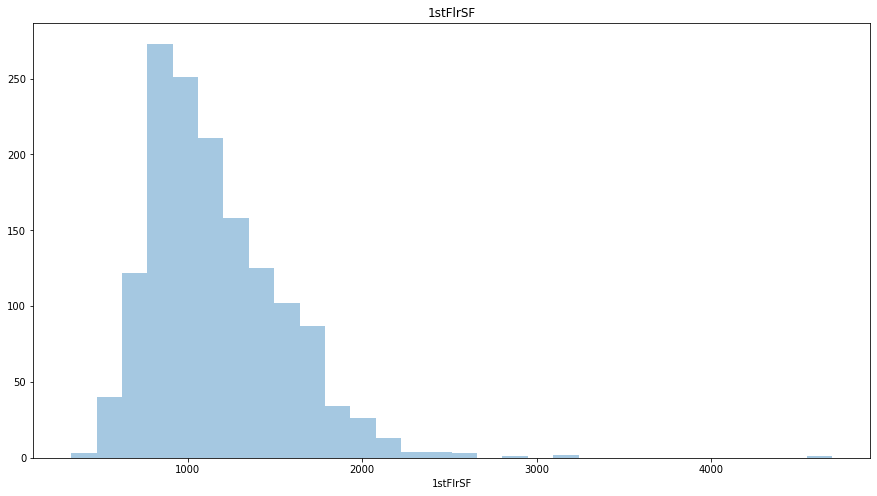

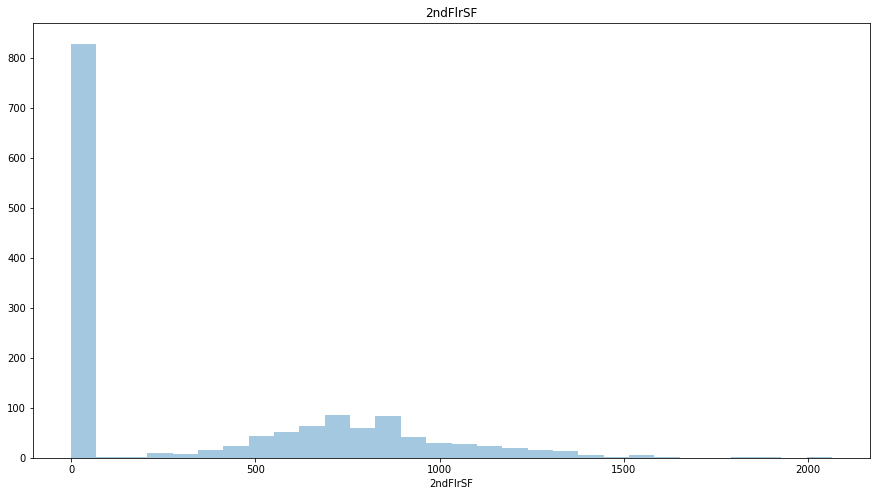

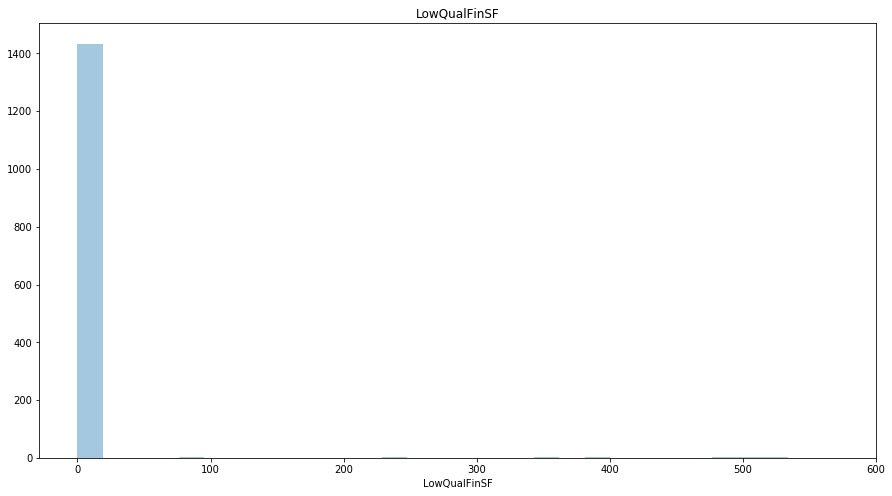

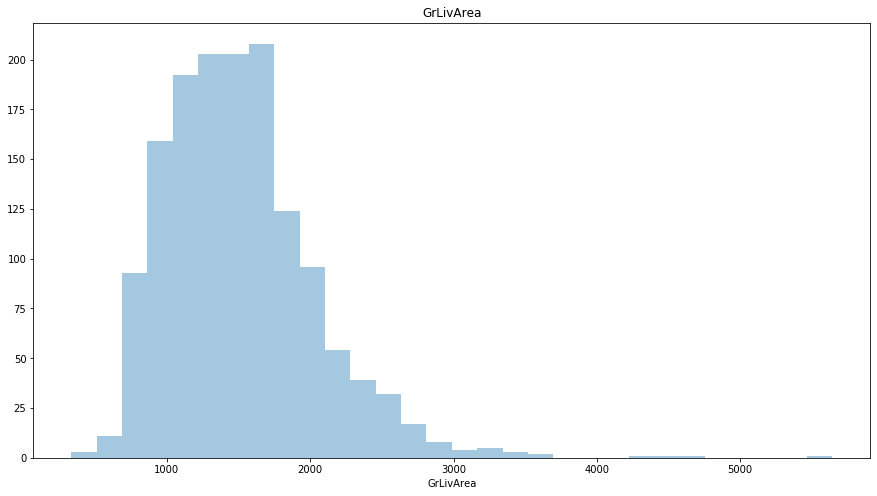

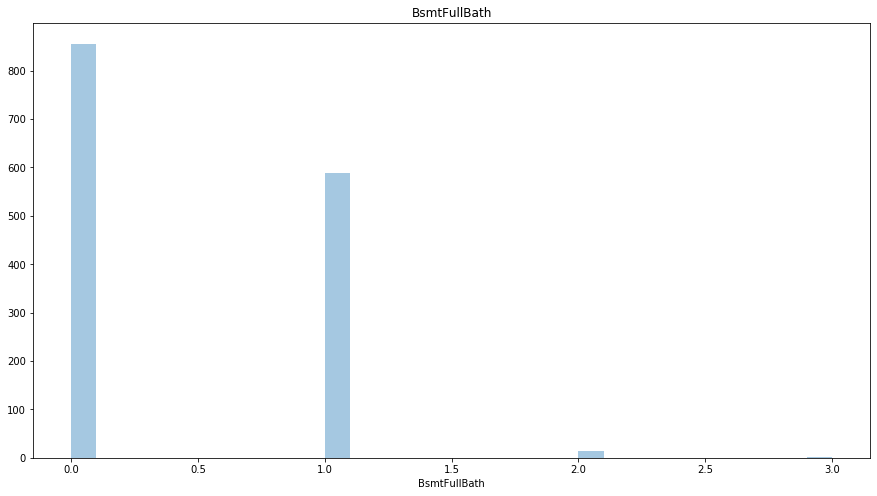

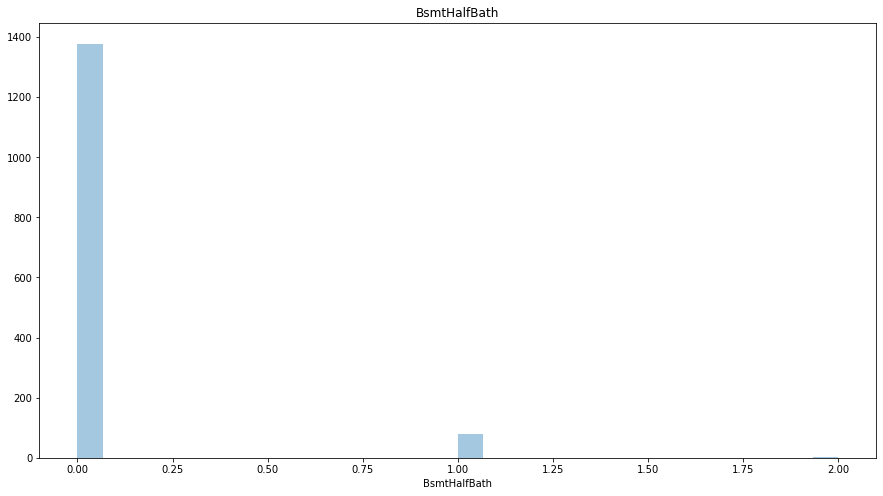

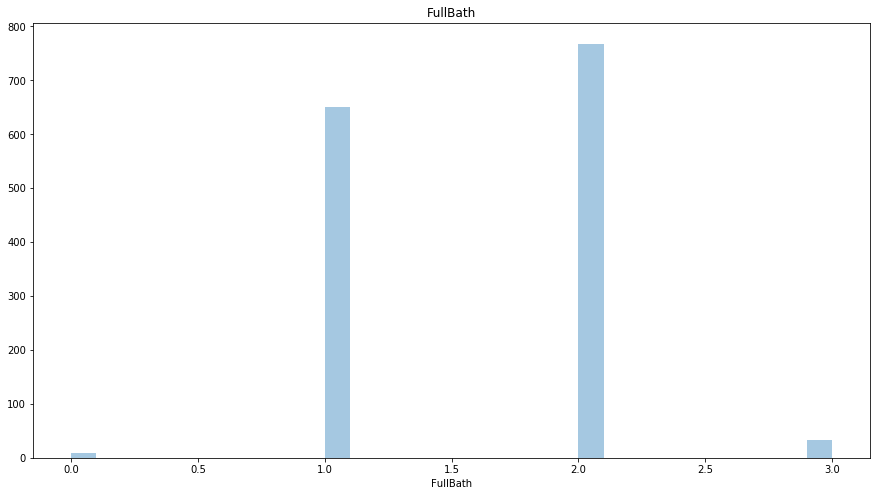

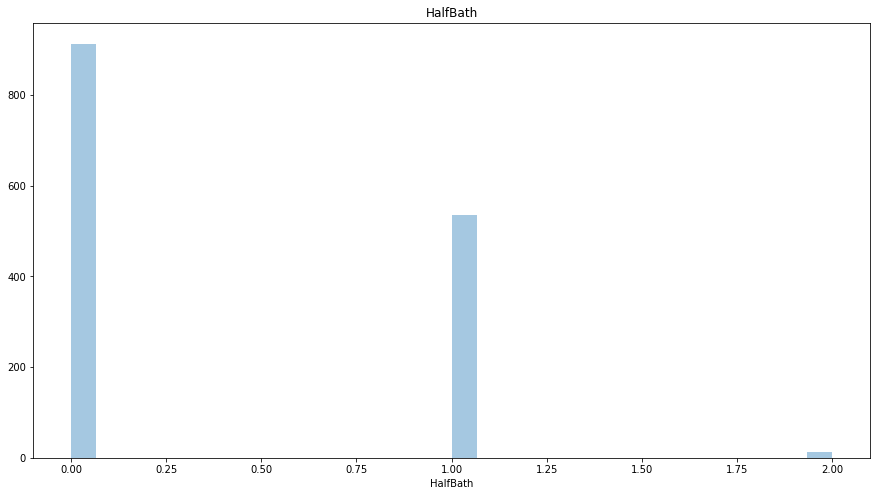

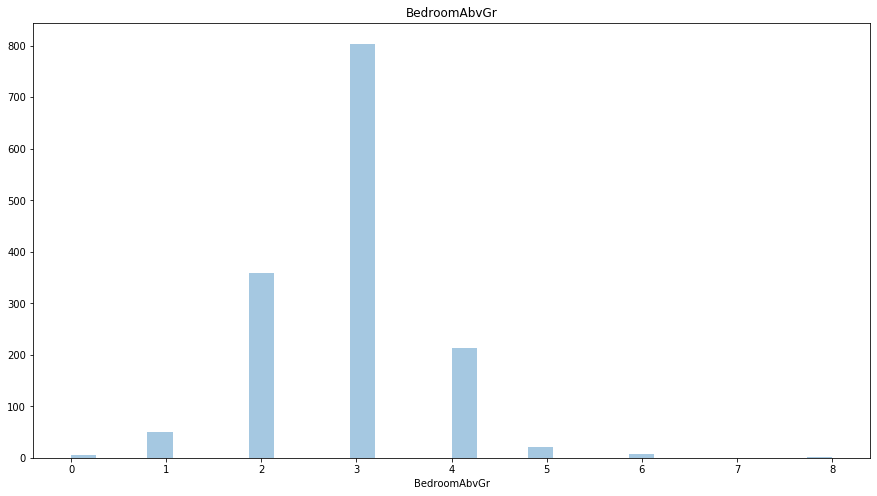

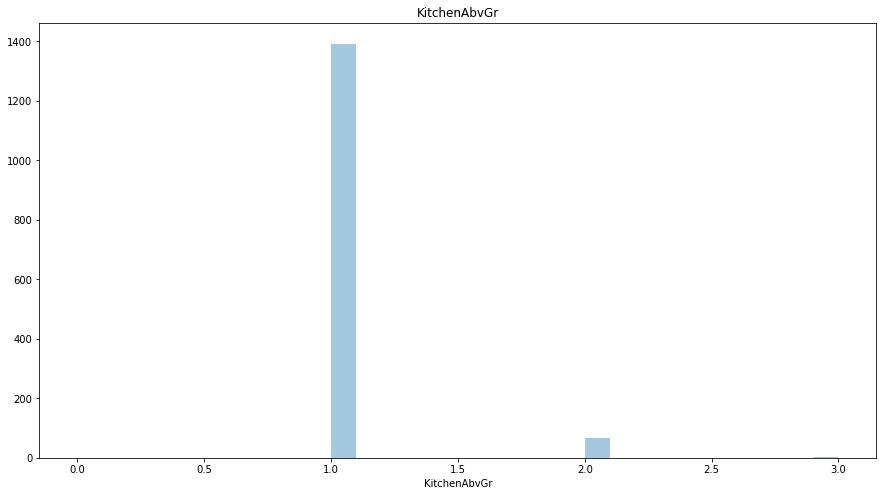

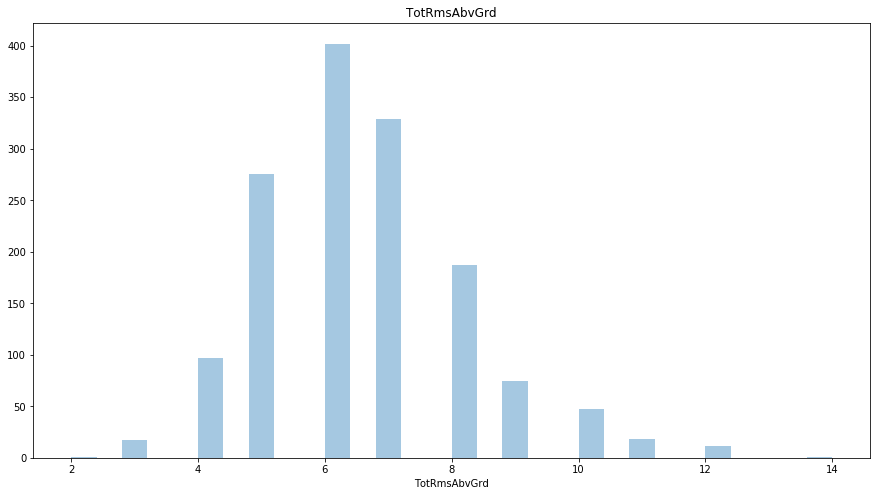

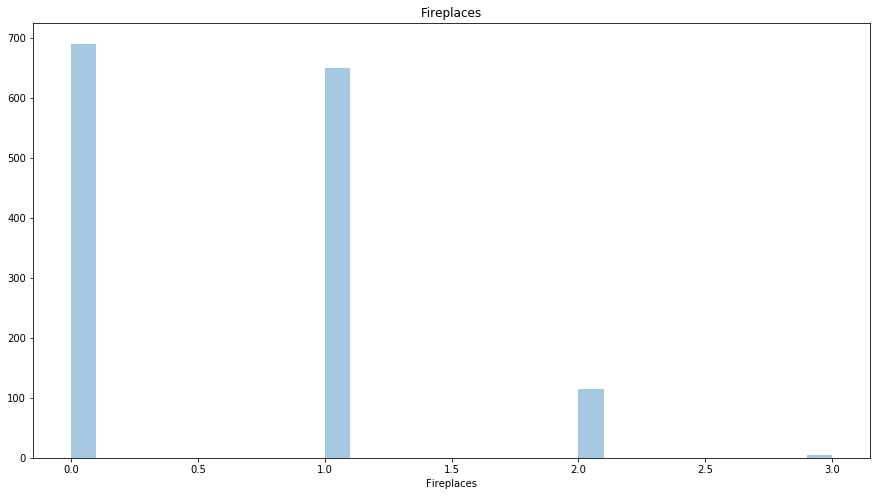

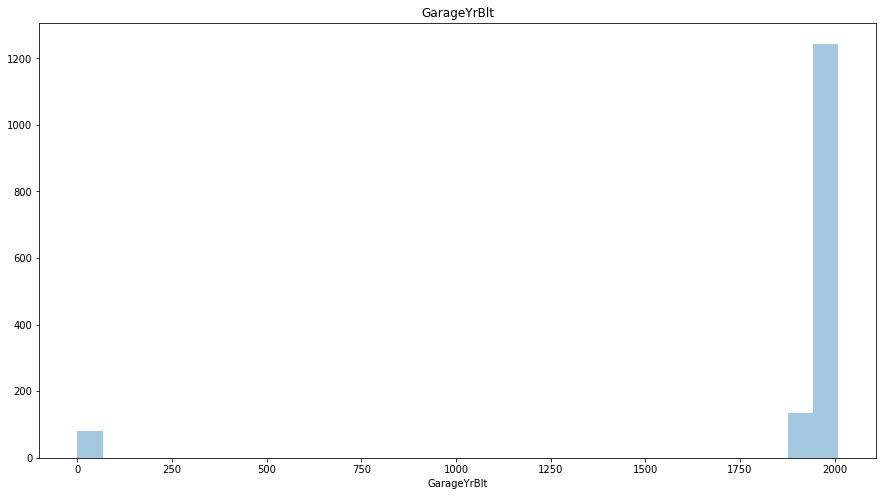

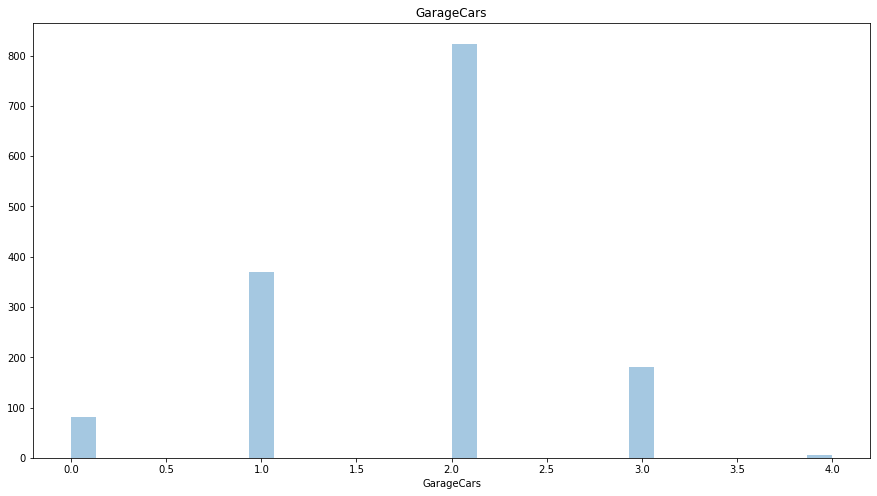

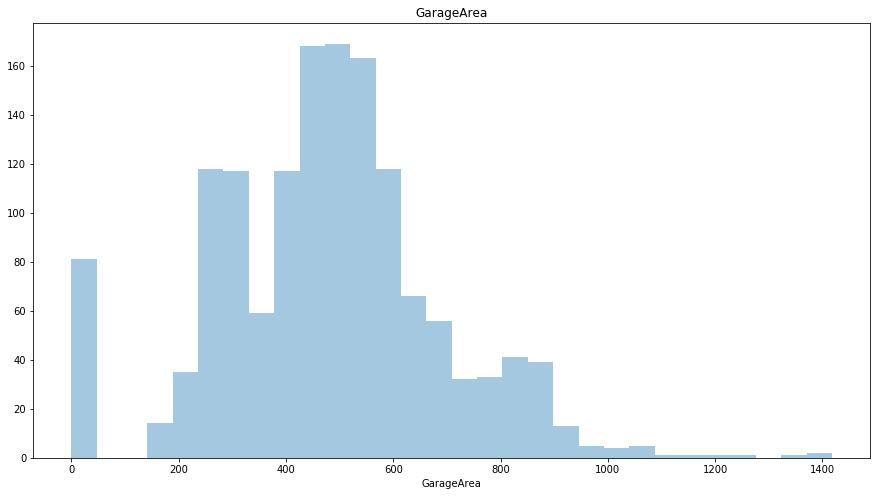

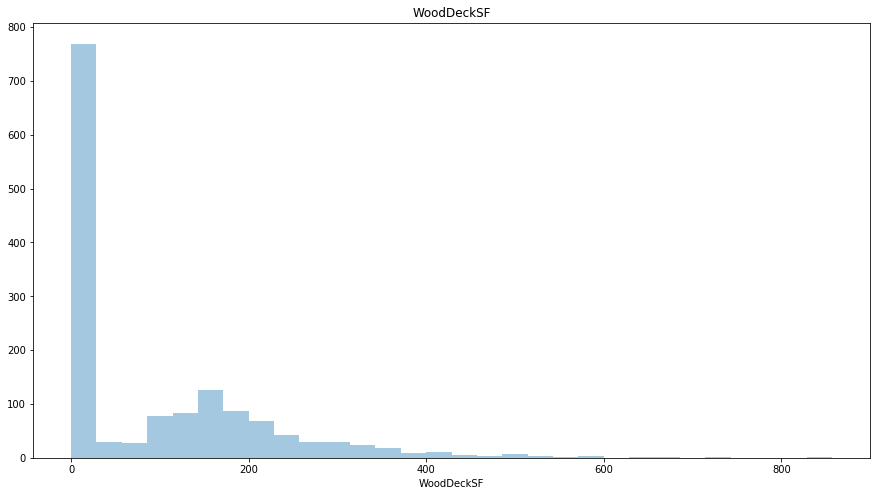

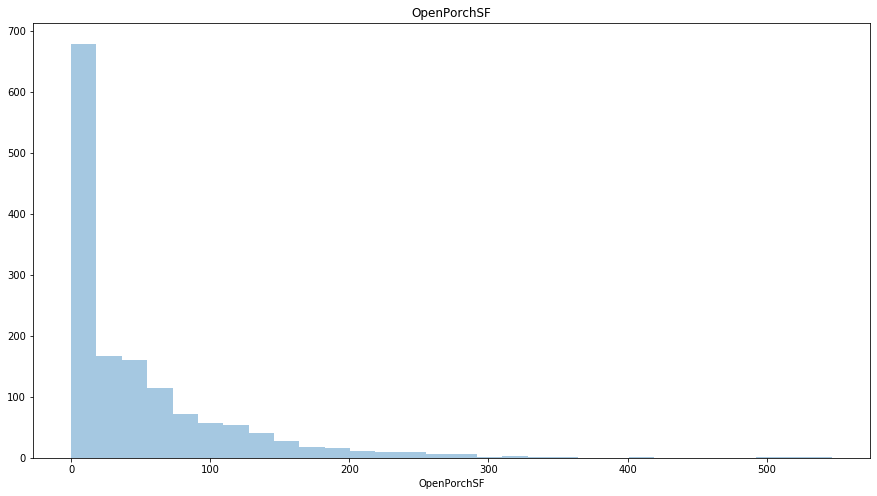

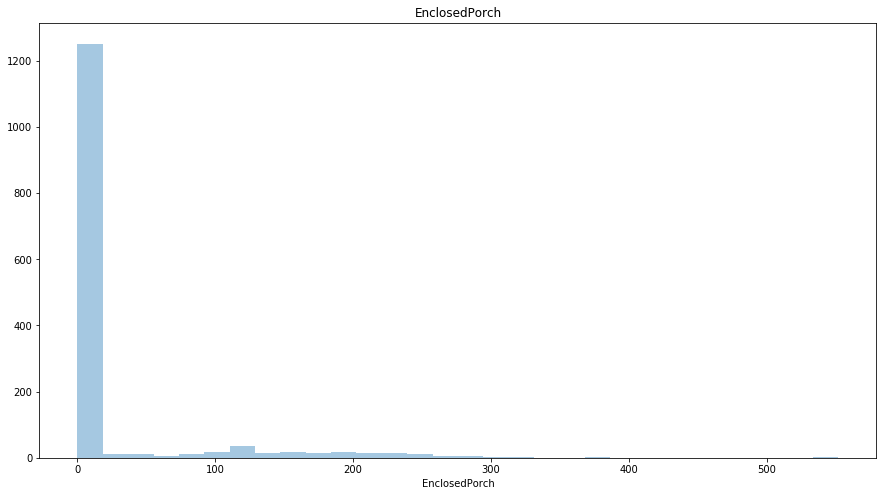

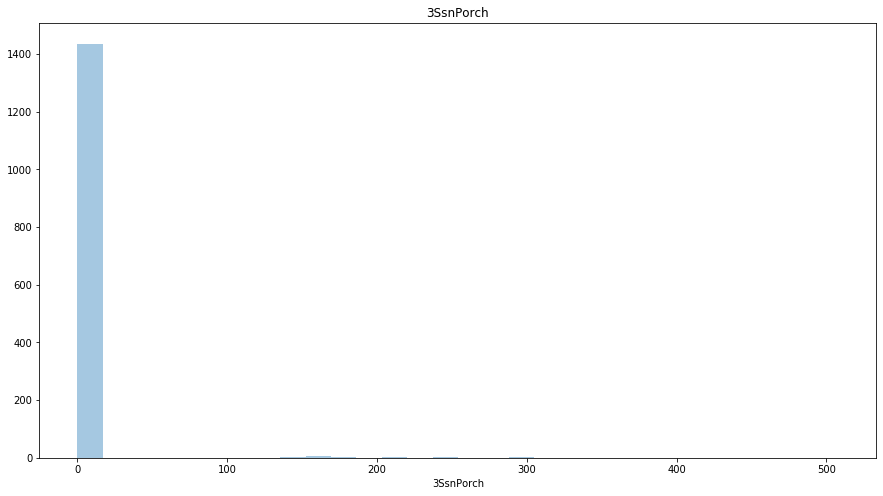

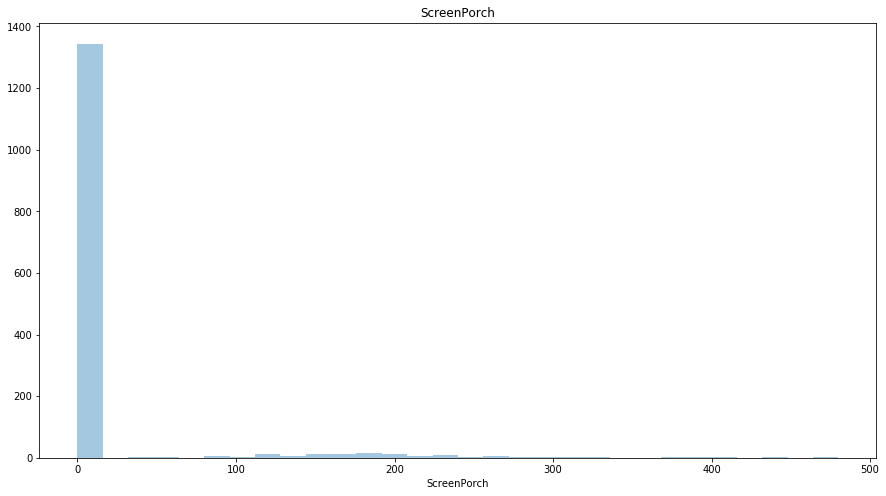

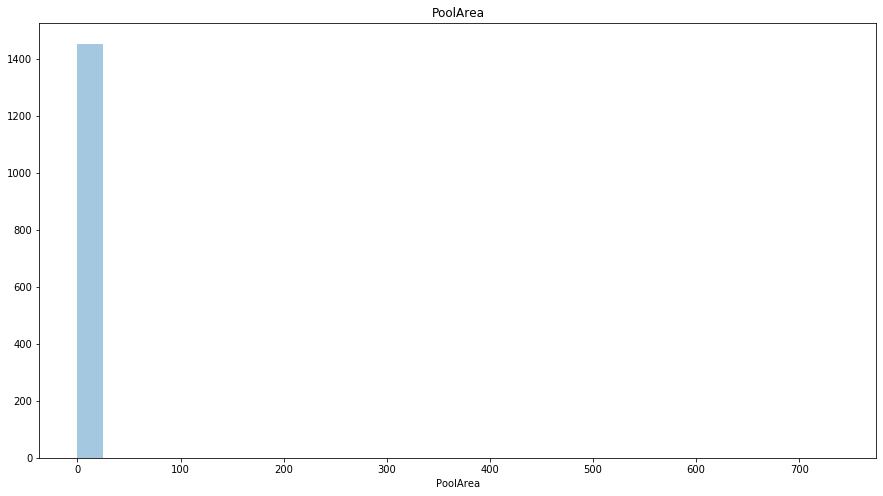

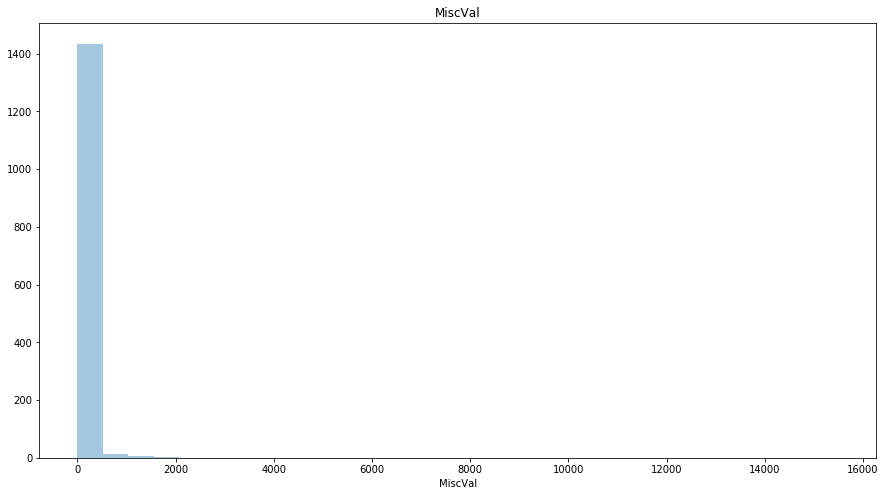

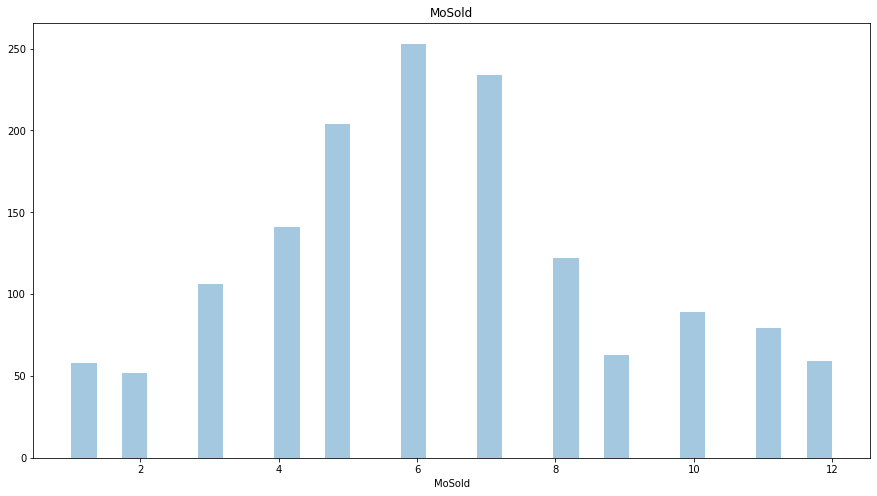

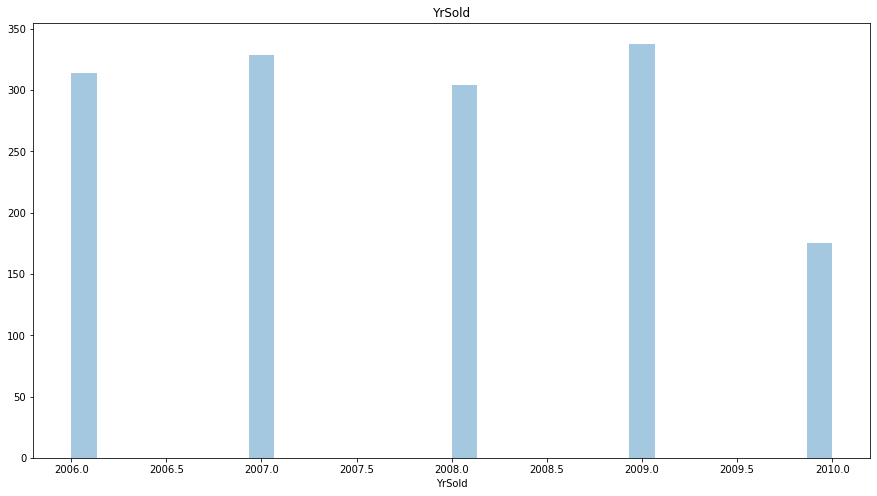

In [25]:
for i in df[num_cols]:
    plt.figure(figsize = (15, 8))
    sns.distplot(df[i], bins = 30, kde = False)
    plt.title(i)
    plt.show()

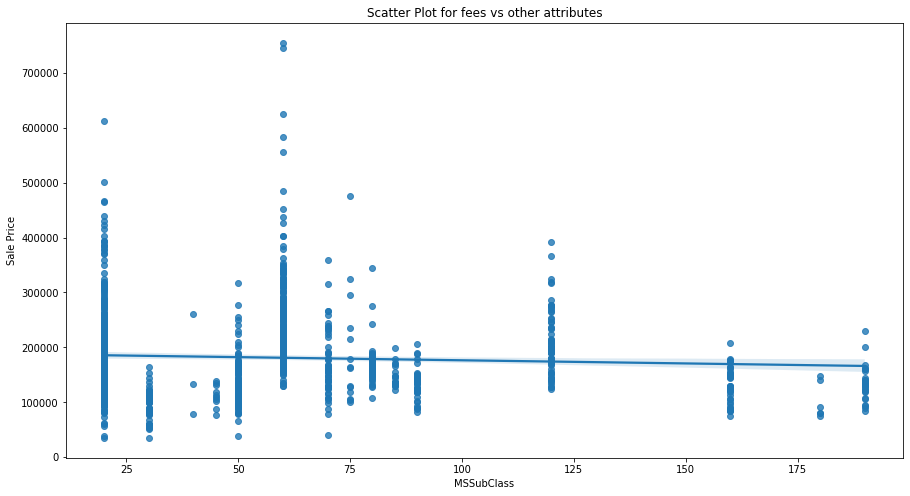

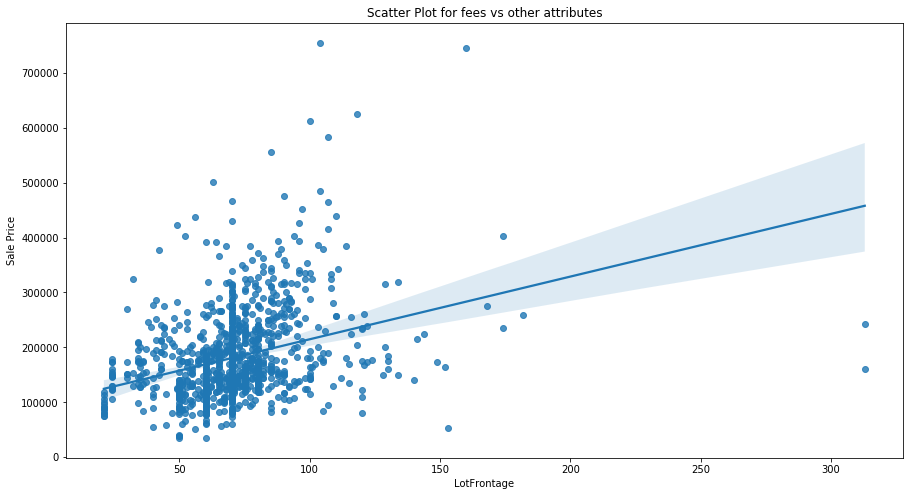

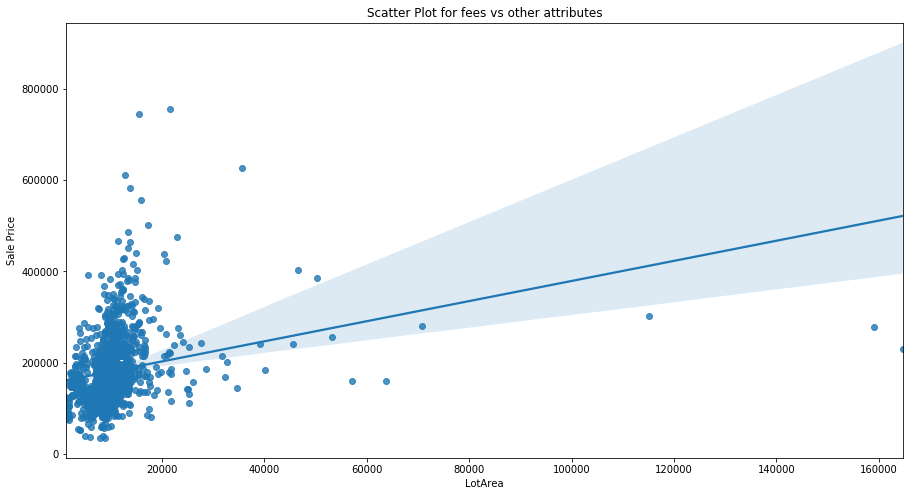

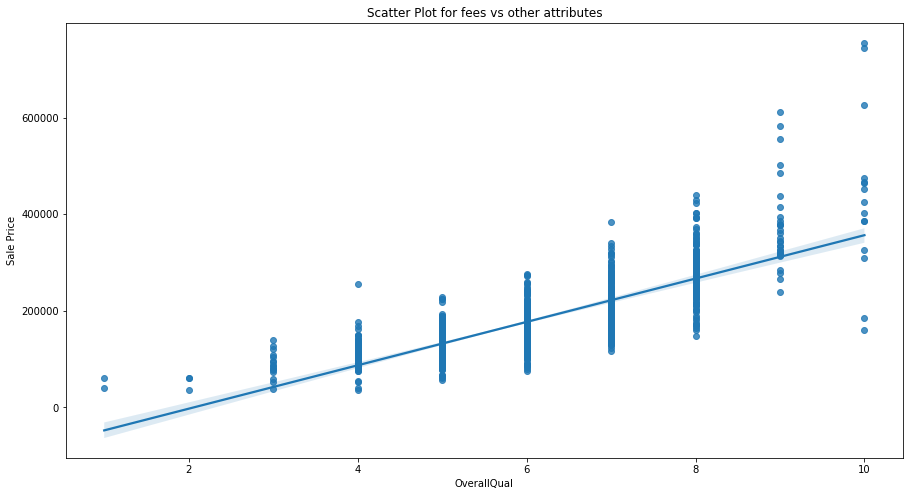

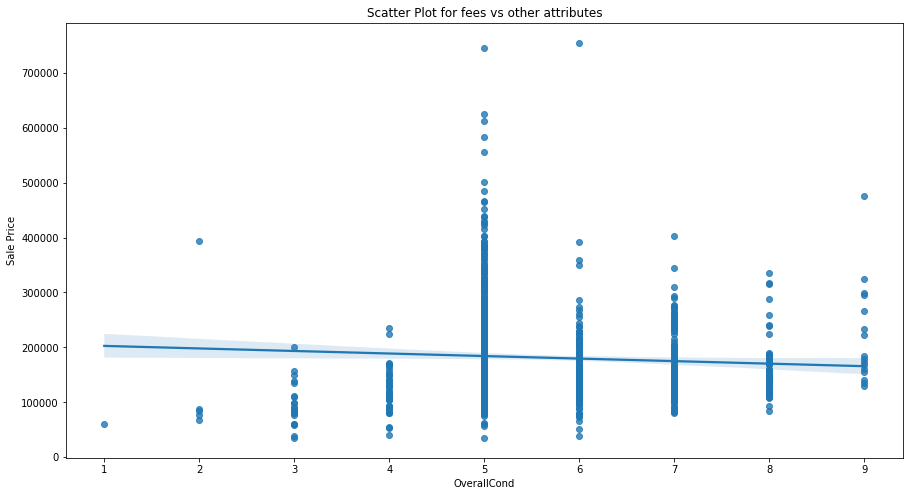

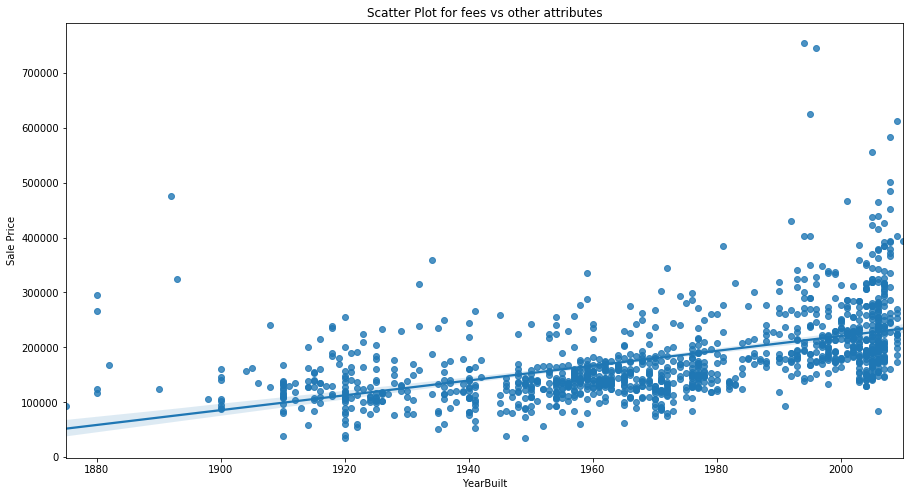

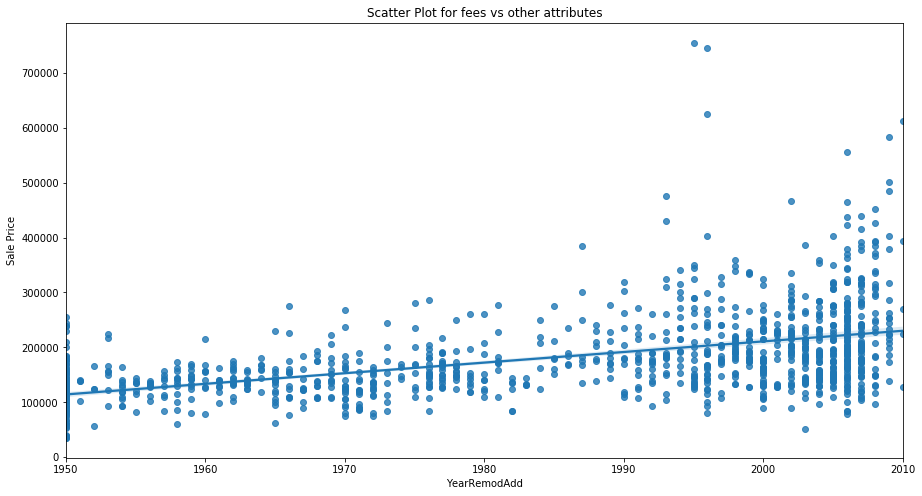

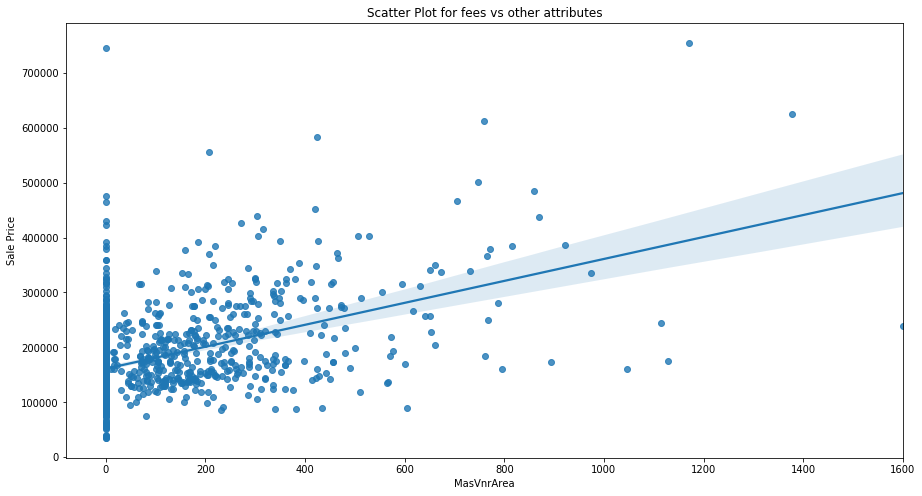

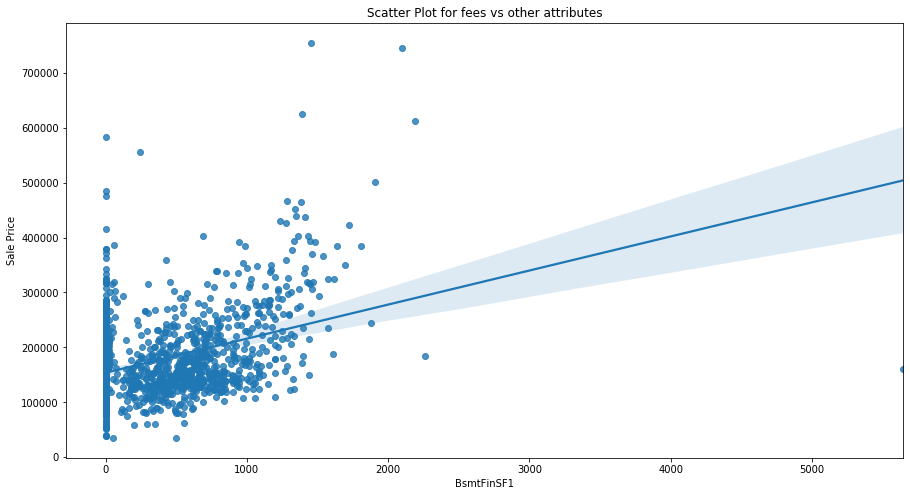

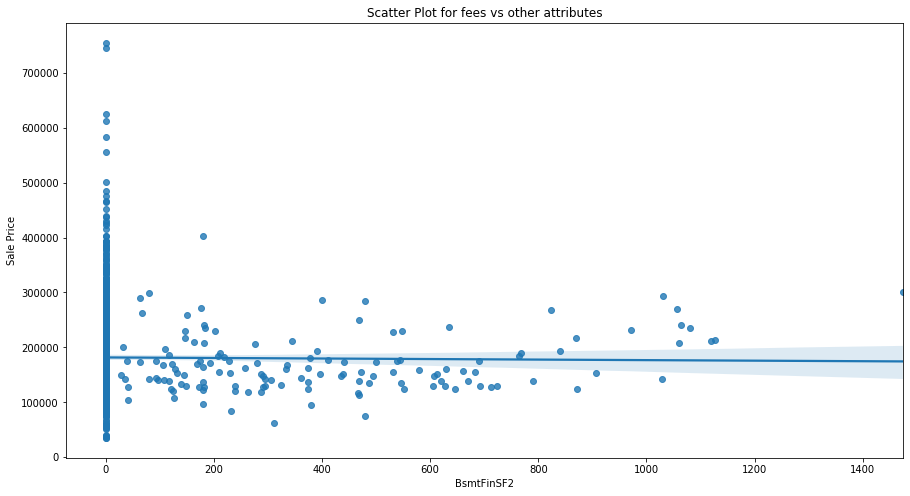

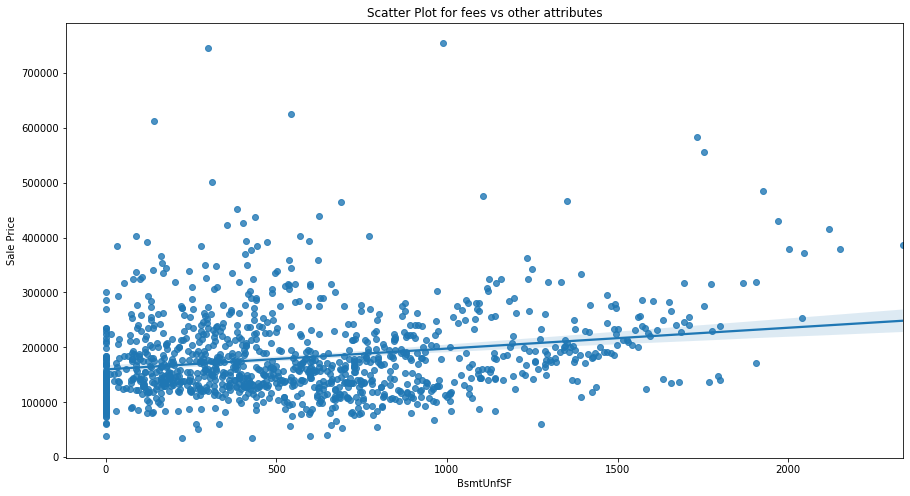

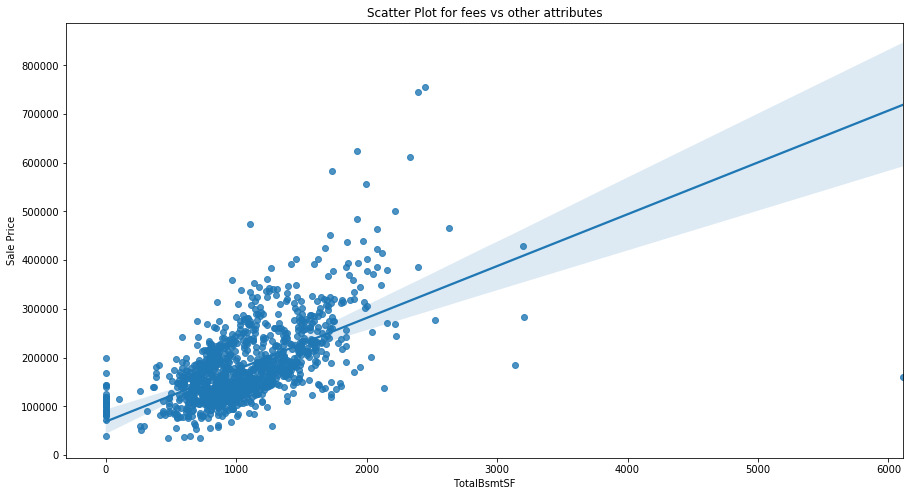

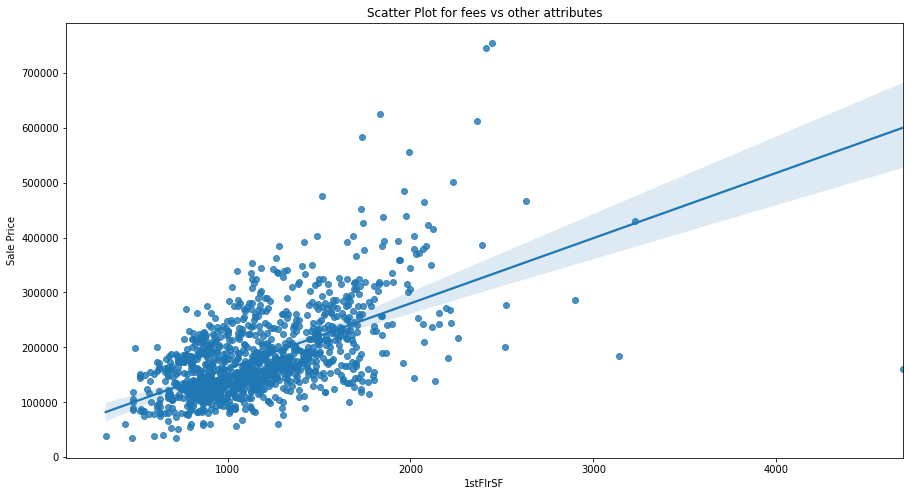

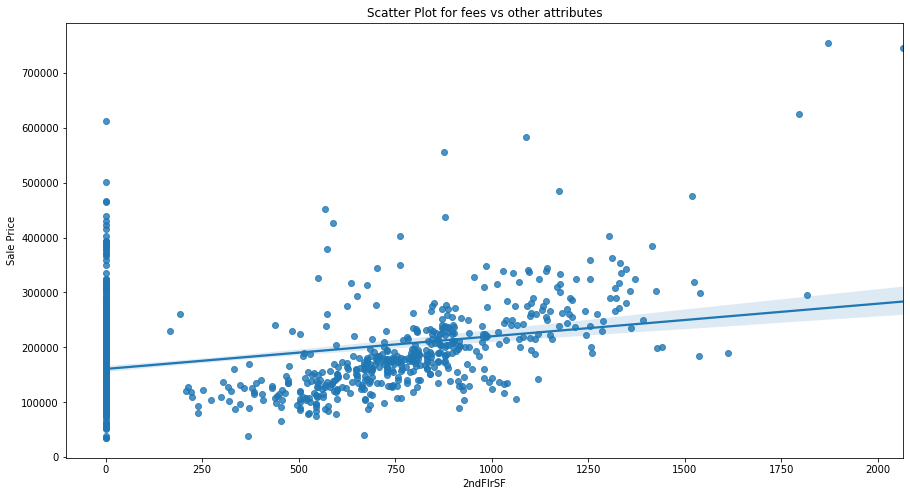

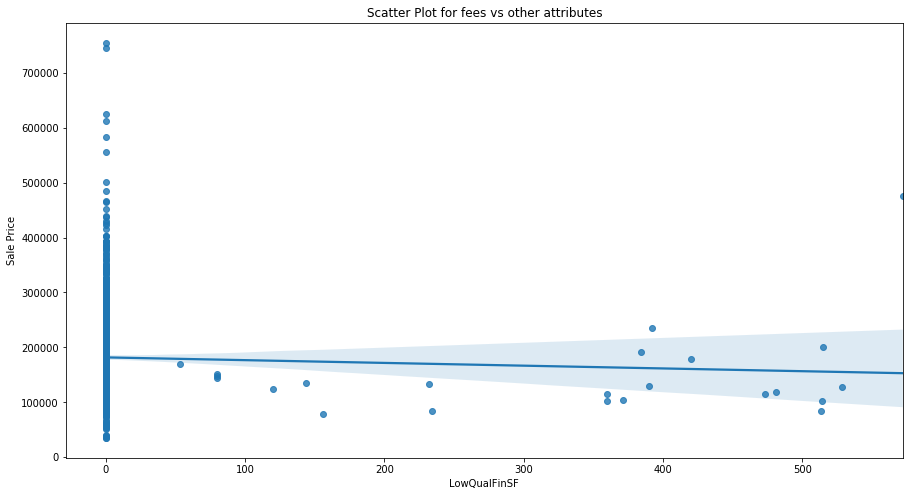

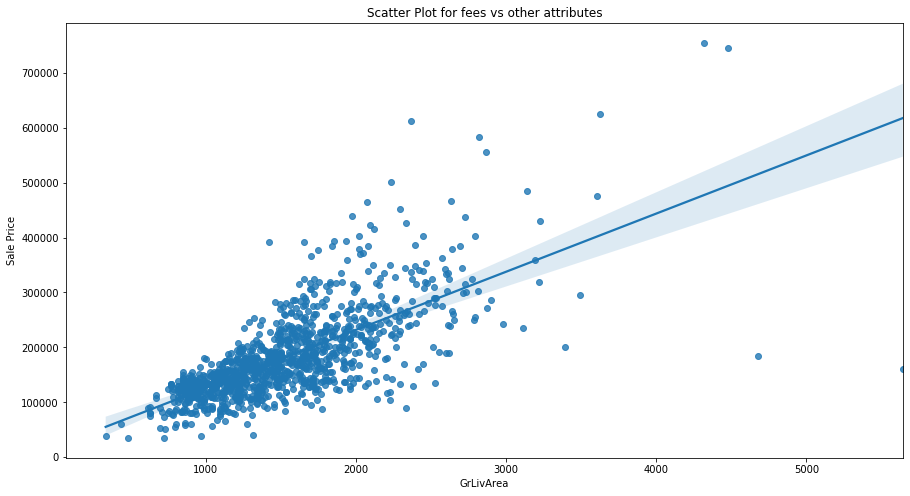

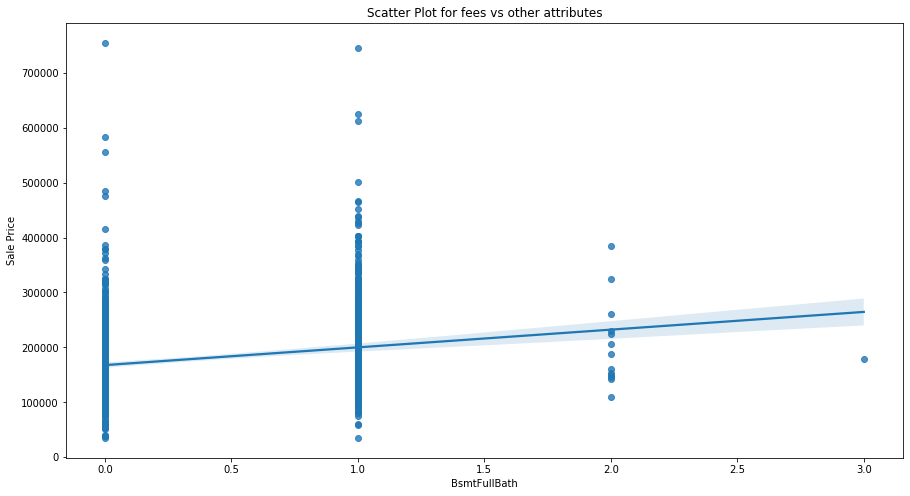

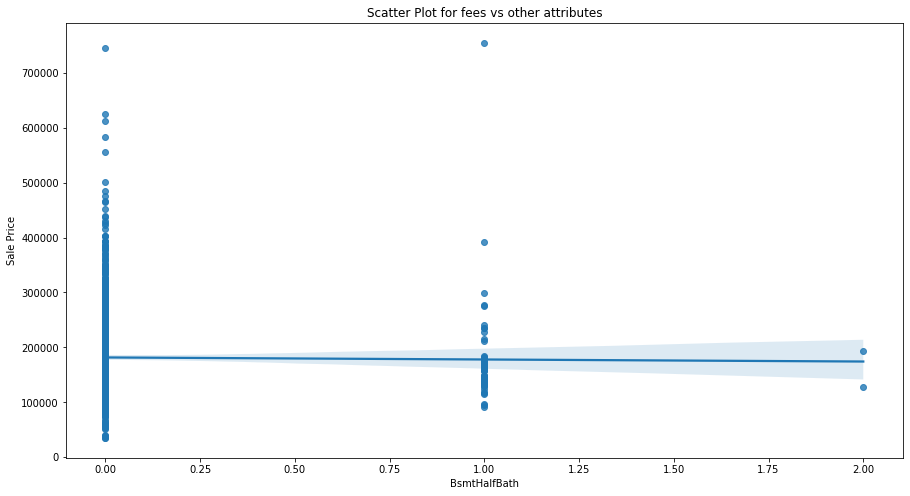

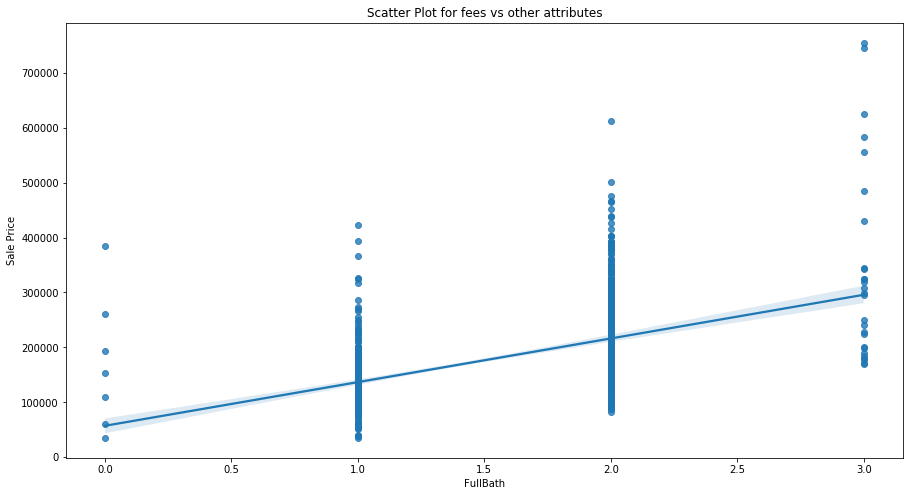

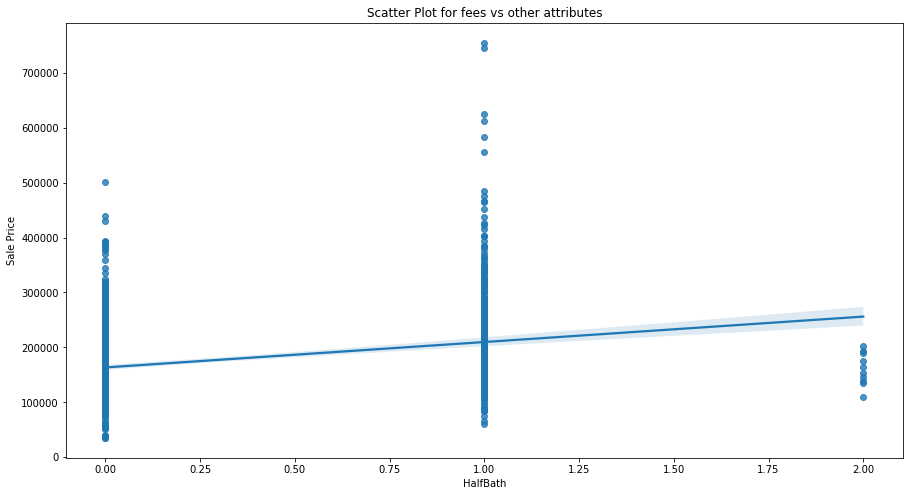

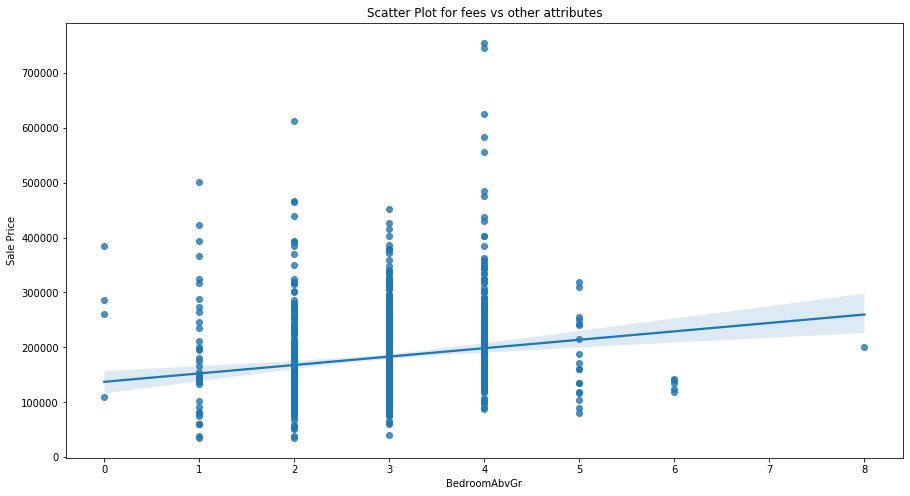

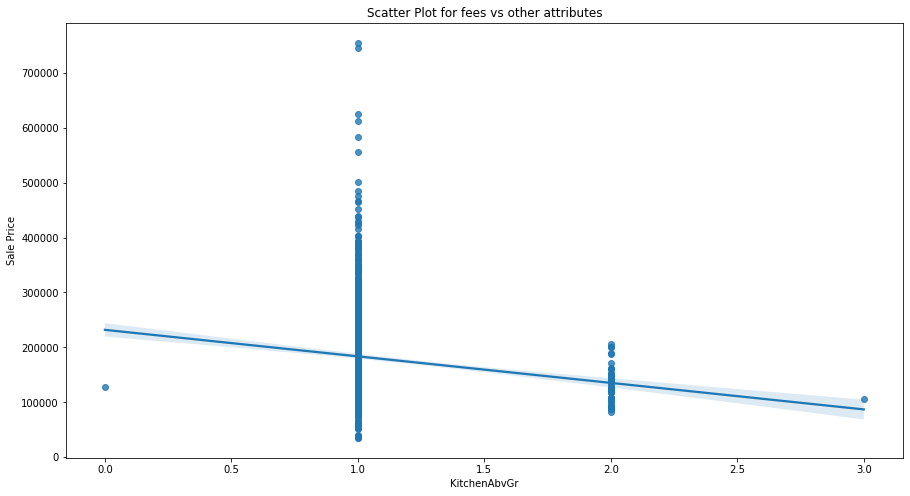

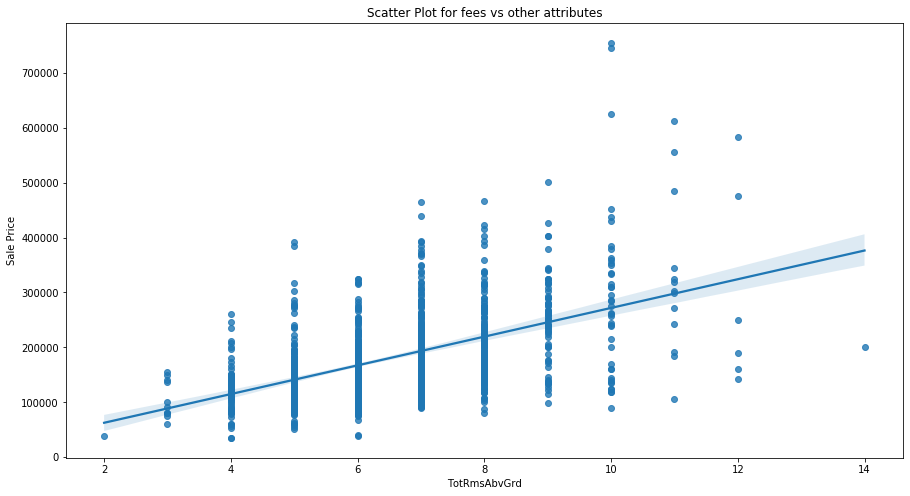

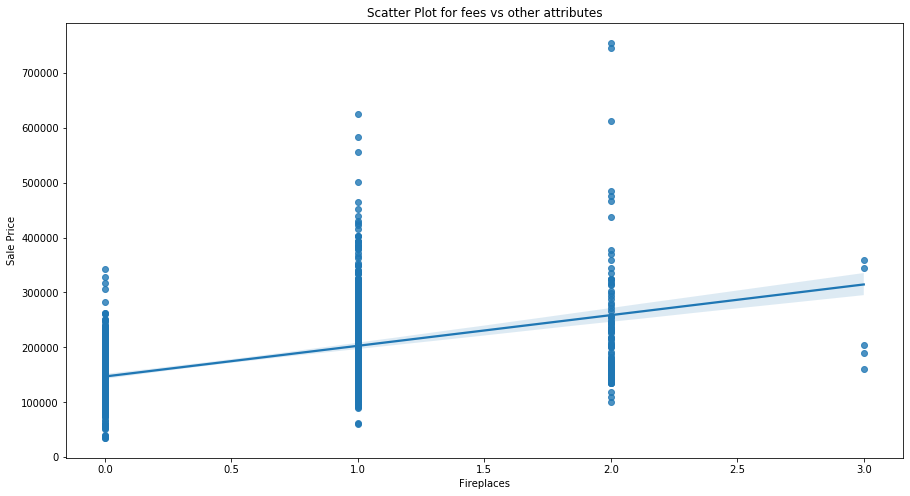

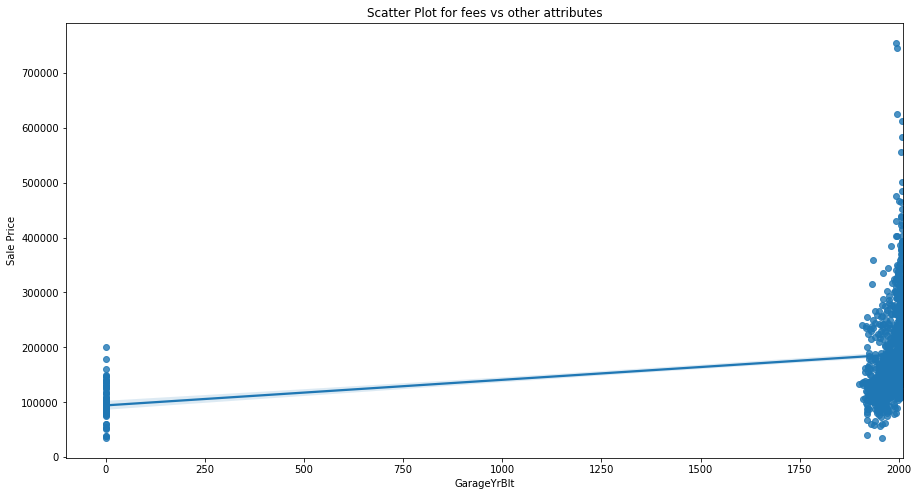

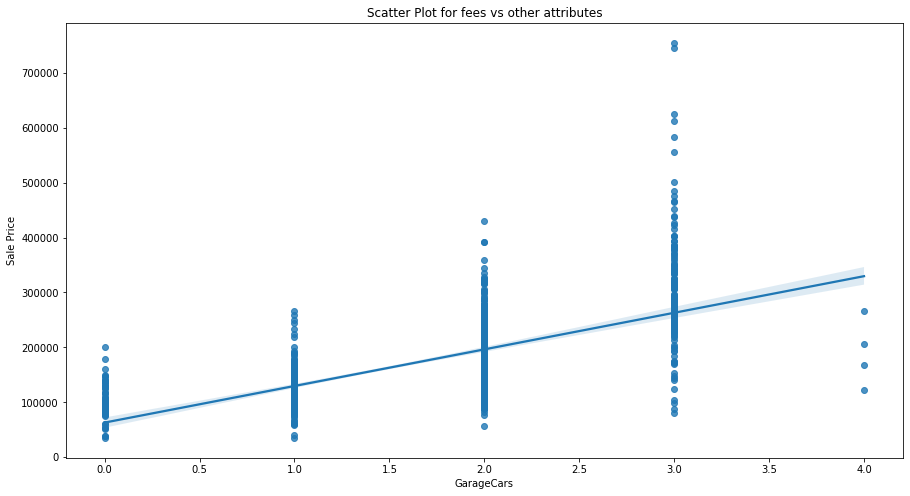

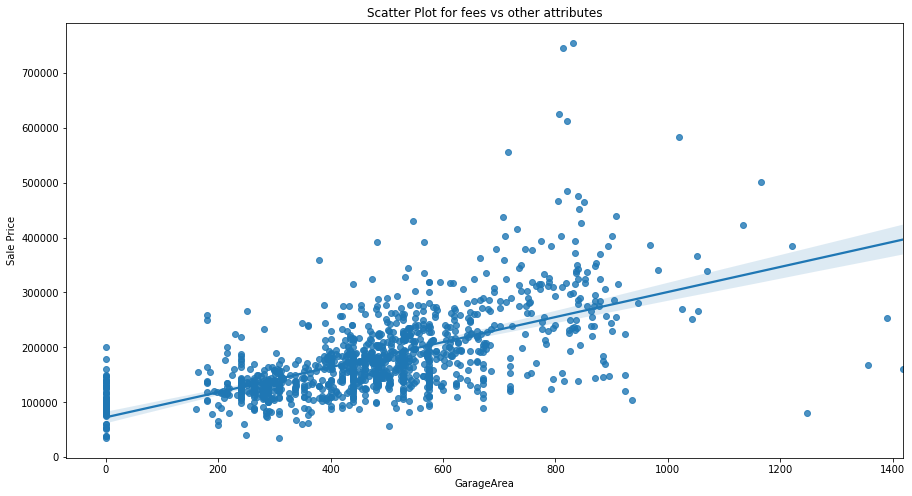

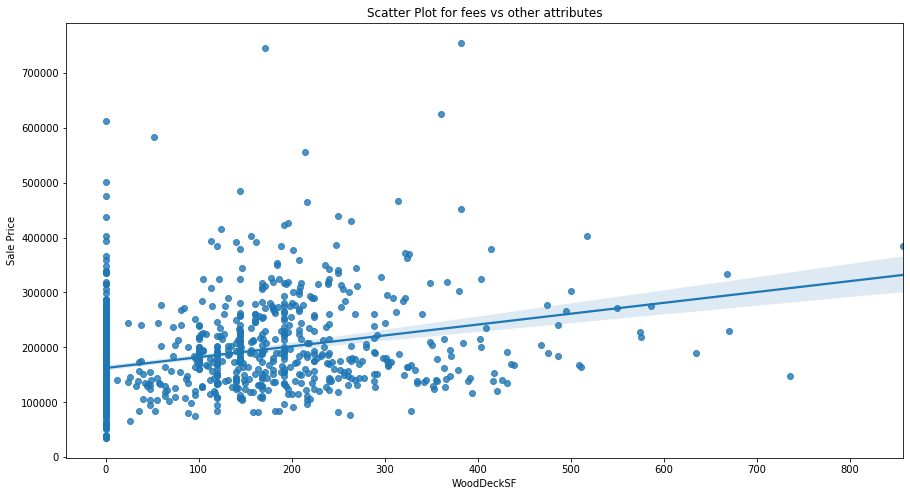

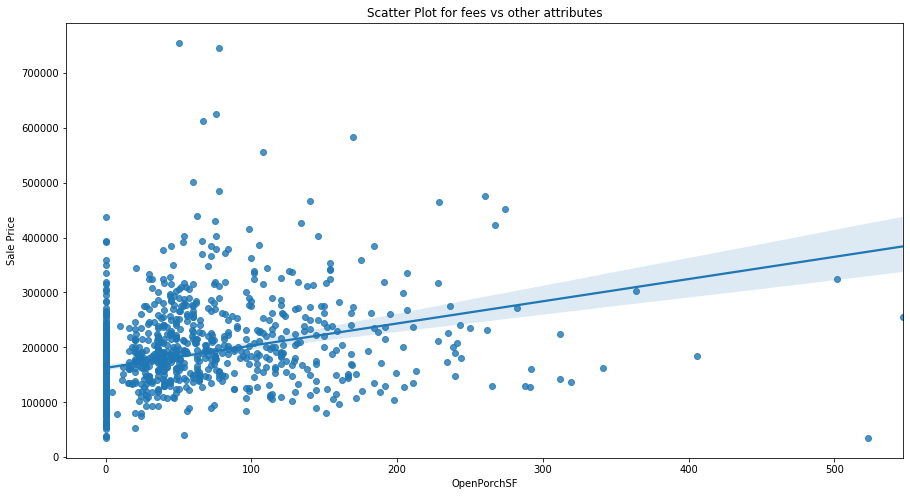

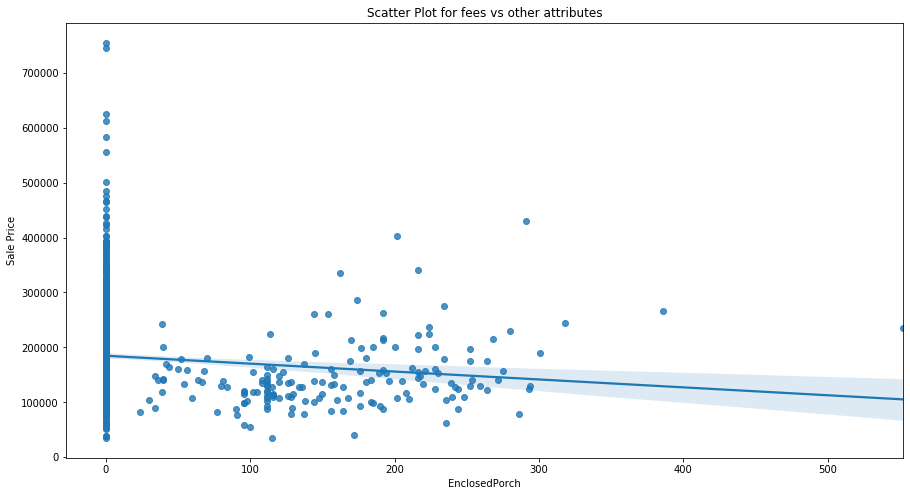

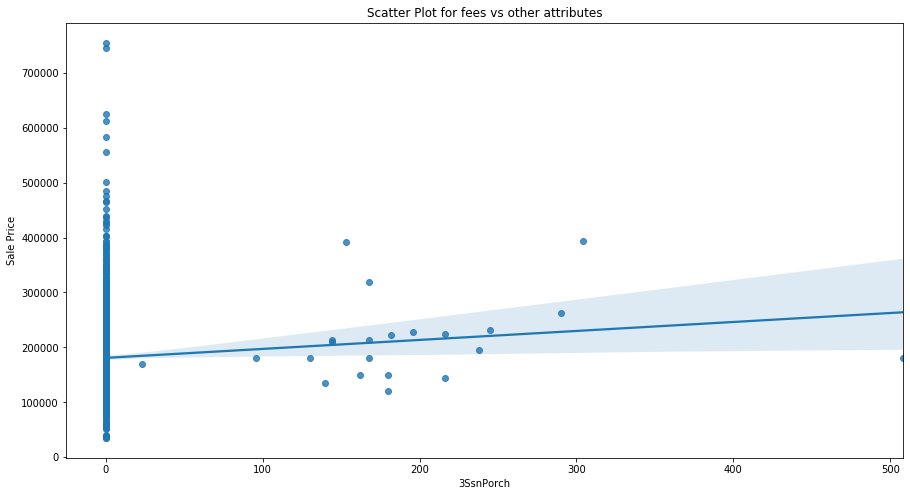

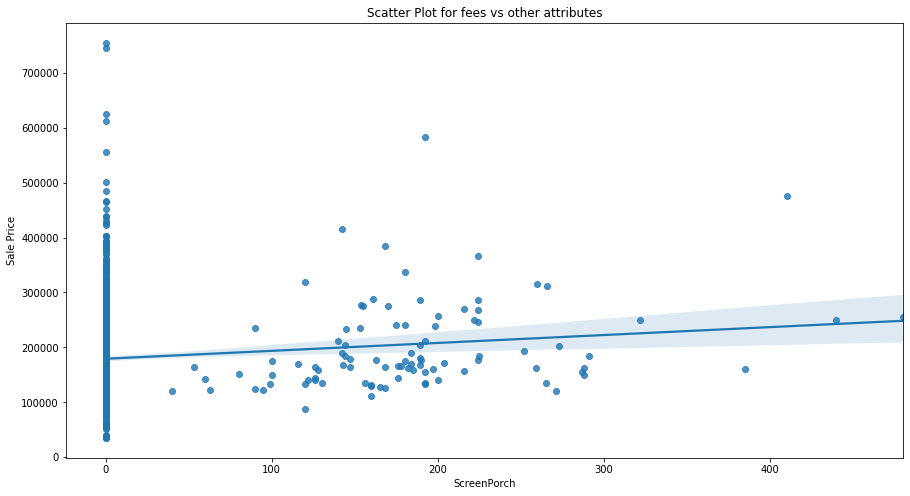

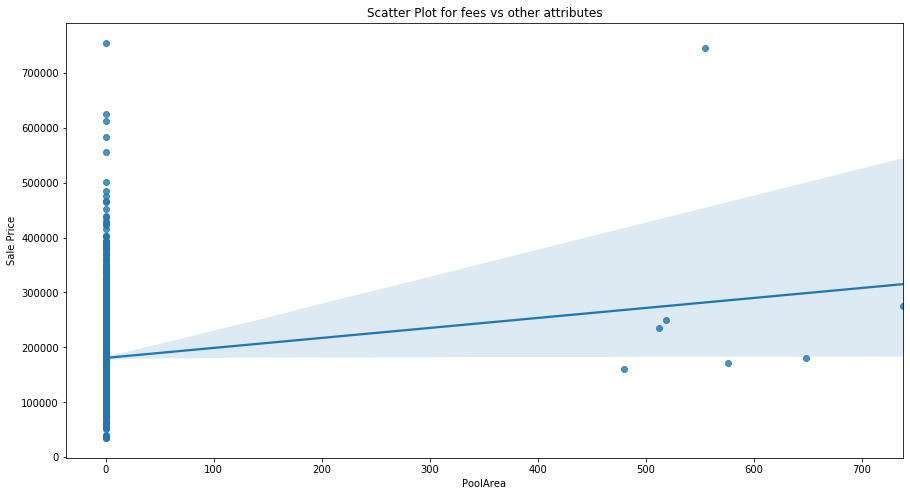

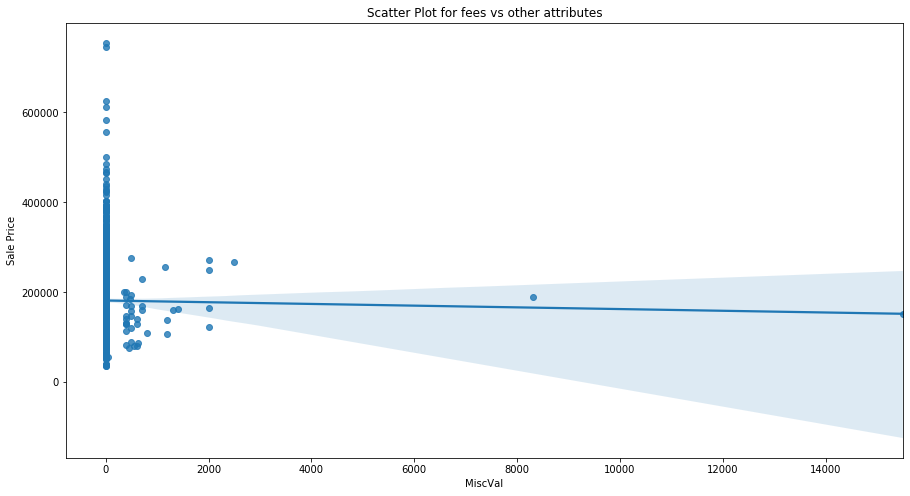

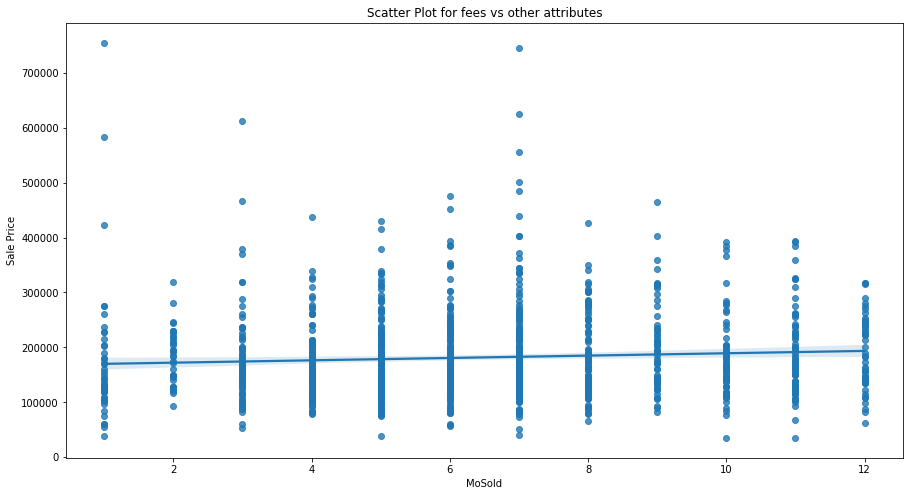

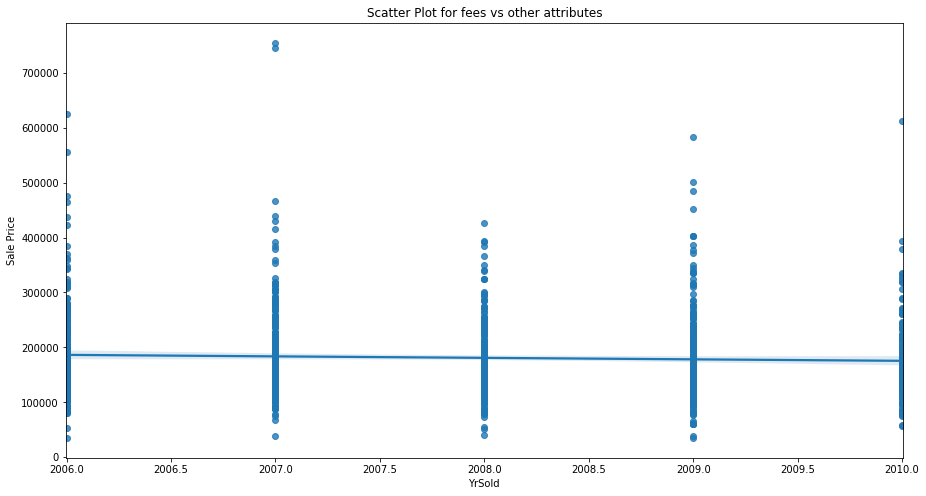

In [26]:
for i in df[num_cols]:                                      #bivariate analysis
    plt.figure(figsize = (15, 8))
    sns.regplot(df[i], df['SalePrice'])
    plt.title('Scatter Plot for fees vs other attributes')
    plt.xlabel(i)
    plt.ylabel('Sale Price')  
    plt.show()

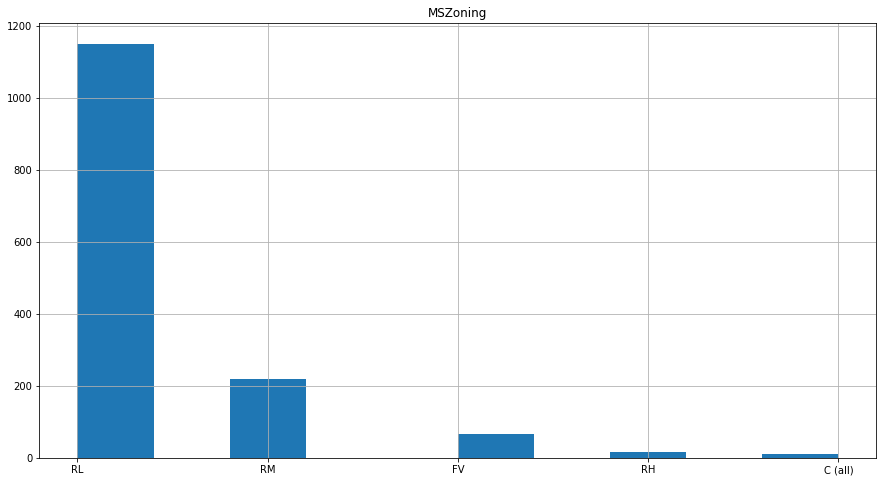

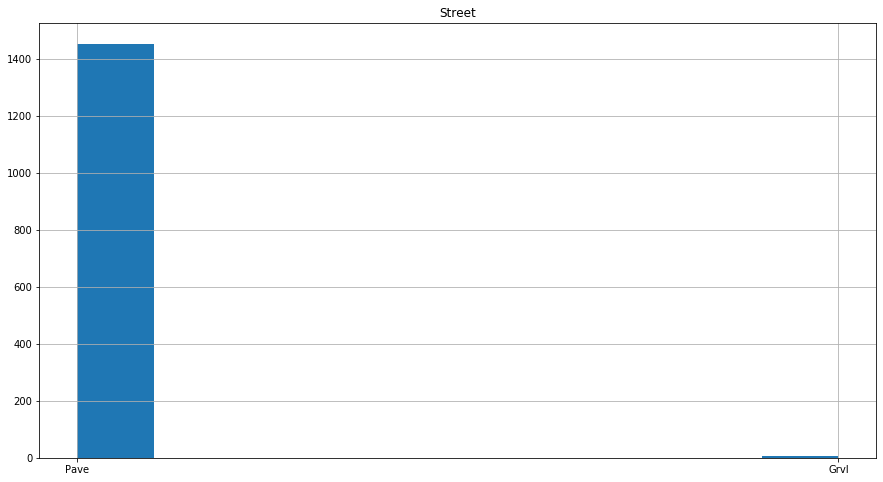

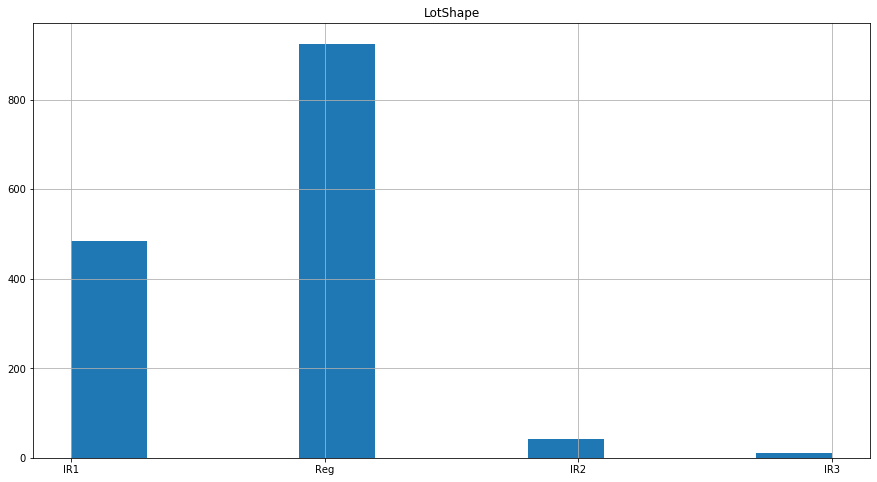

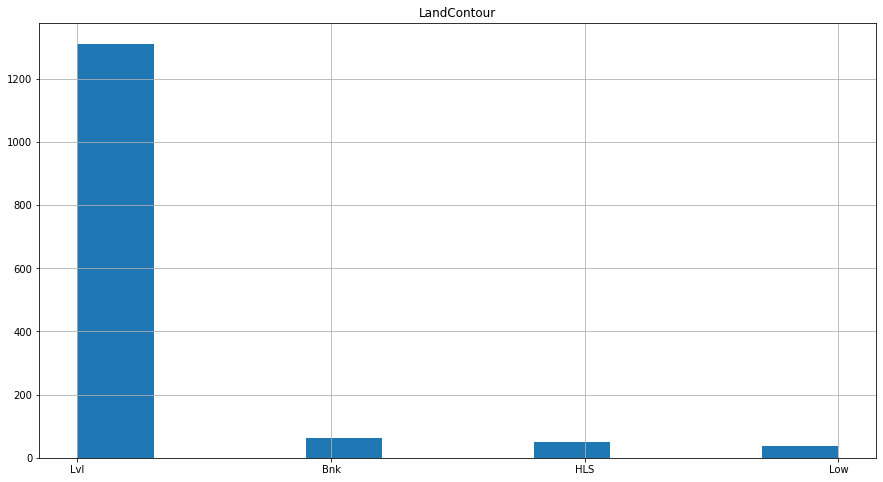

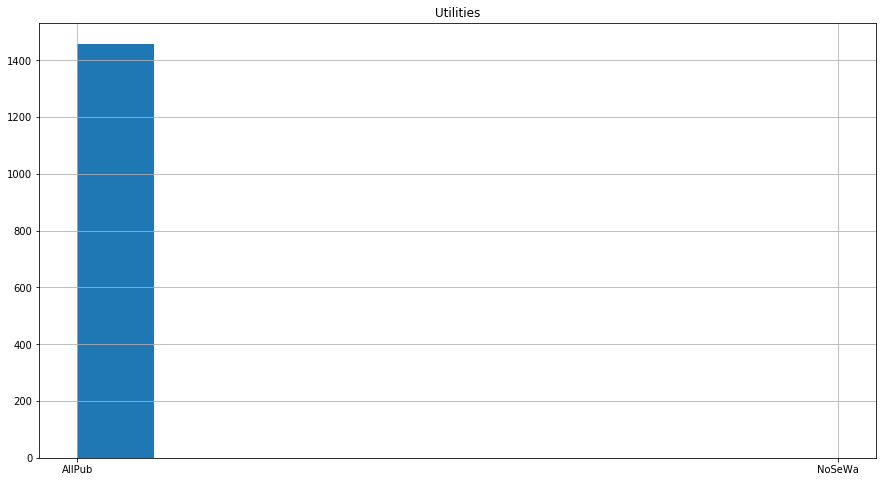

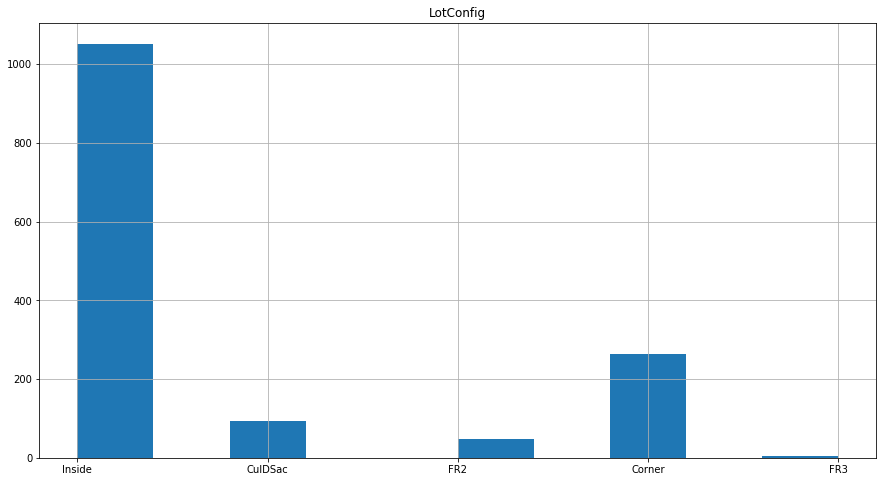

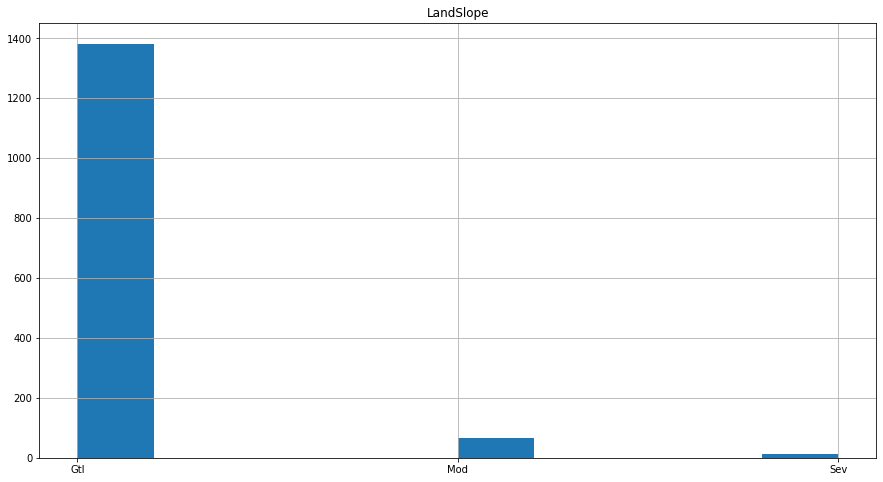

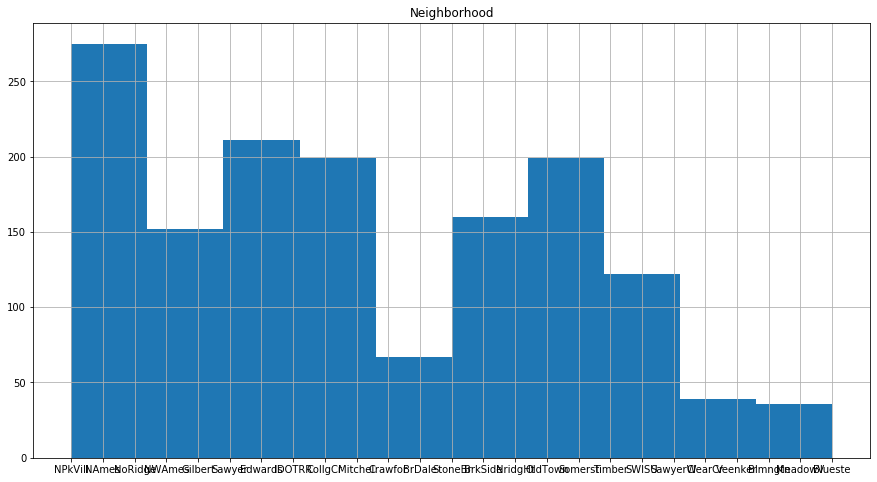

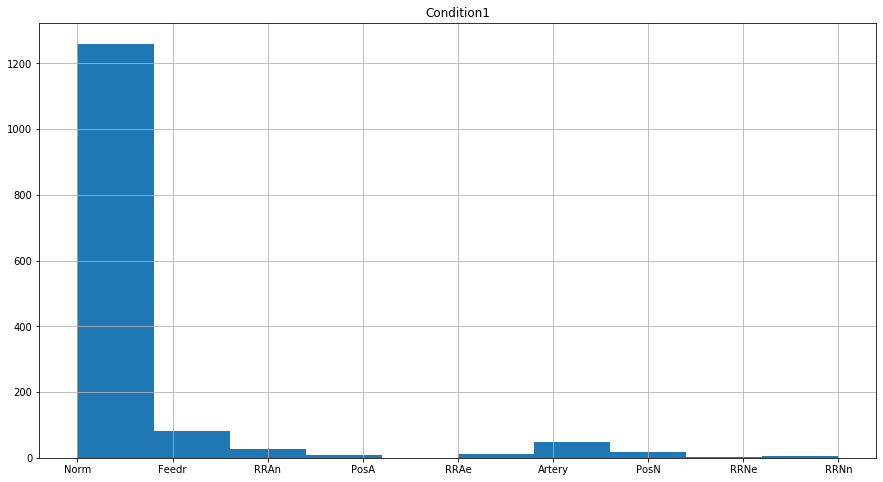

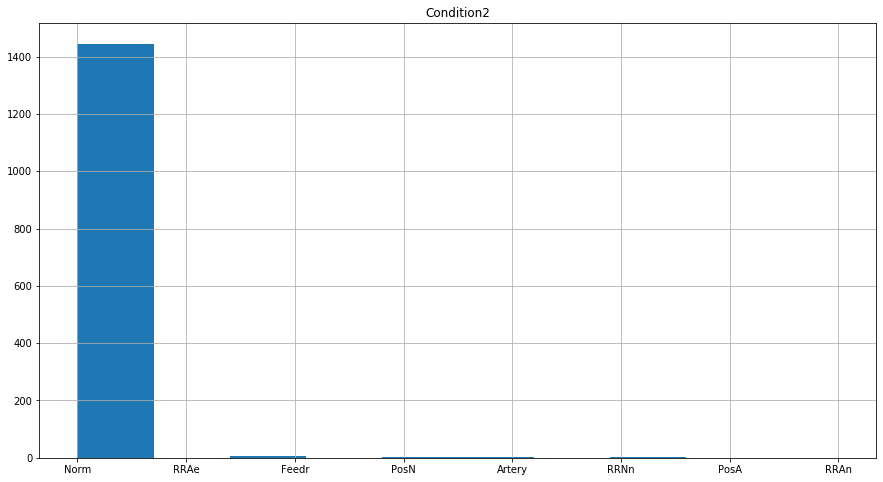

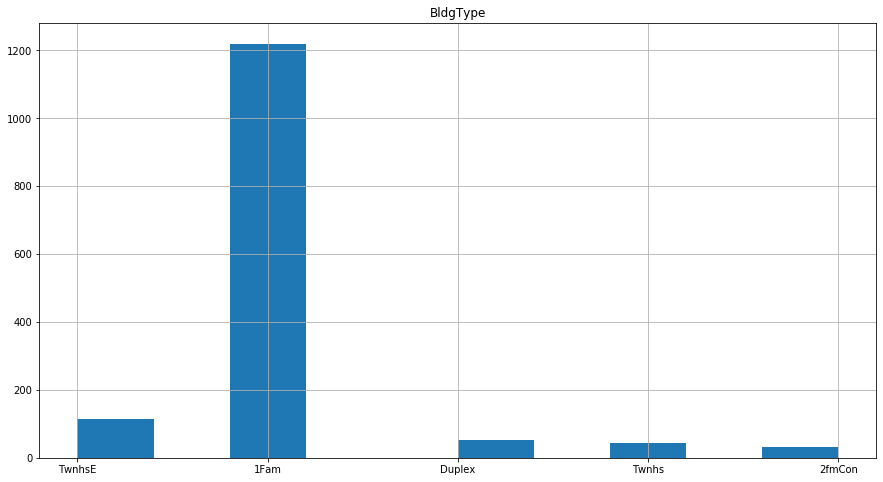

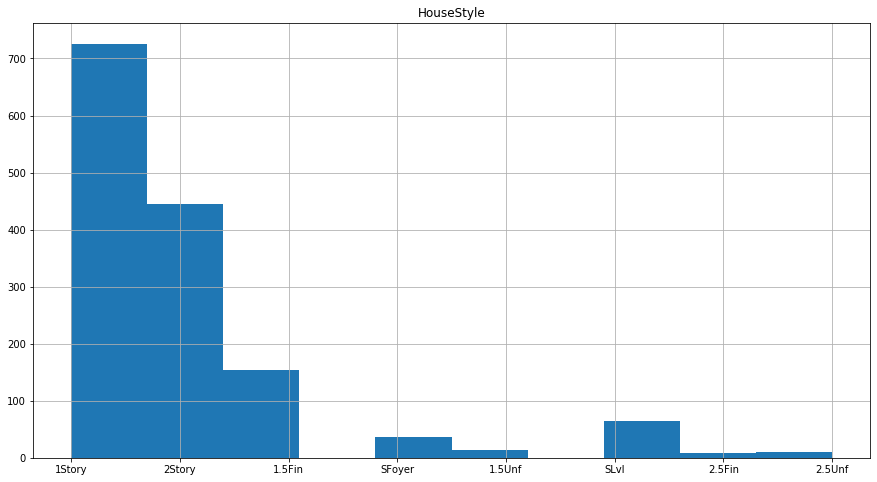

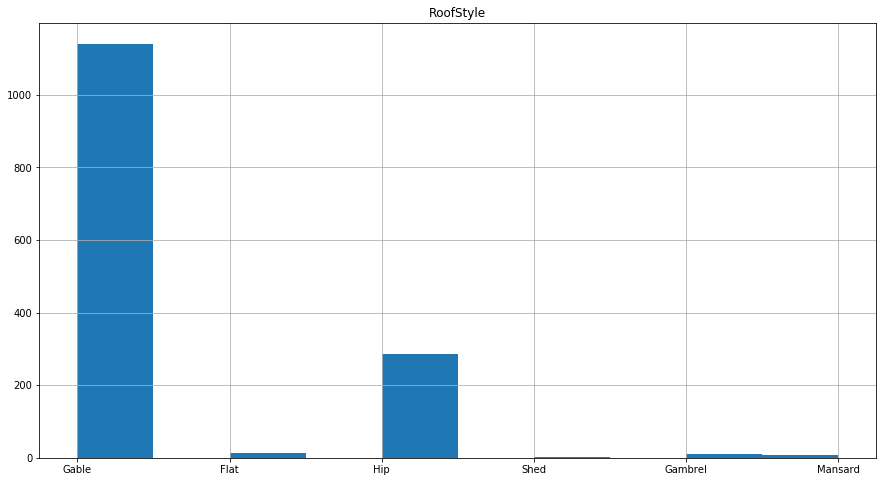

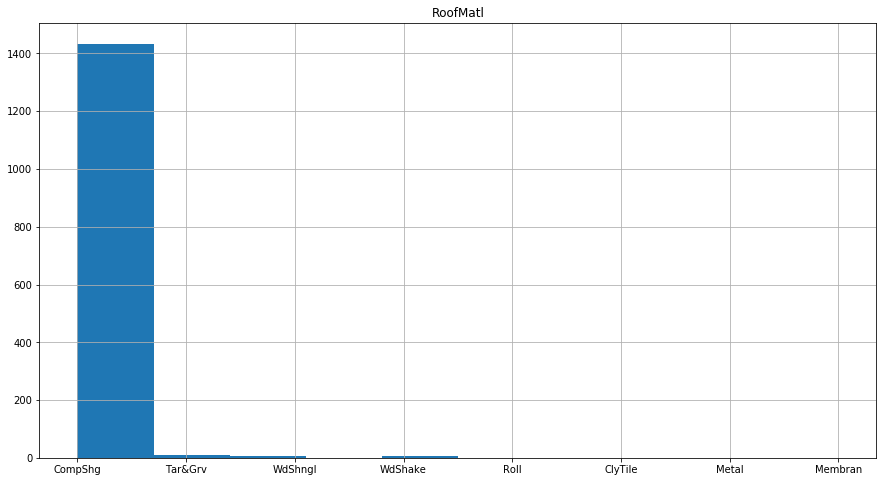

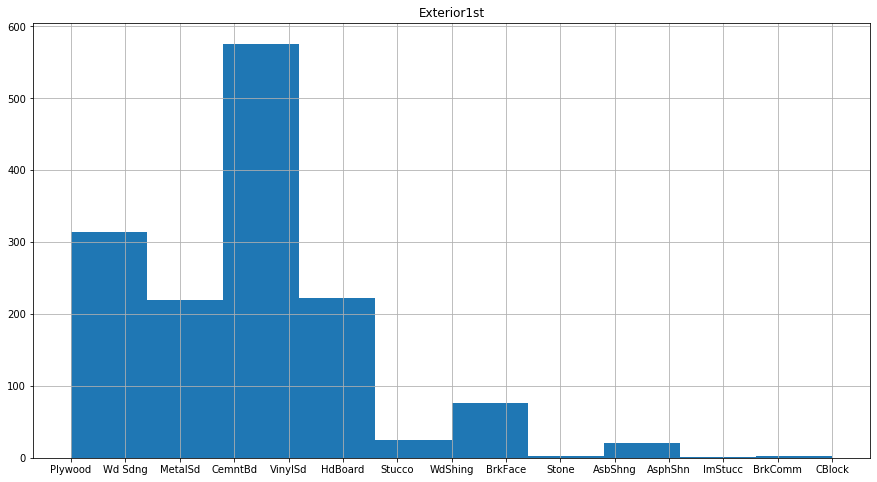

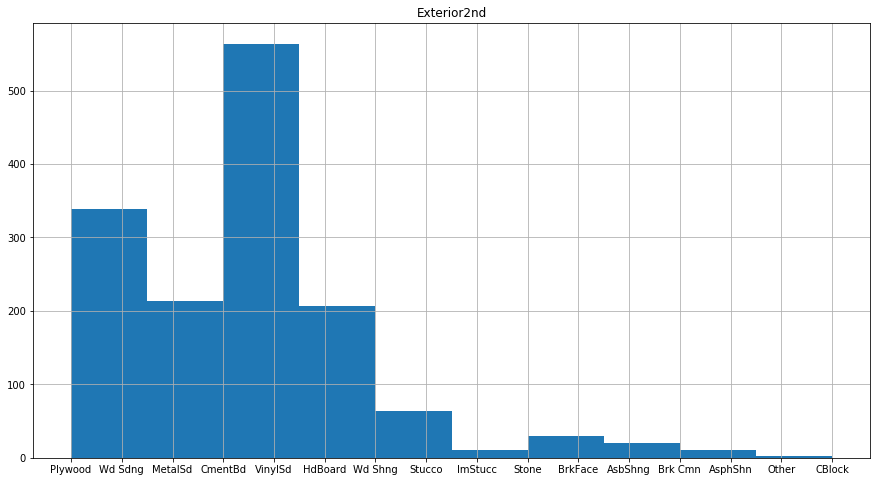

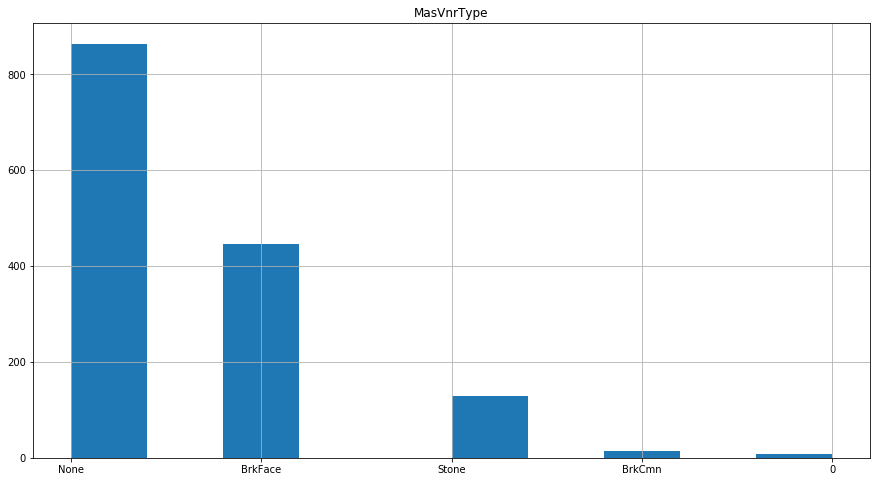

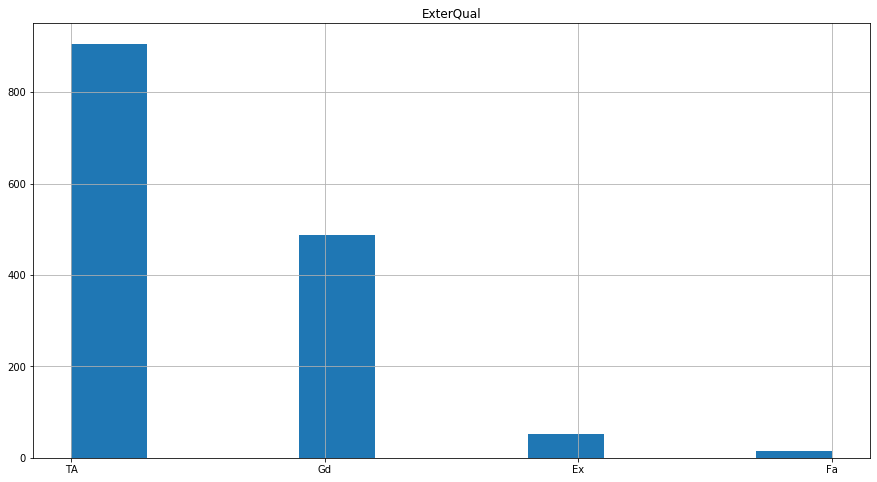

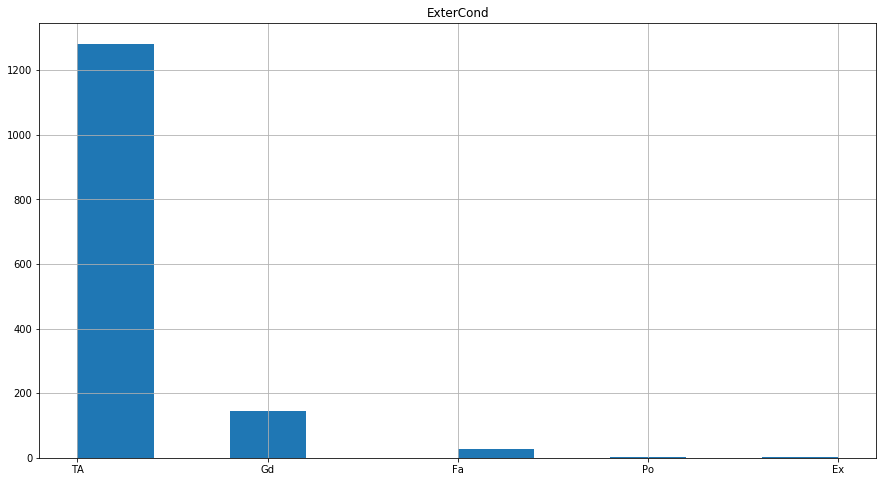

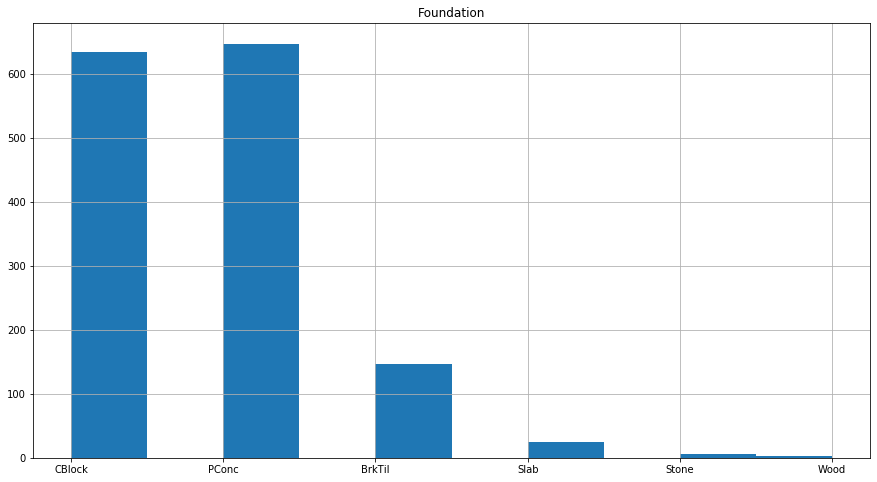

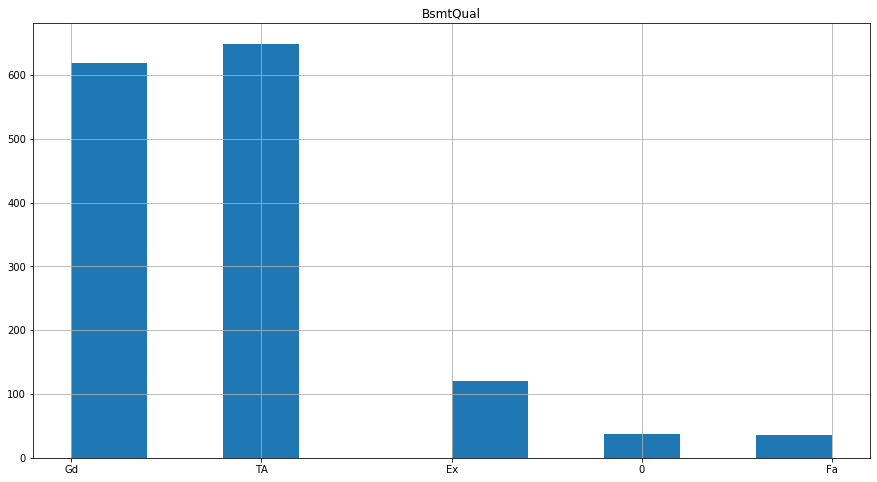

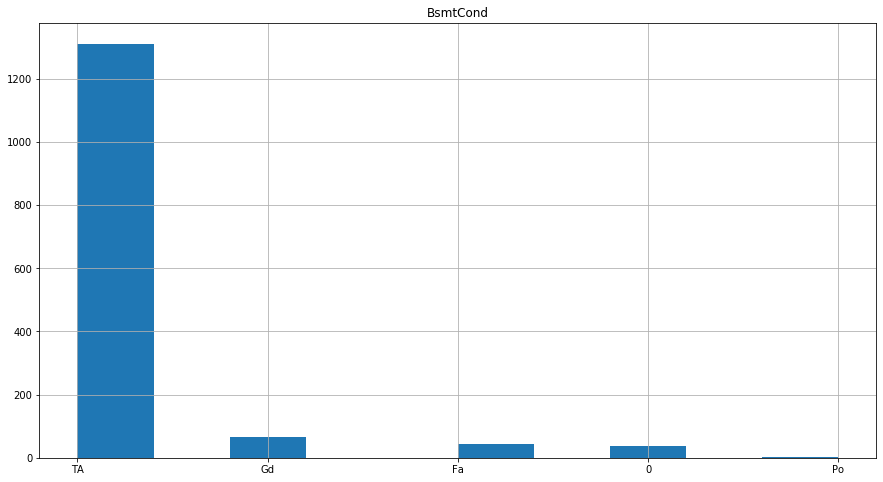

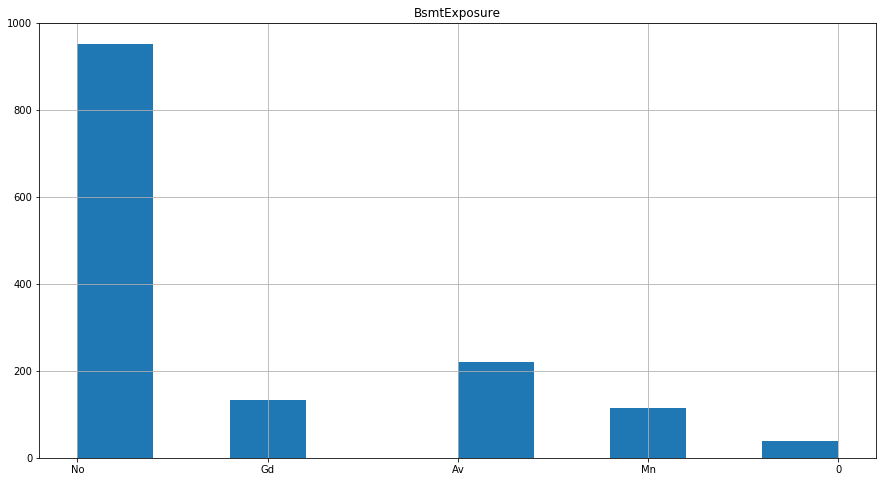

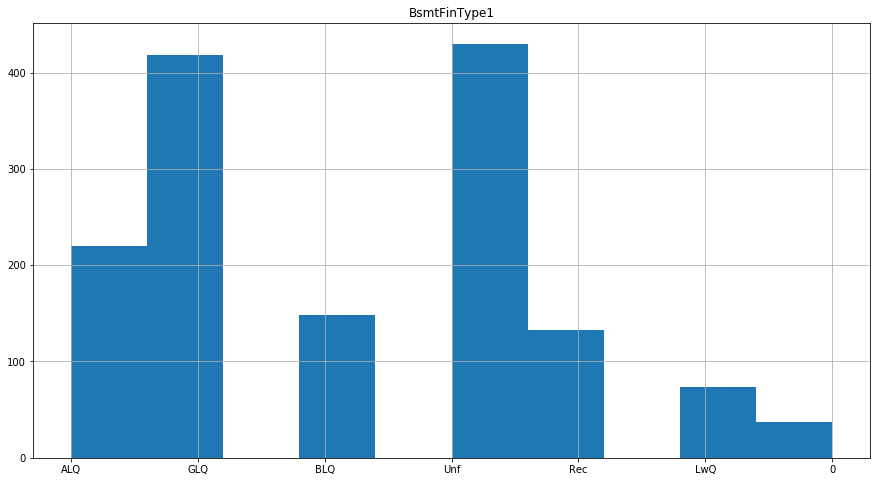

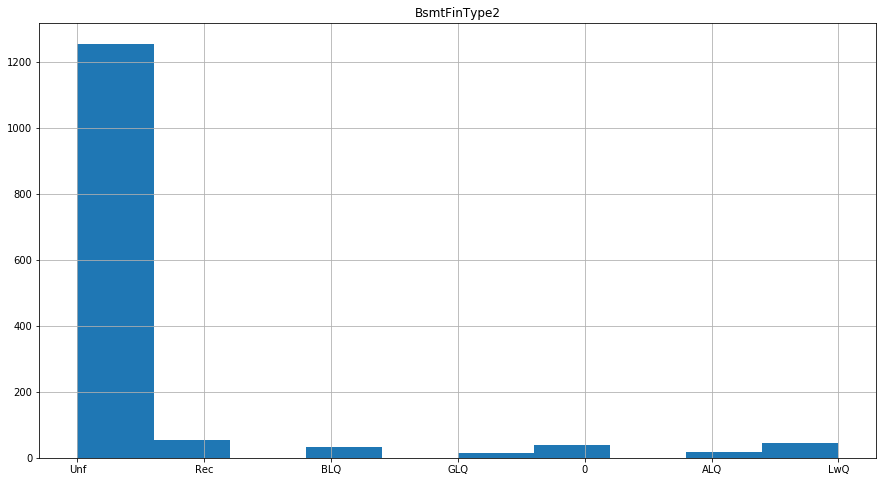

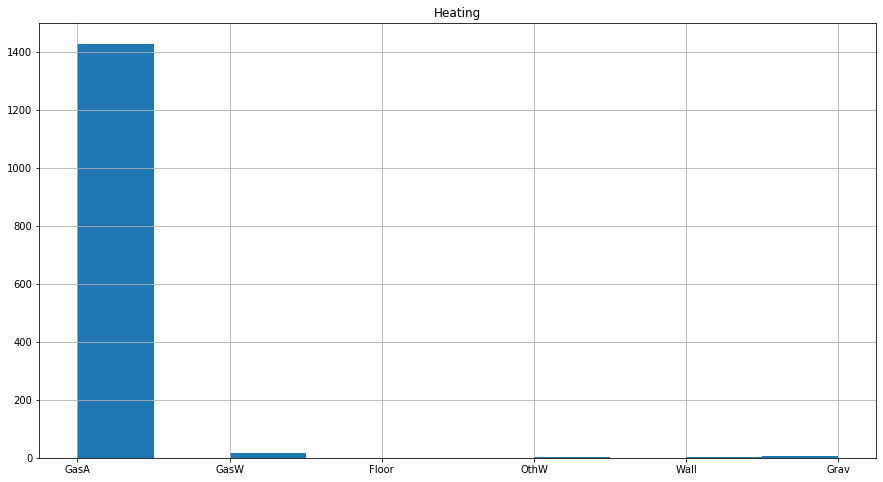

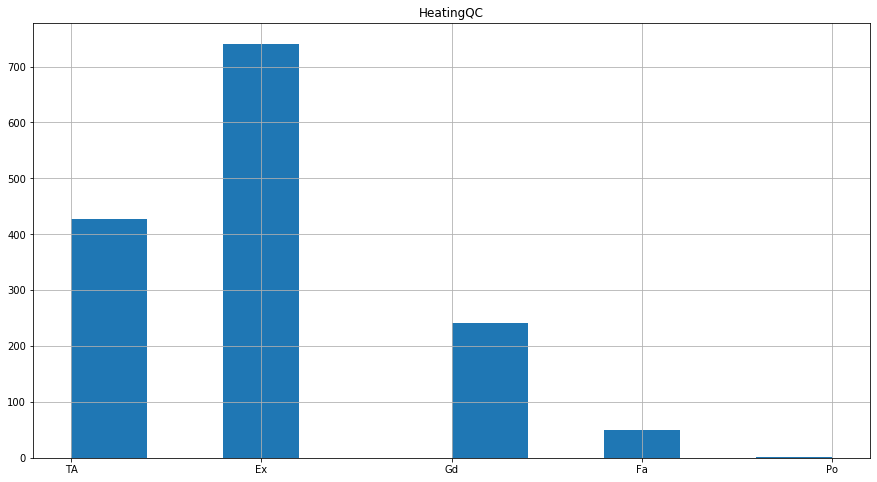

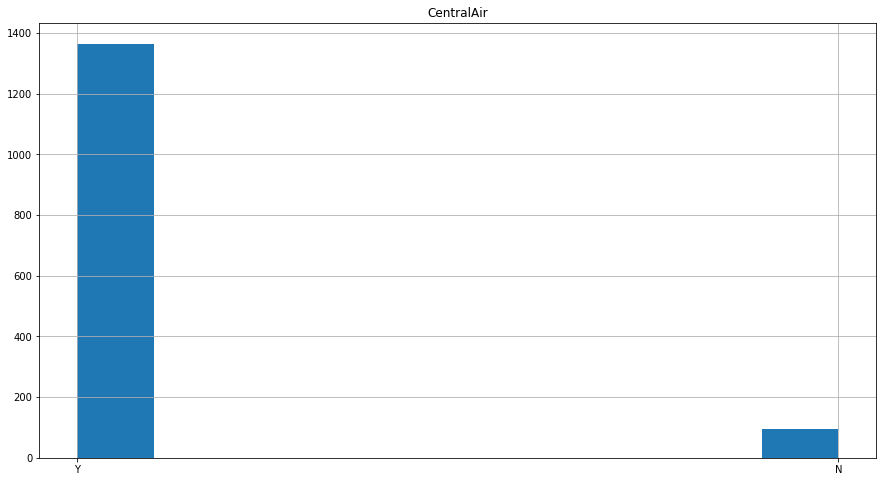

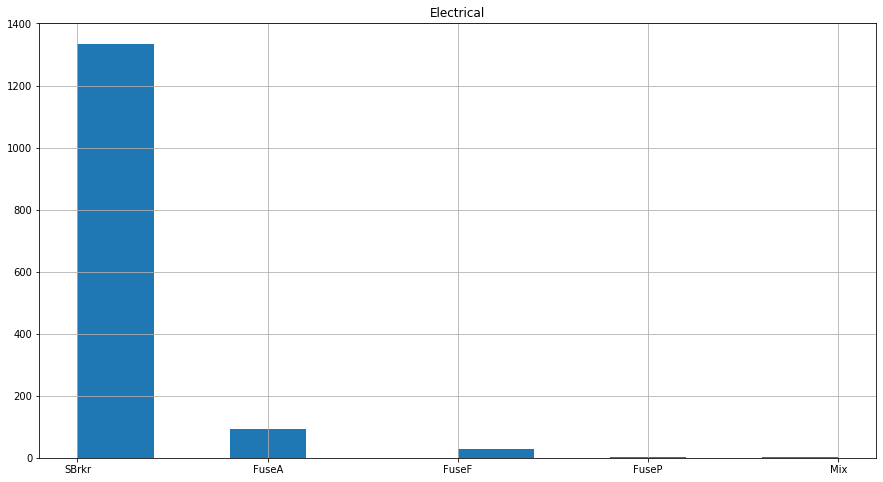

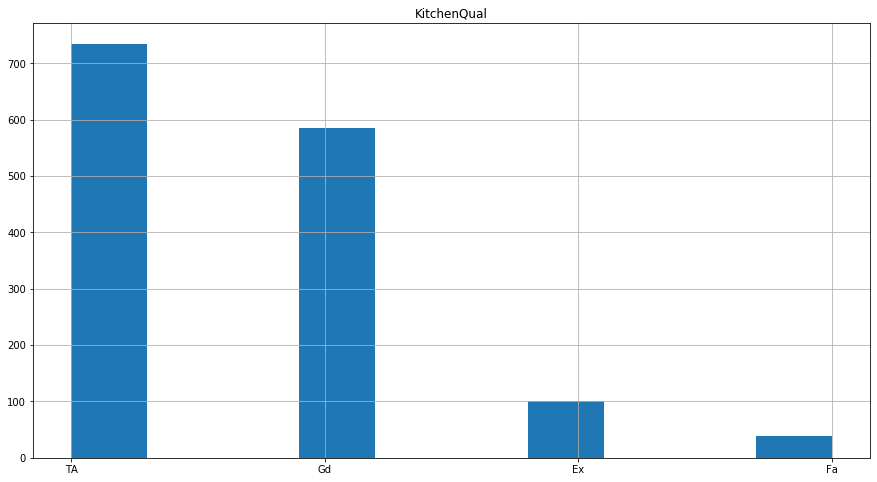

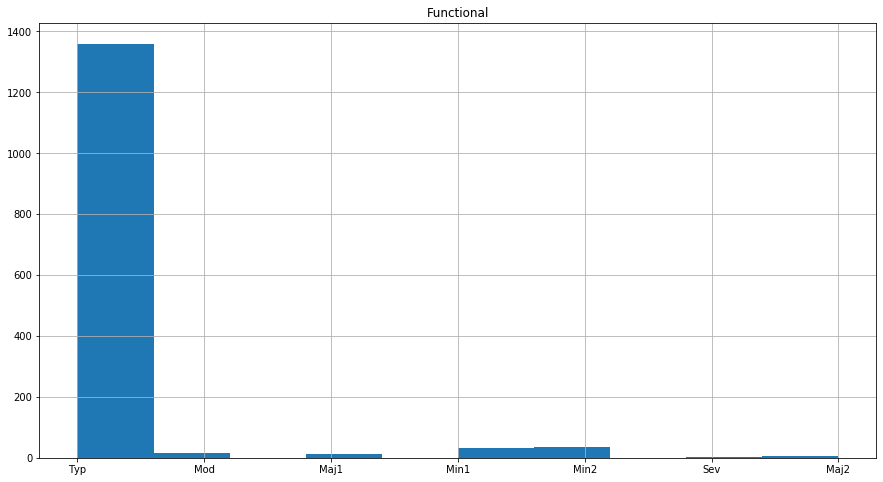

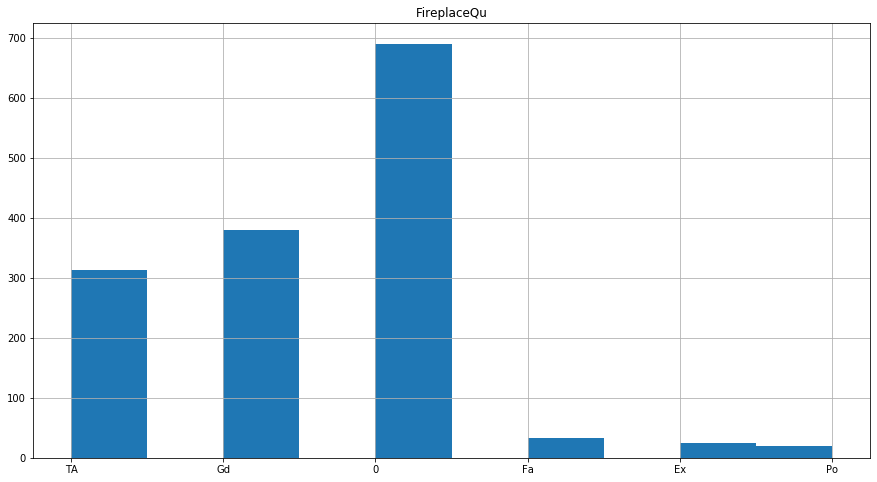

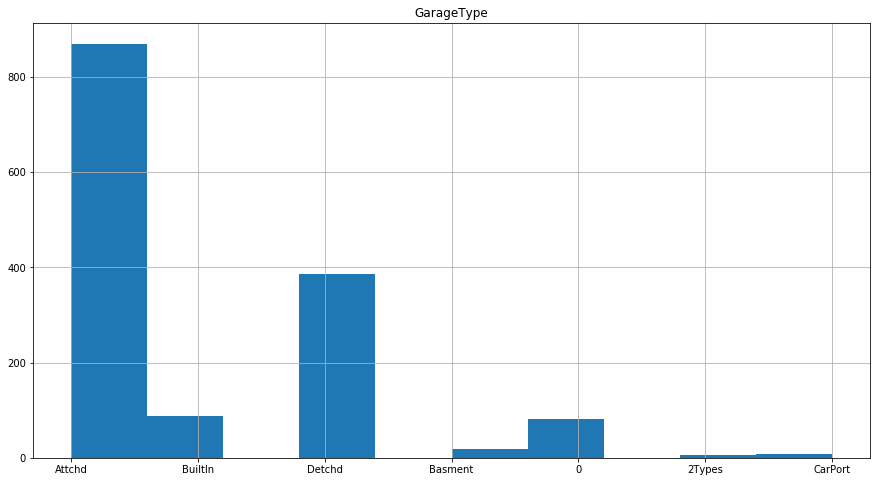

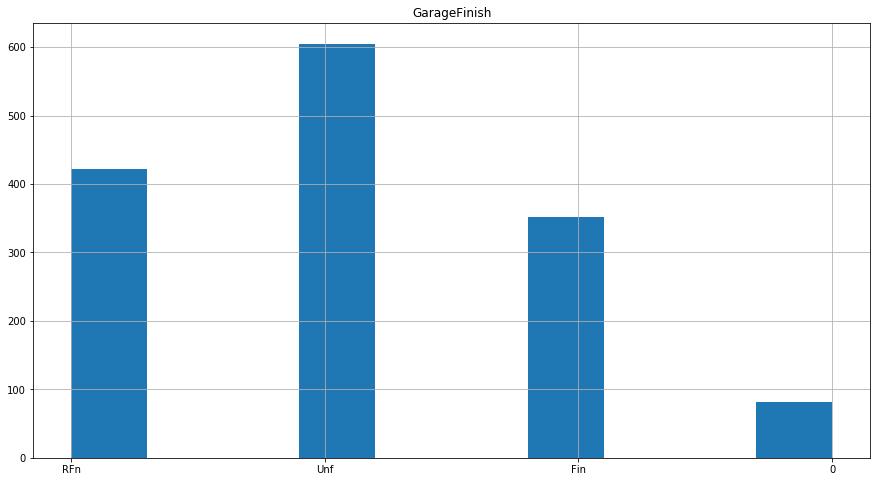

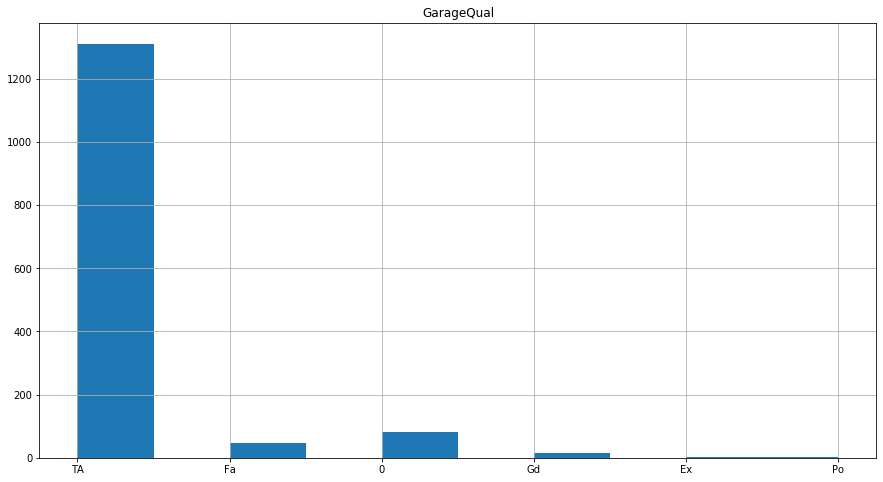

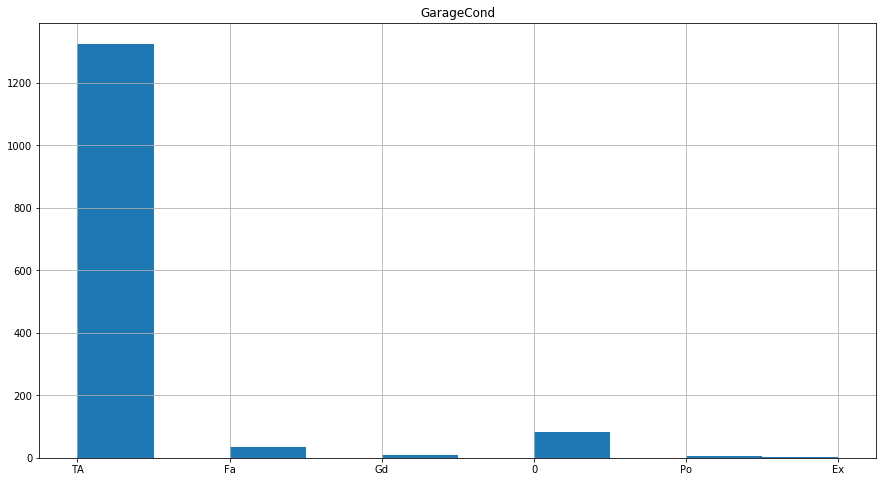

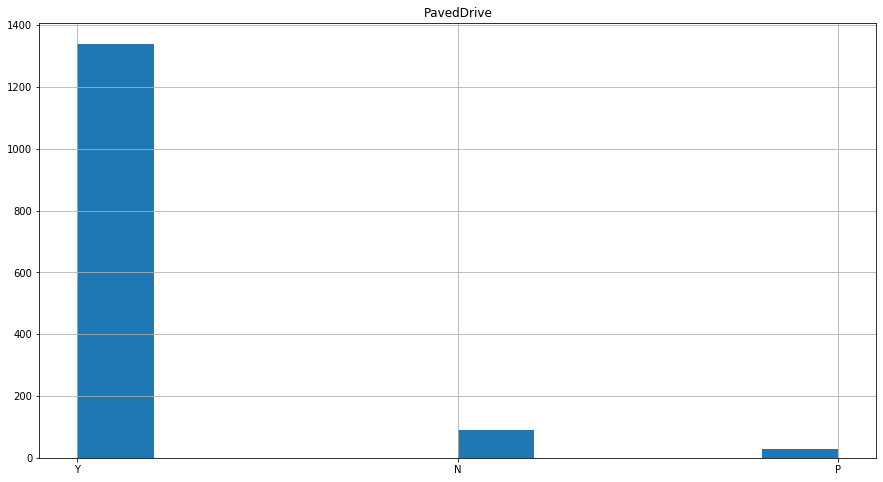

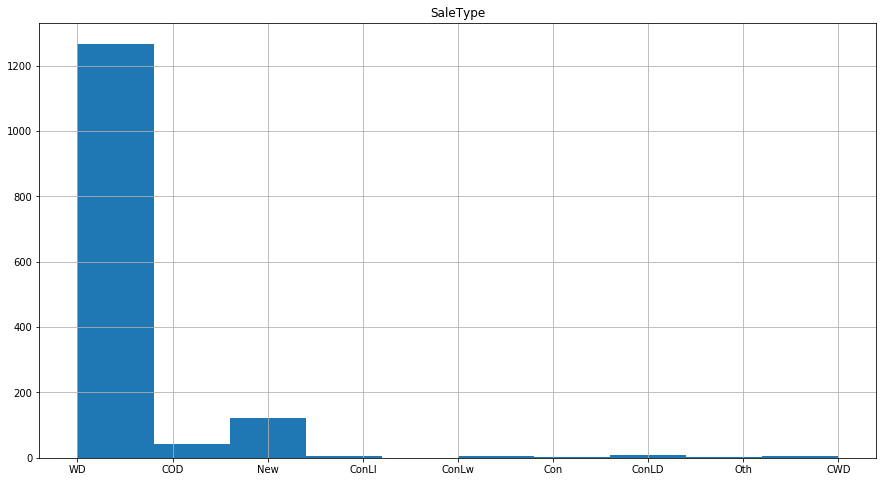

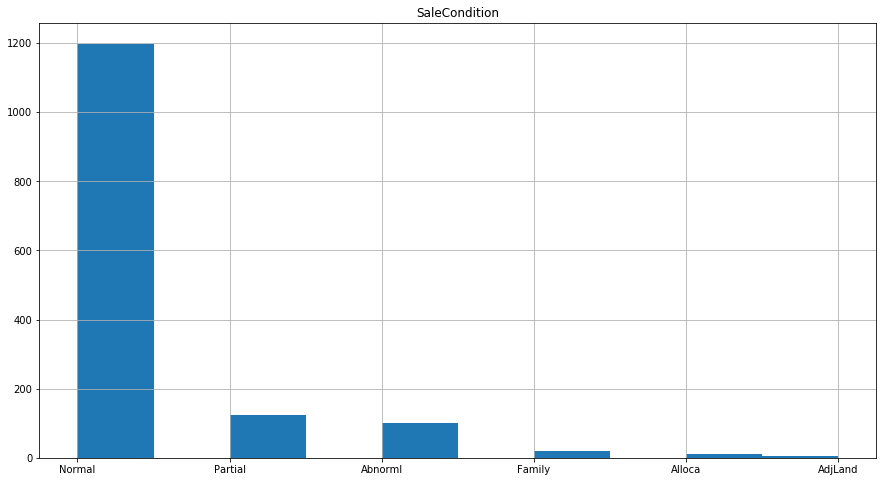

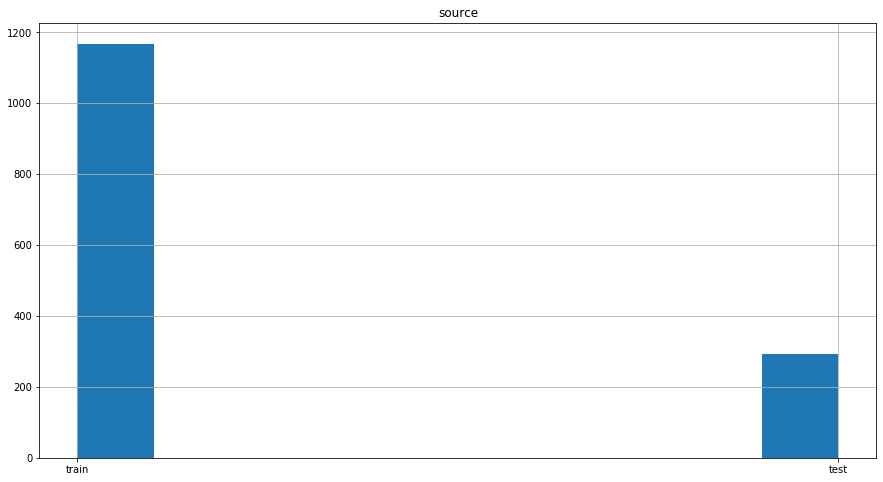

In [27]:
for i in object_cols:                                 #univariate analysis
    plt.figure(figsize = (15, 8))
    df[i].hist(grid = True)
    plt.title(i)
    plt.show()

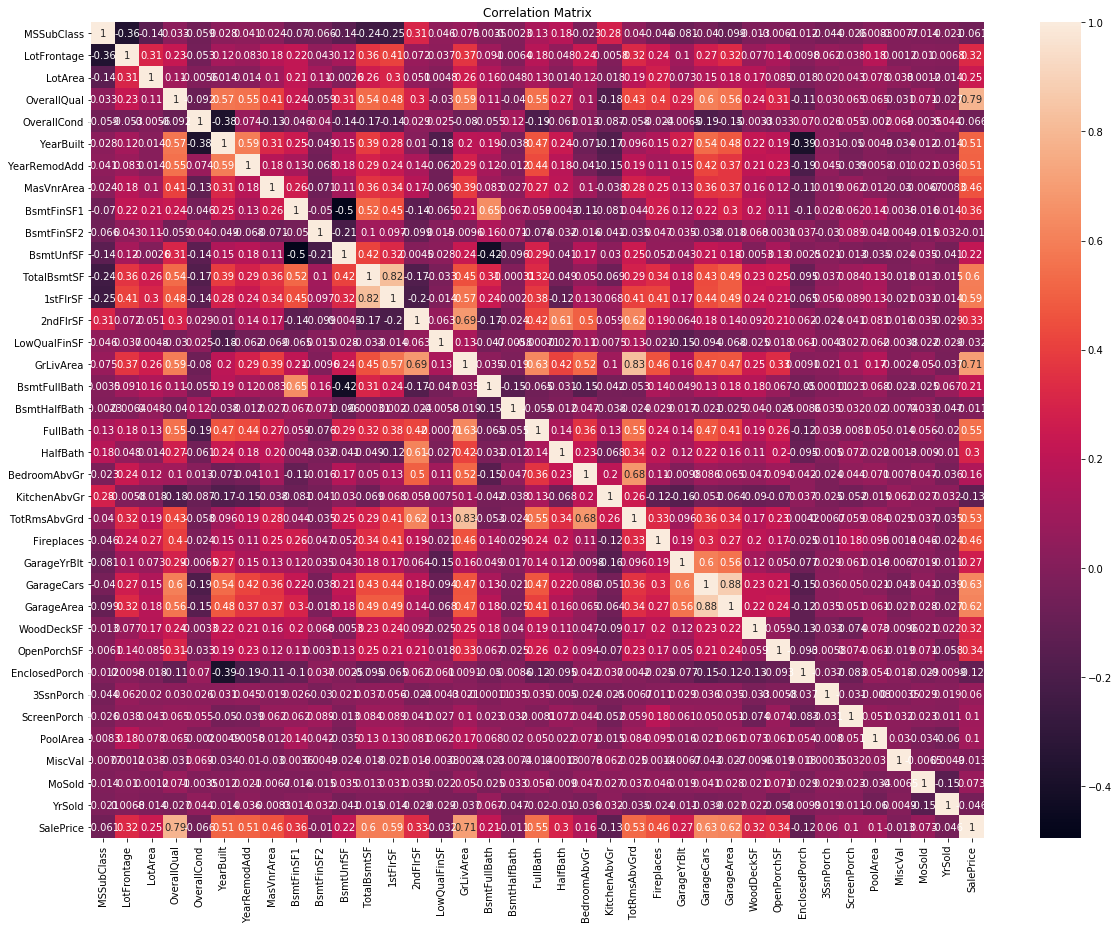

In [28]:
plt.figure(figsize = [20, 15])
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

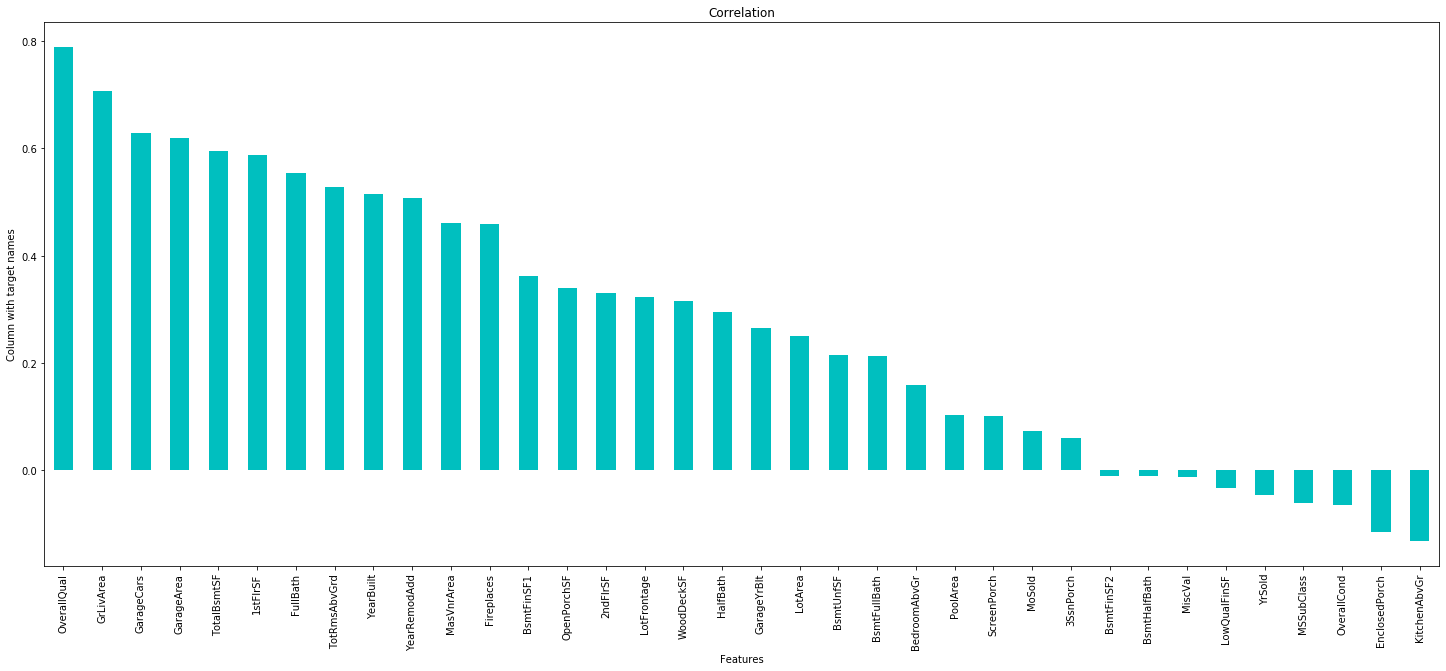

In [29]:
plt.figure(figsize = (25, 10))
df.corr()['SalePrice'].sort_values(ascending = False).drop(['SalePrice']).plot(kind = 'bar', color = 'c')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

In [30]:
df.drop(['BedroomAbvGr', 'PoolArea', 'ScreenPorch', 'MoSold', '3SsnPorch', 'BsmtHalfBath', 'MiscVal', 
         'LowQualFinSF', 'YrSold', 'MSSubClass', 'OverallCond', 'EnclosedPorch', 'KitchenAbvGr'], axis = 1, inplace = True)

This columns correlation with target variable is less than 0.2

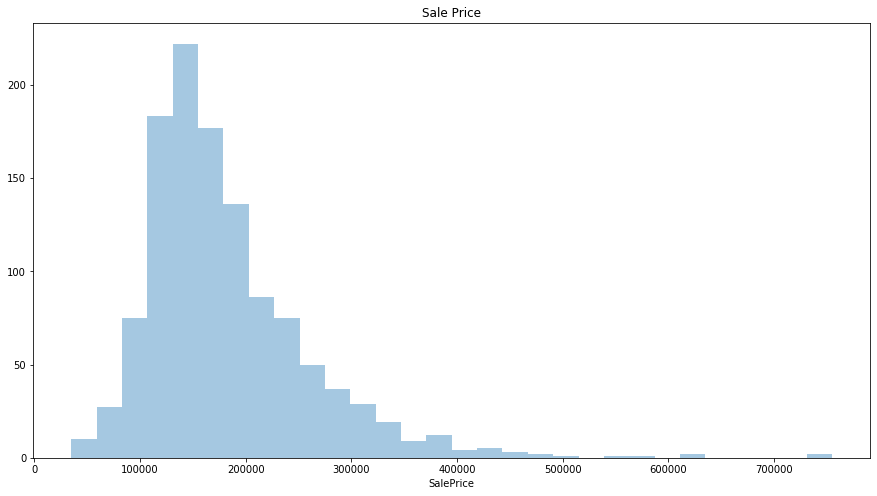

In [31]:
plt.figure(figsize = (15, 8))
sns.distplot(df['SalePrice'], bins = 30, kde = False)
plt.title('Sale Price')
plt.show()

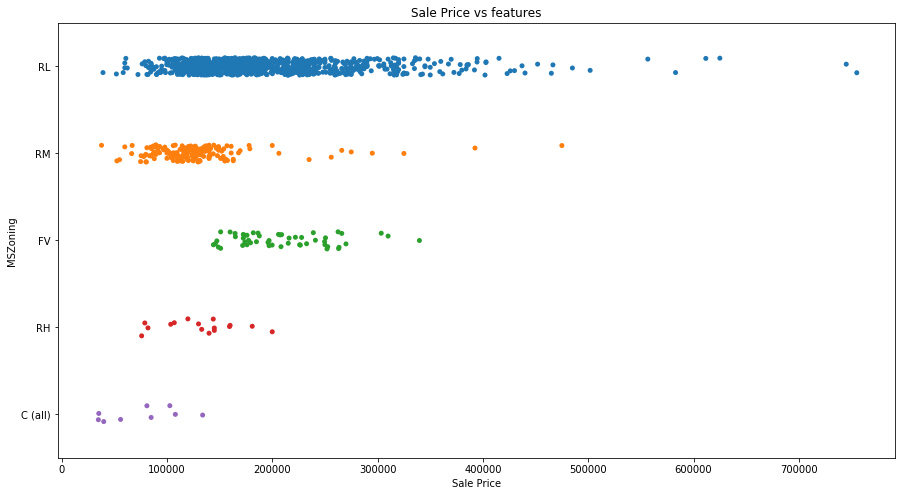

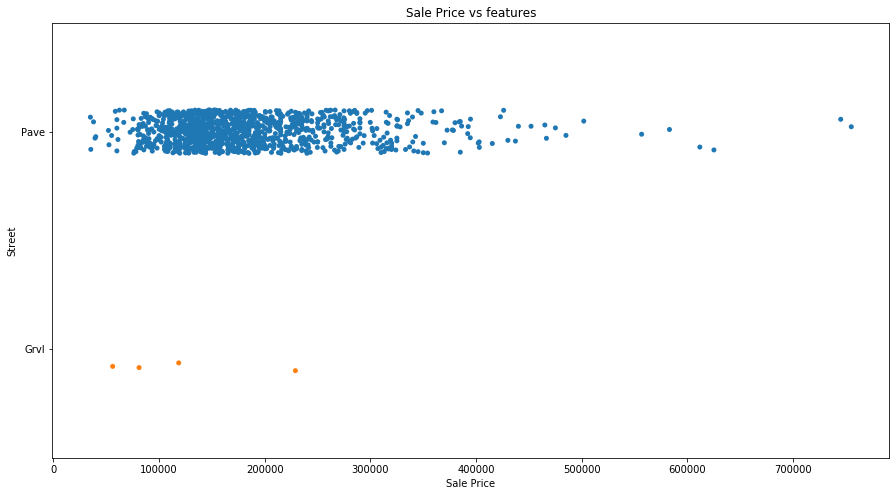

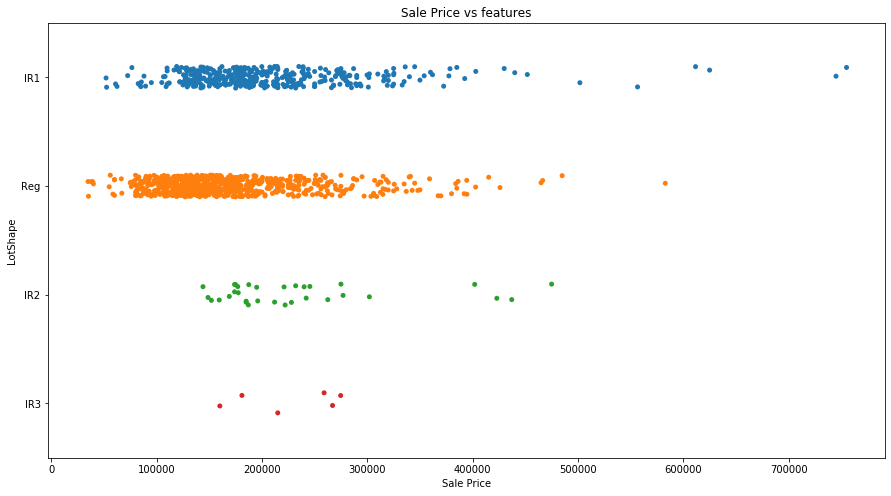

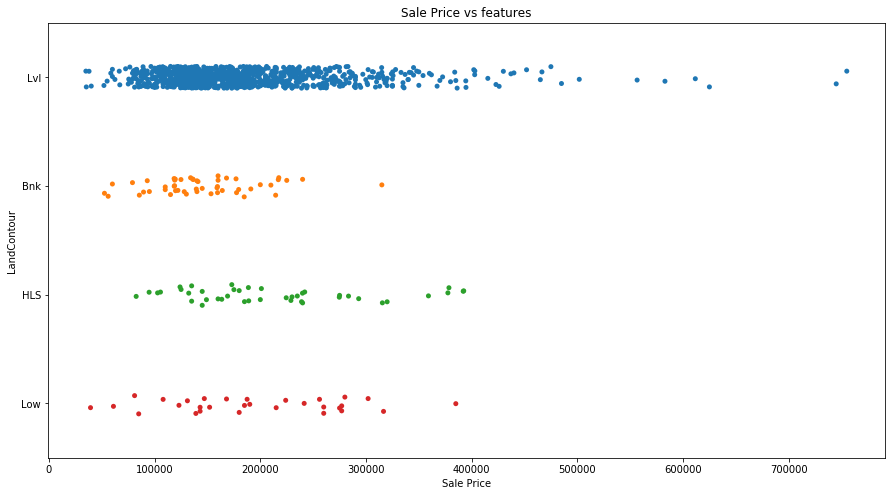

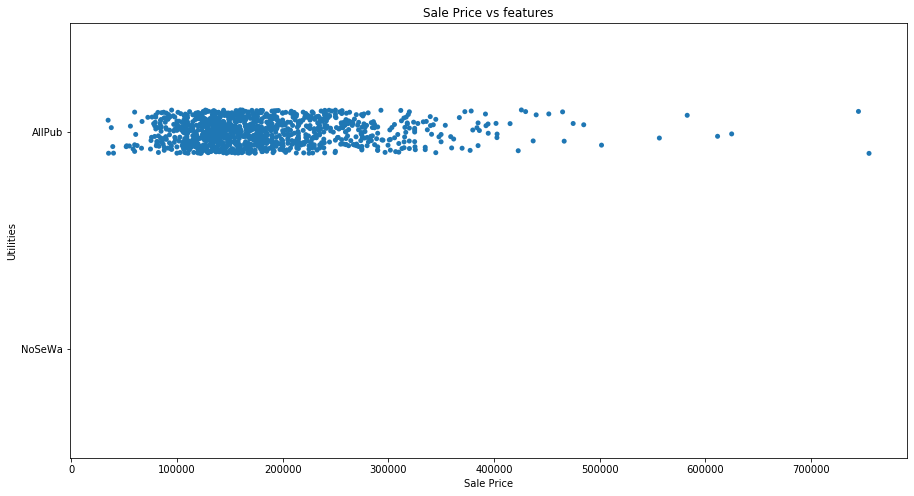

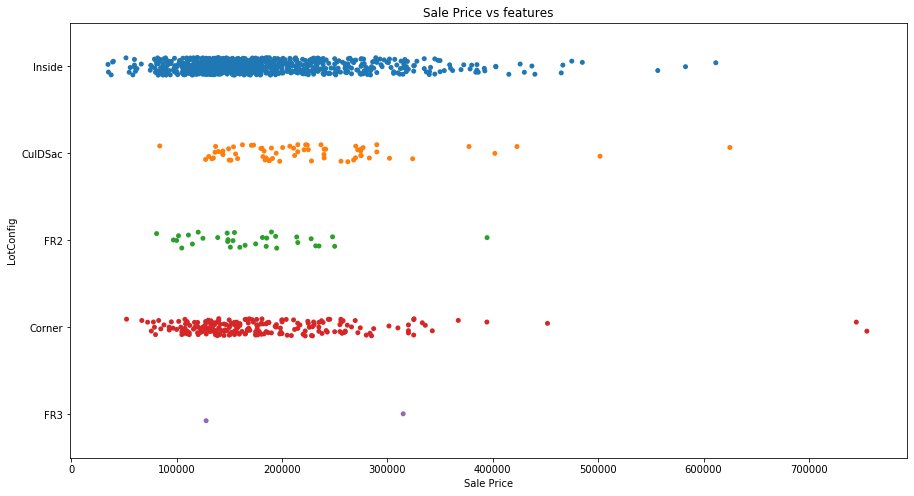

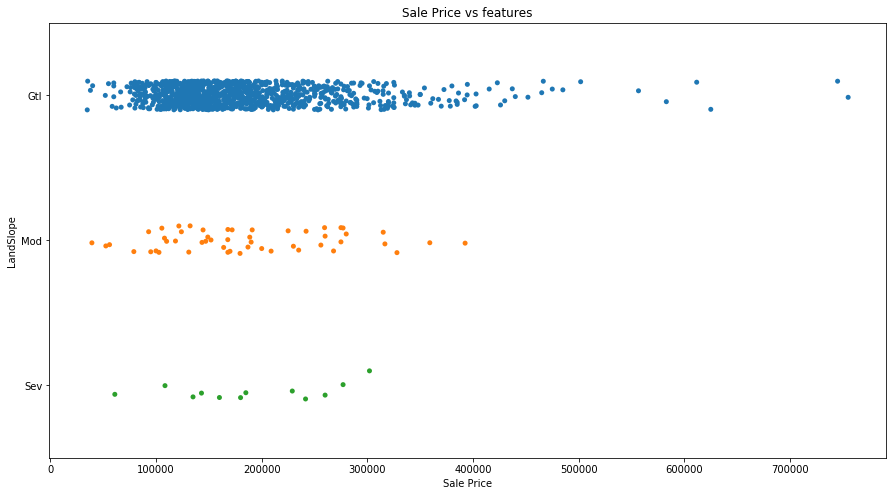

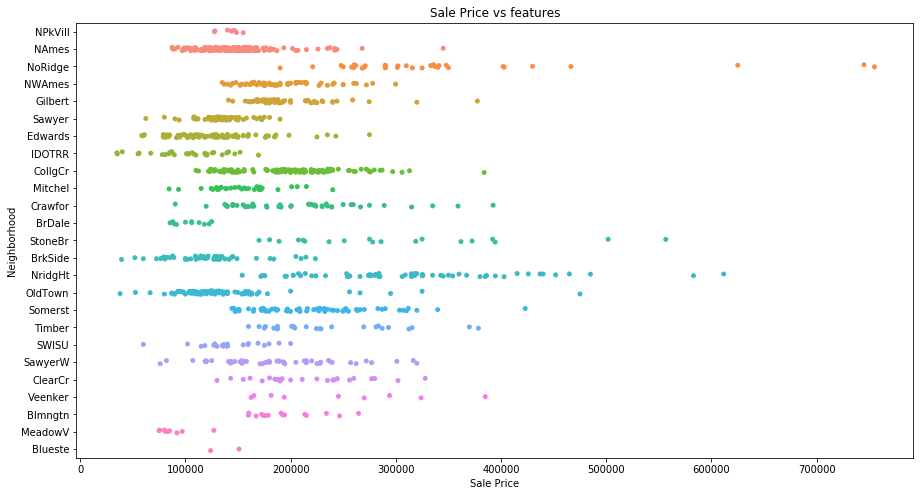

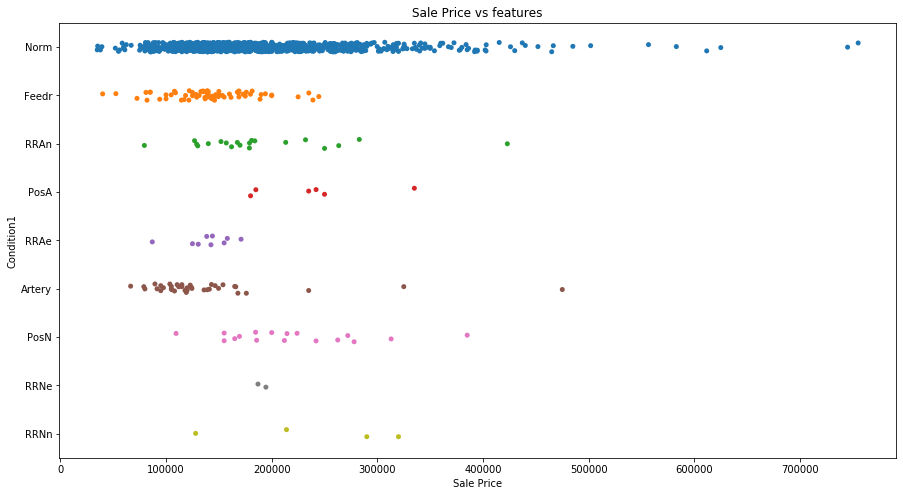

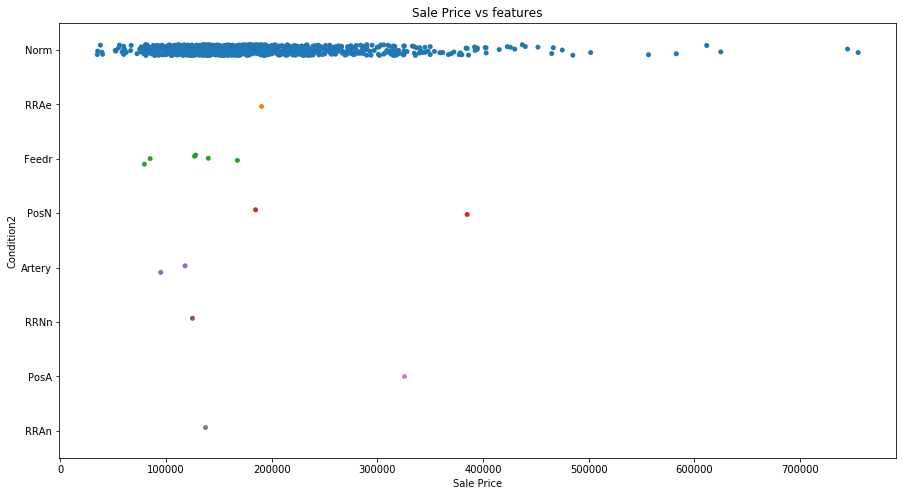

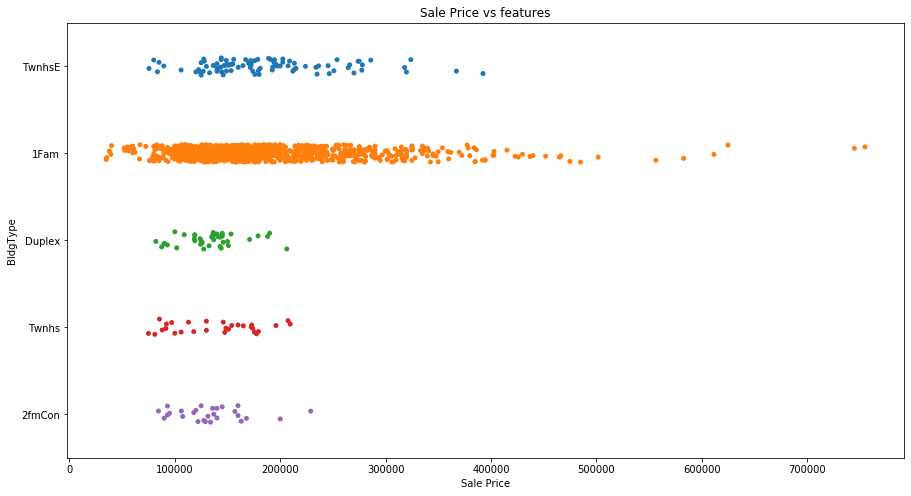

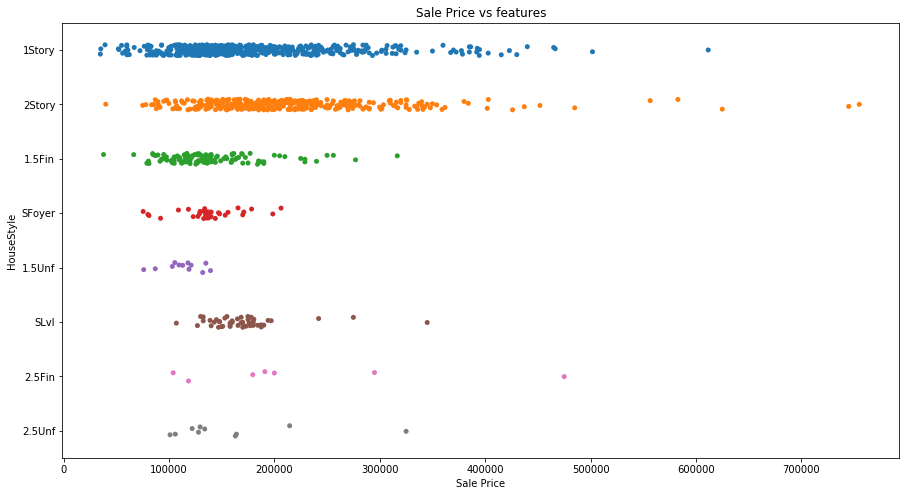

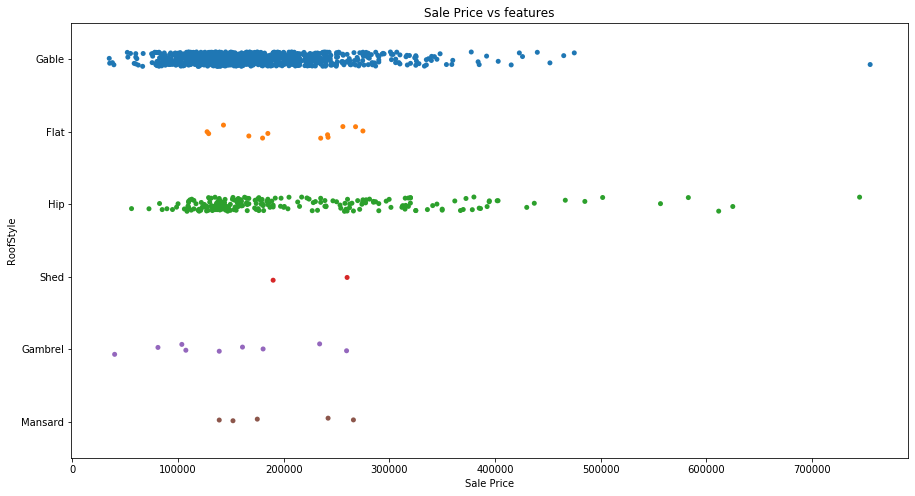

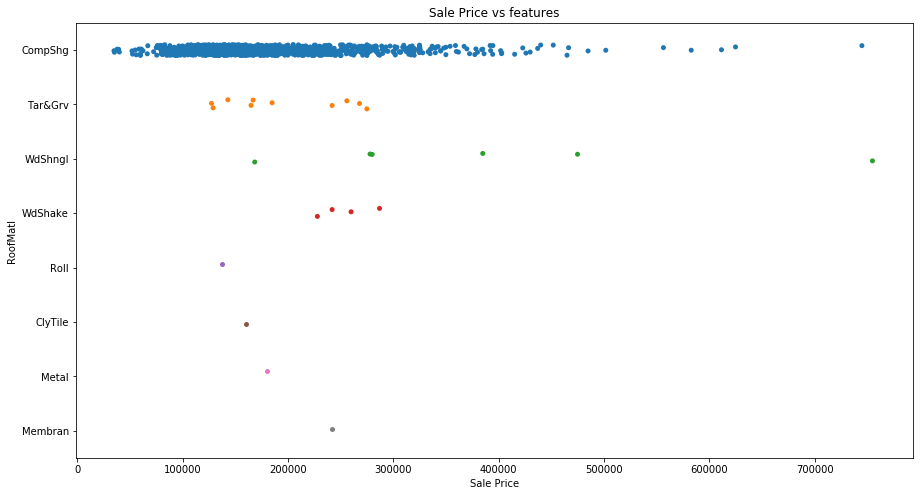

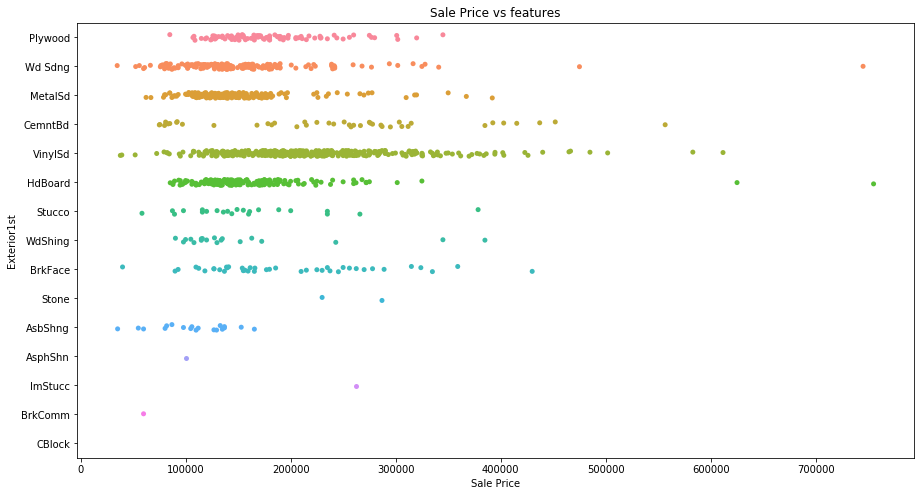

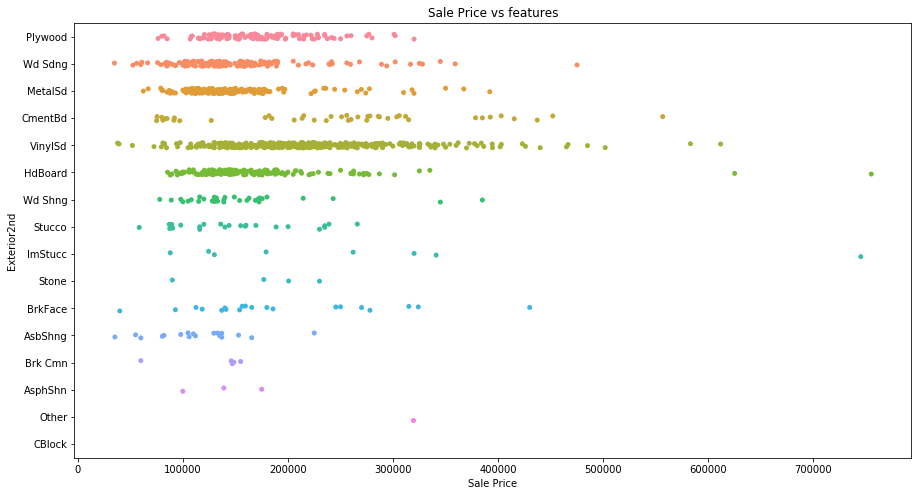

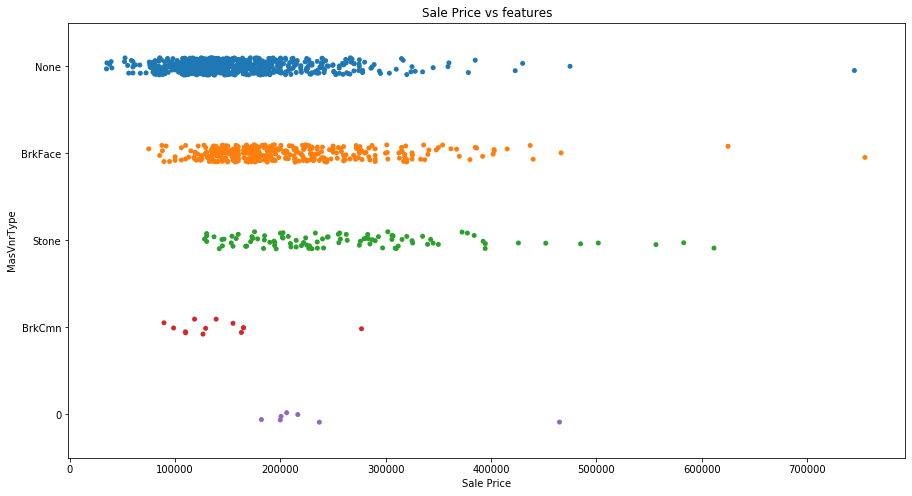

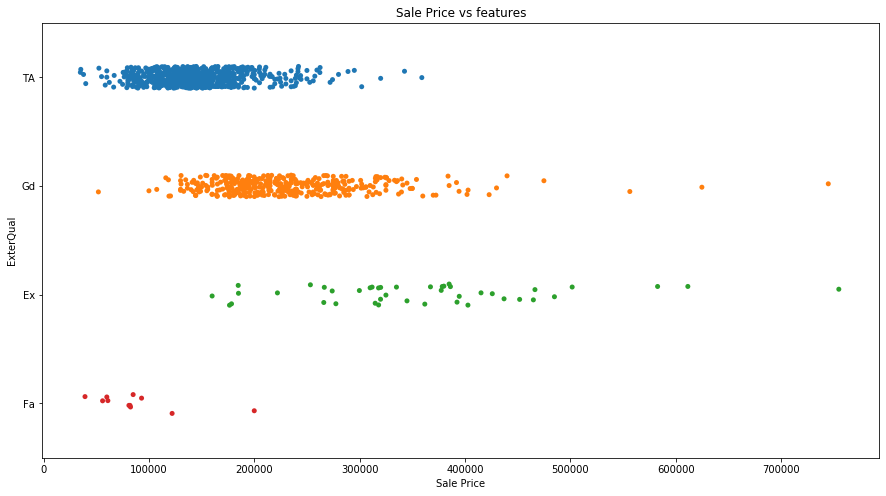

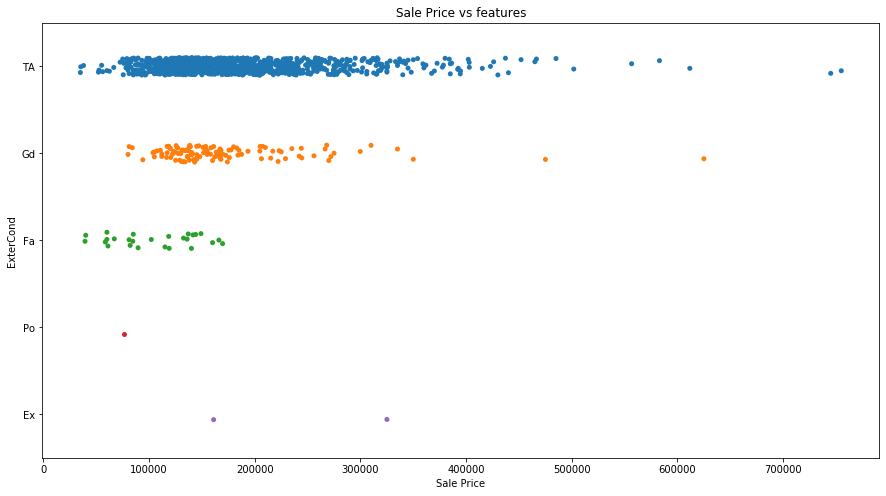

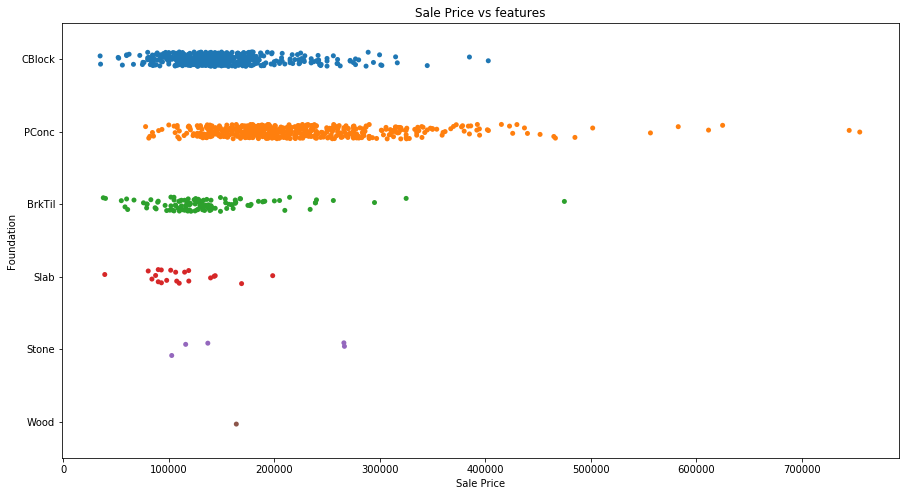

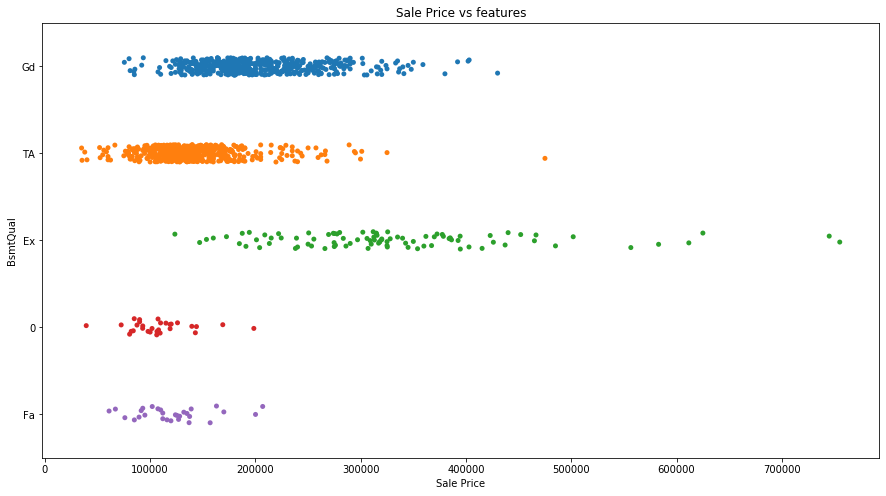

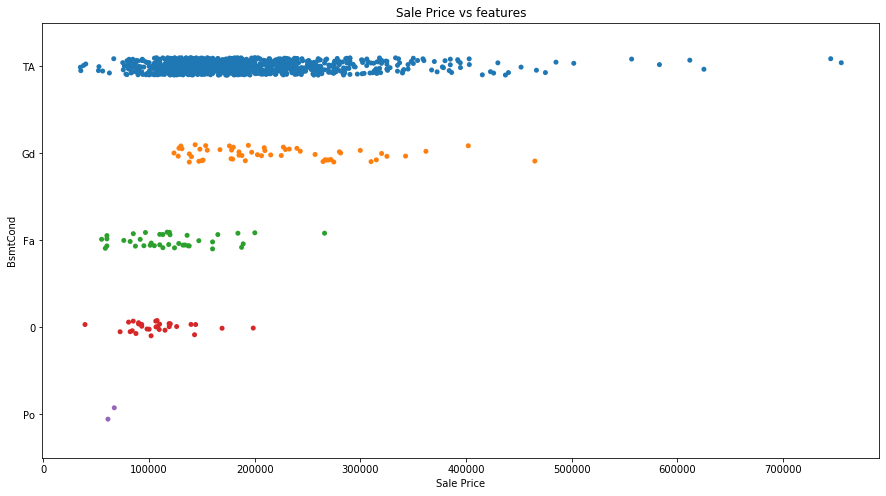

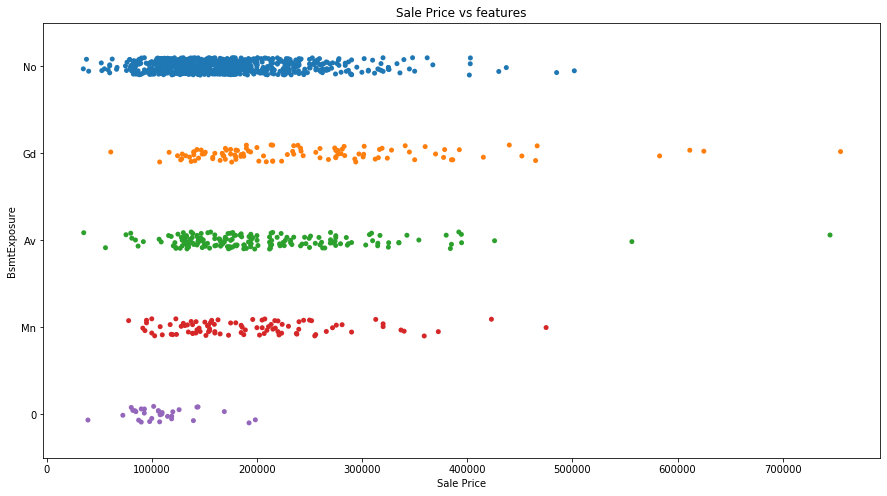

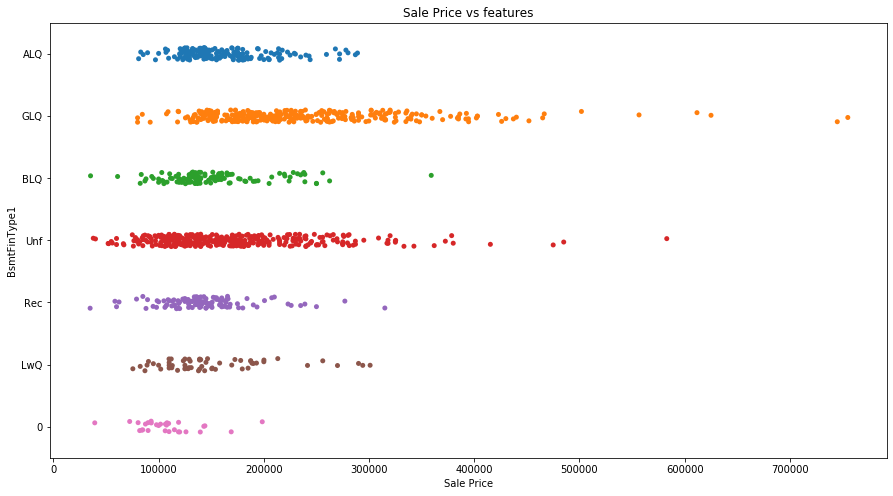

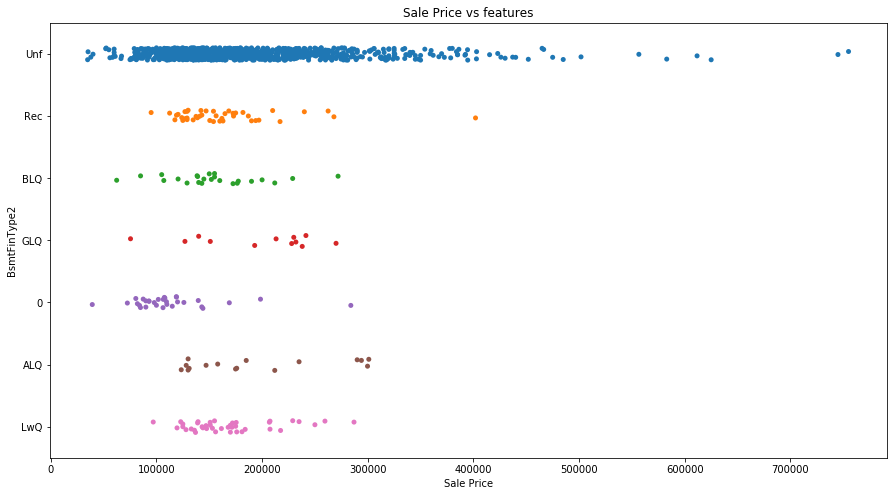

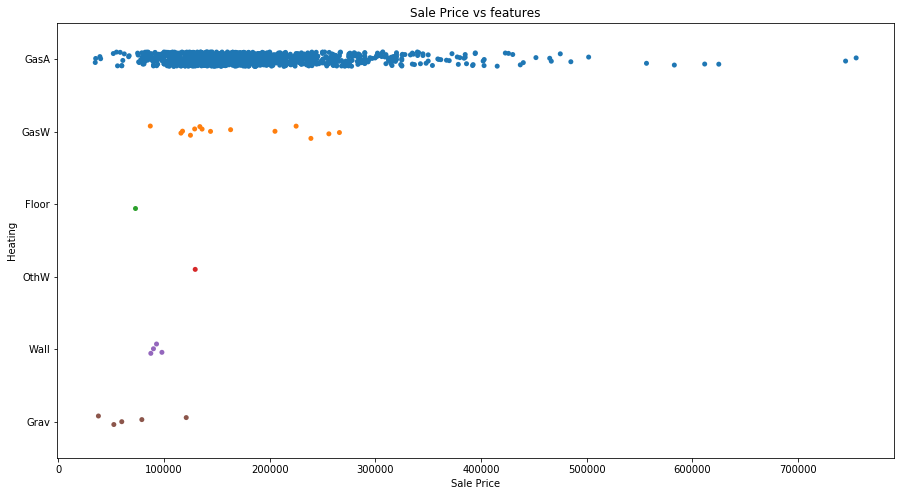

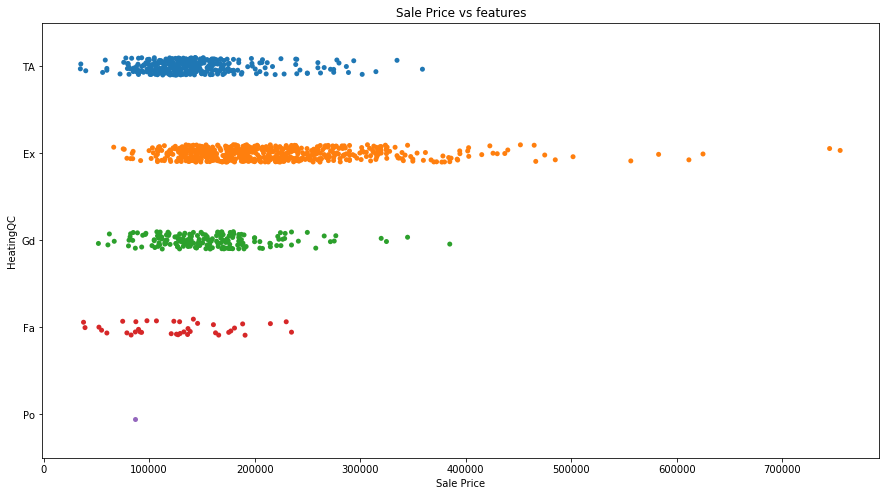

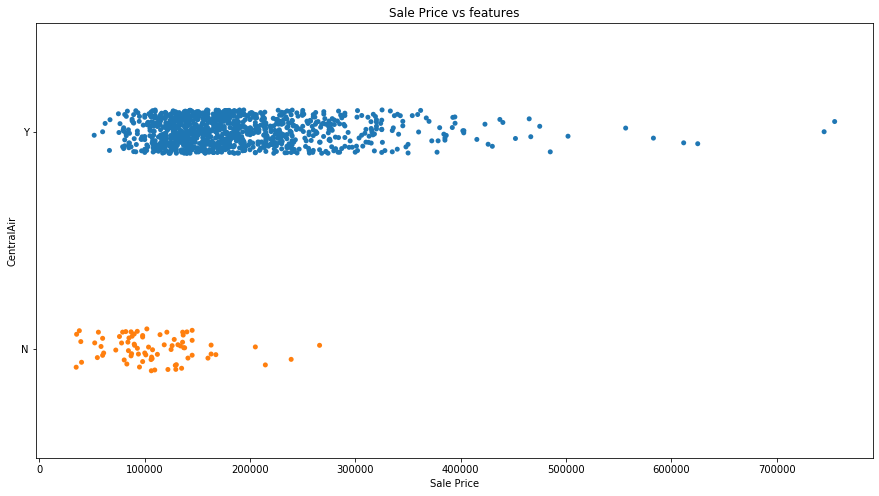

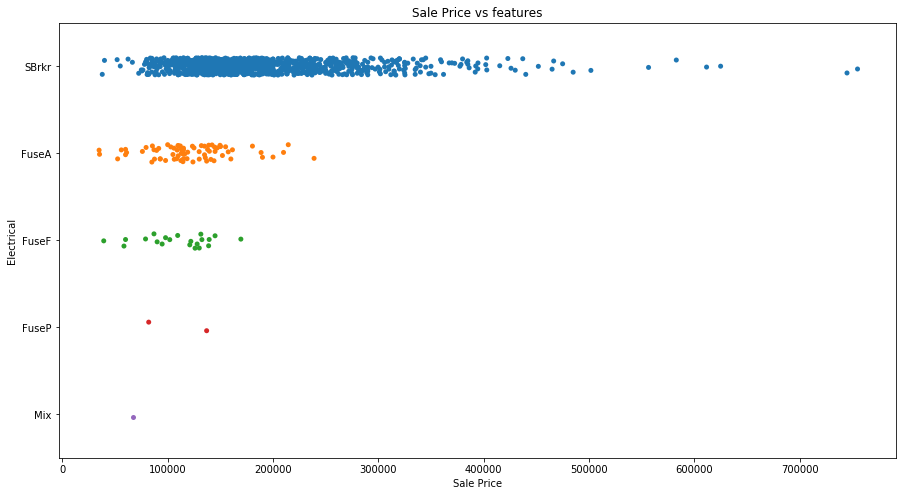

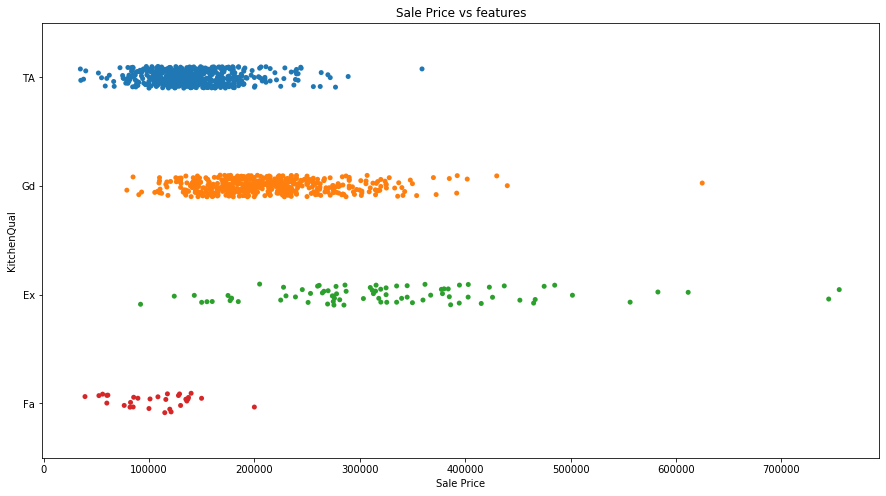

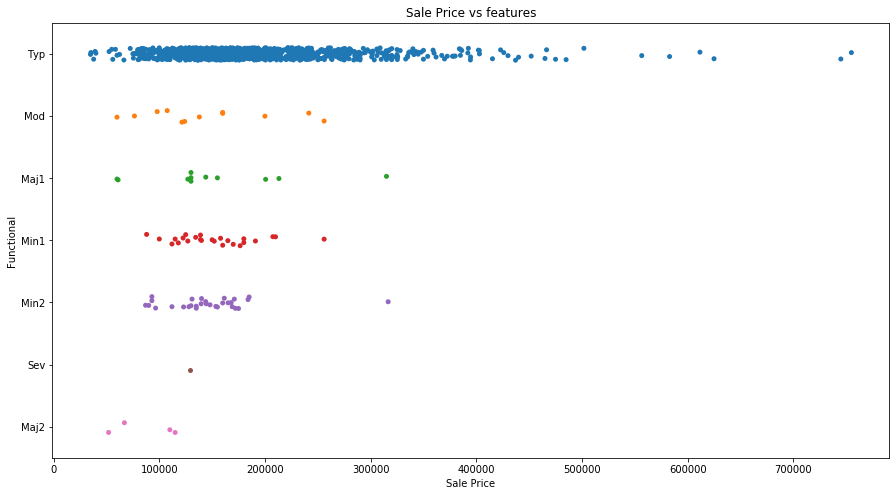

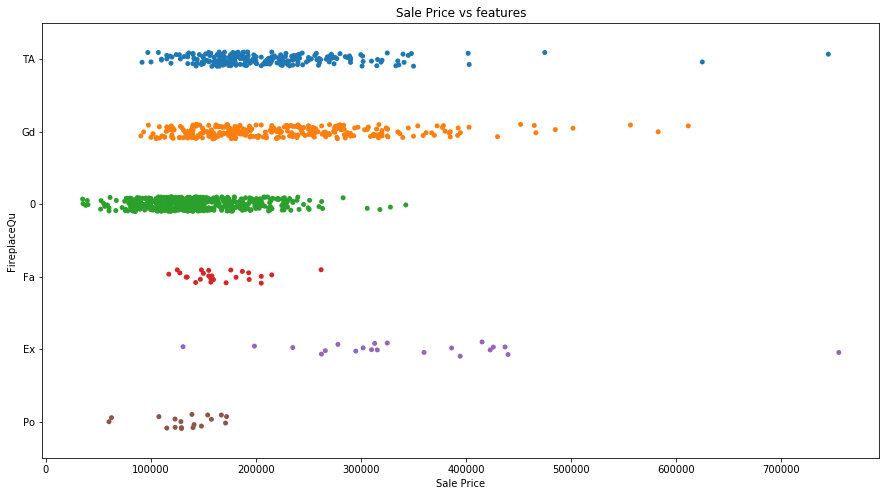

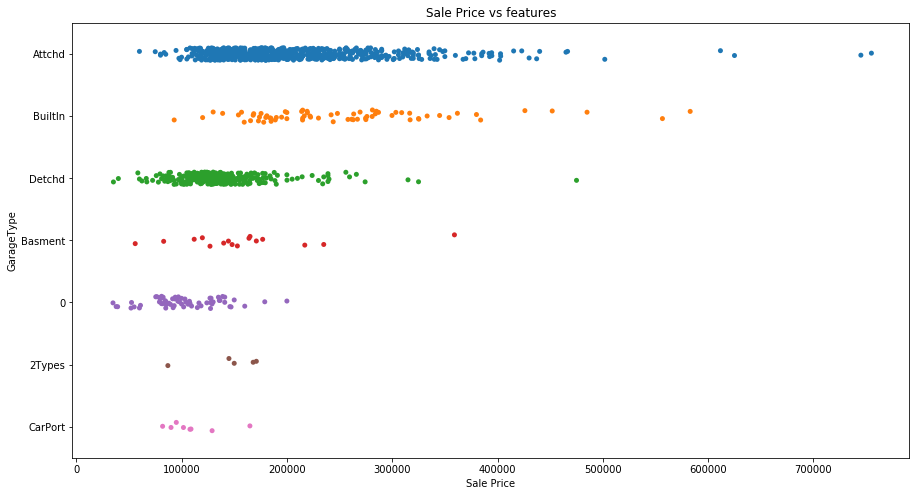

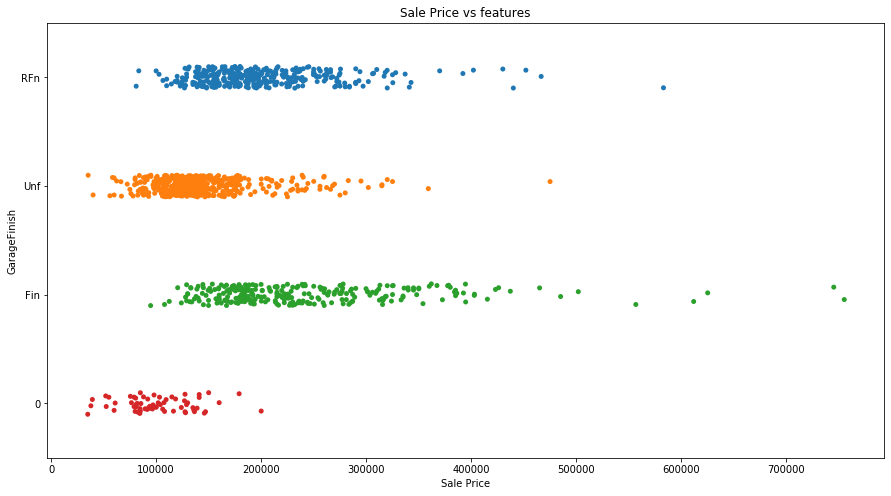

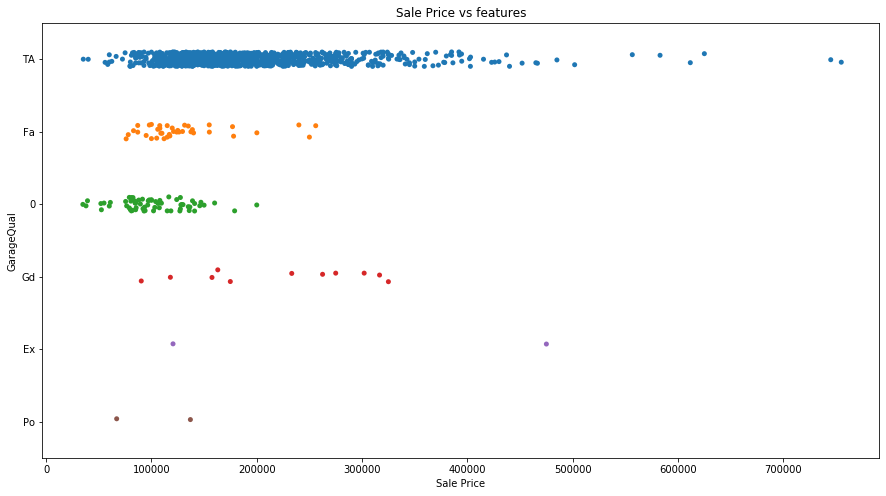

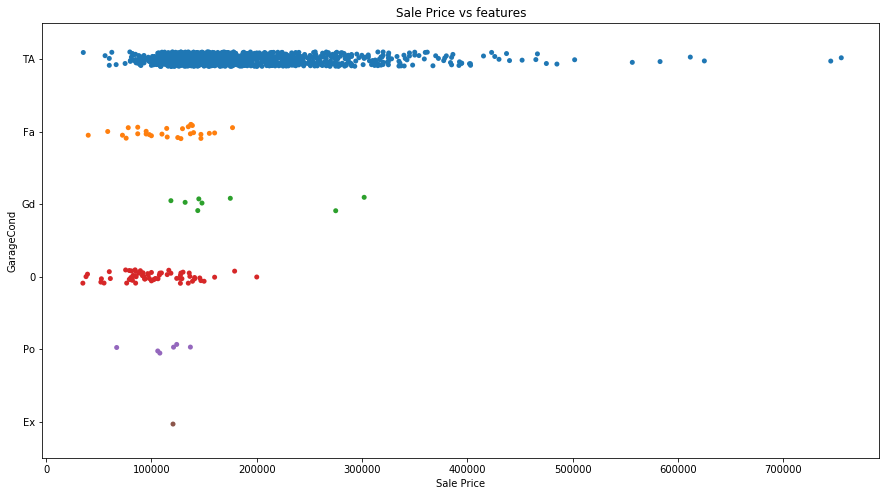

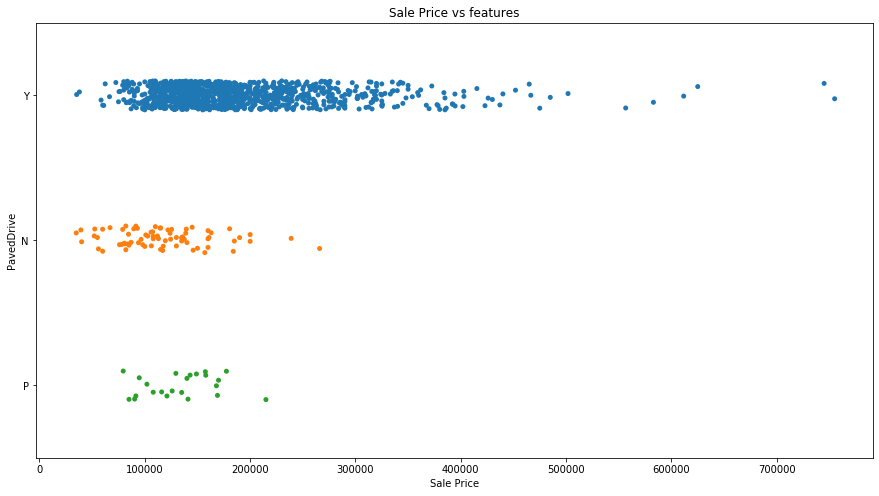

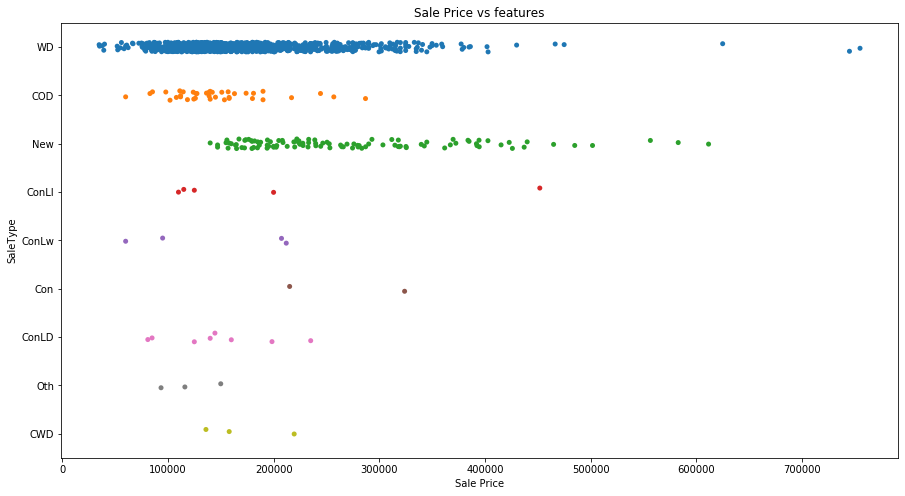

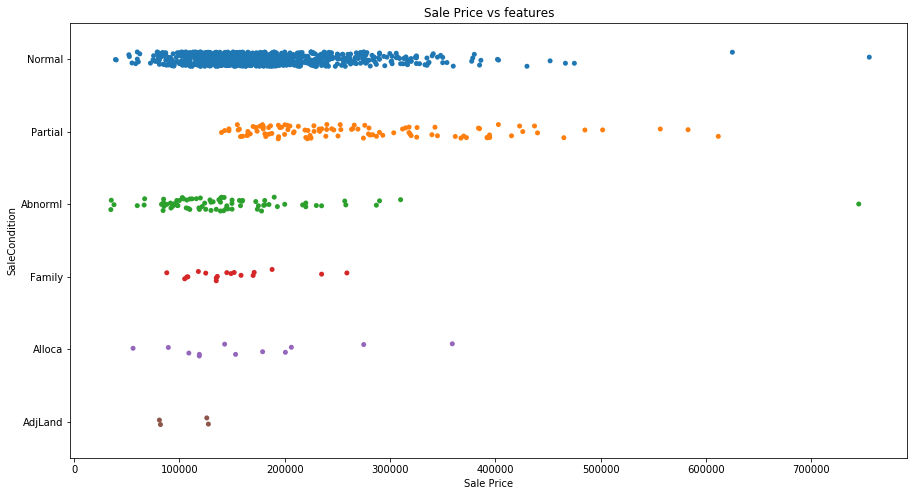

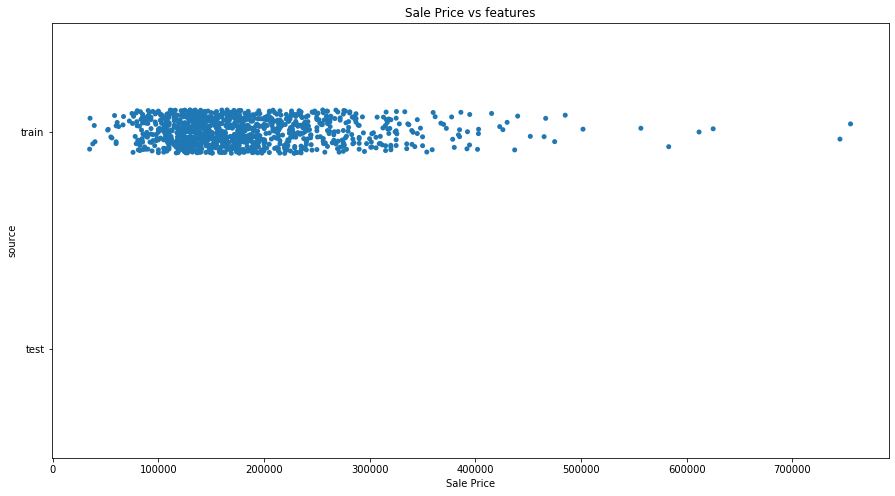

In [32]:
for i in df[object_cols]:                                #bivariate analysis
    plt.figure(figsize=(15, 8))
    plt.title('Sale Price vs features')
    ax = sns.stripplot(df['SalePrice'], df[i])
    ax.set(xlabel = 'Sale Price', ylabel = i)
    plt.show()

In [33]:
df.loc[(df['Utilities'] == 'NoSeWa')]

MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities  \
1239       RL    70.049958    14375   Pave      IR1         Lvl    NoSeWa   

     LotConfig LandSlope Neighborhood  ... GarageArea GarageQual GarageCond  \
1239   CulDSac       Gtl       Timber  ...        525         TA         TA   

     PavedDrive  WoodDeckSF  OpenPorchSF  SaleType SaleCondition SalePrice  \
1239          Y           0          118       COD       Abnorml       NaN   

     source  
1239   test  

[1 rows x 64 columns]

In [34]:
df.drop('Utilities', axis = 1, inplace = True)

In [35]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'source']


In [36]:
s = (df.dtypes != 'object')
num_cols = list(s[s].index)

print("Numerical variables:")
print(num_cols)

Numerical variables:
['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']


# Outliers and Skewness

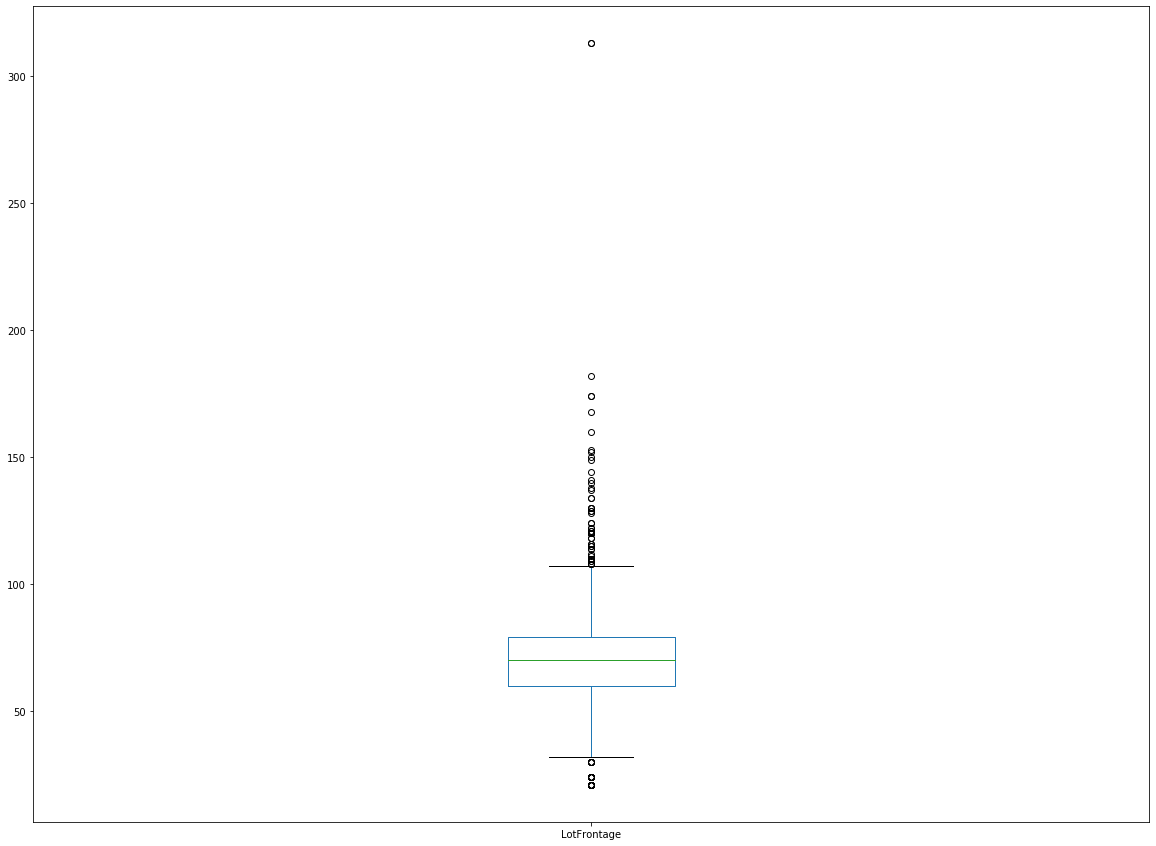

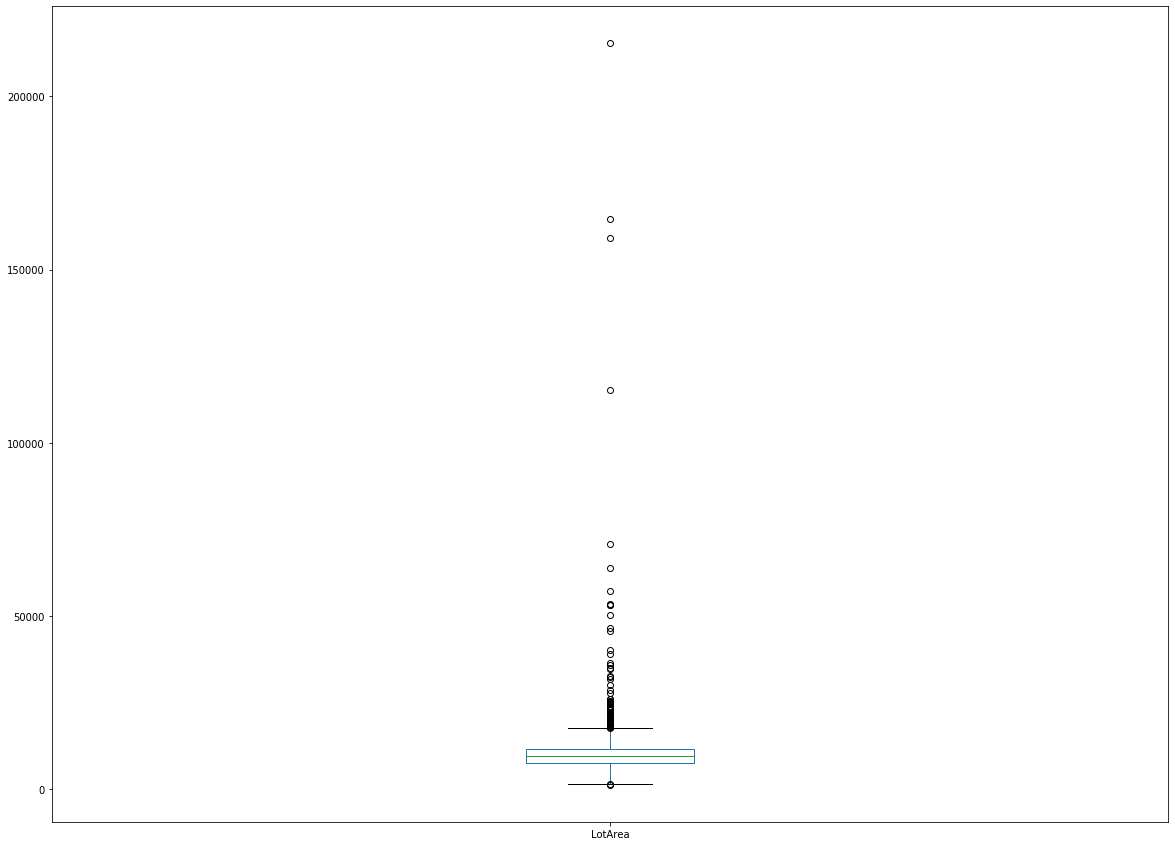

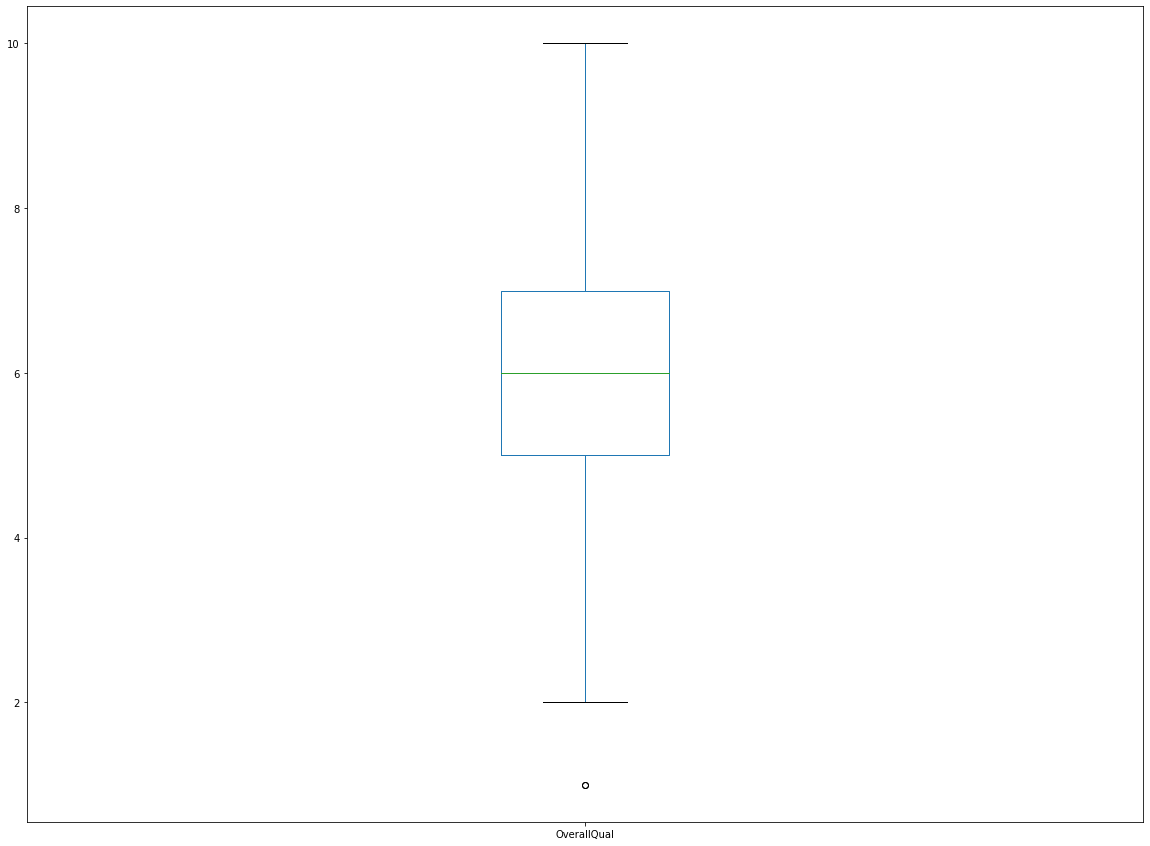

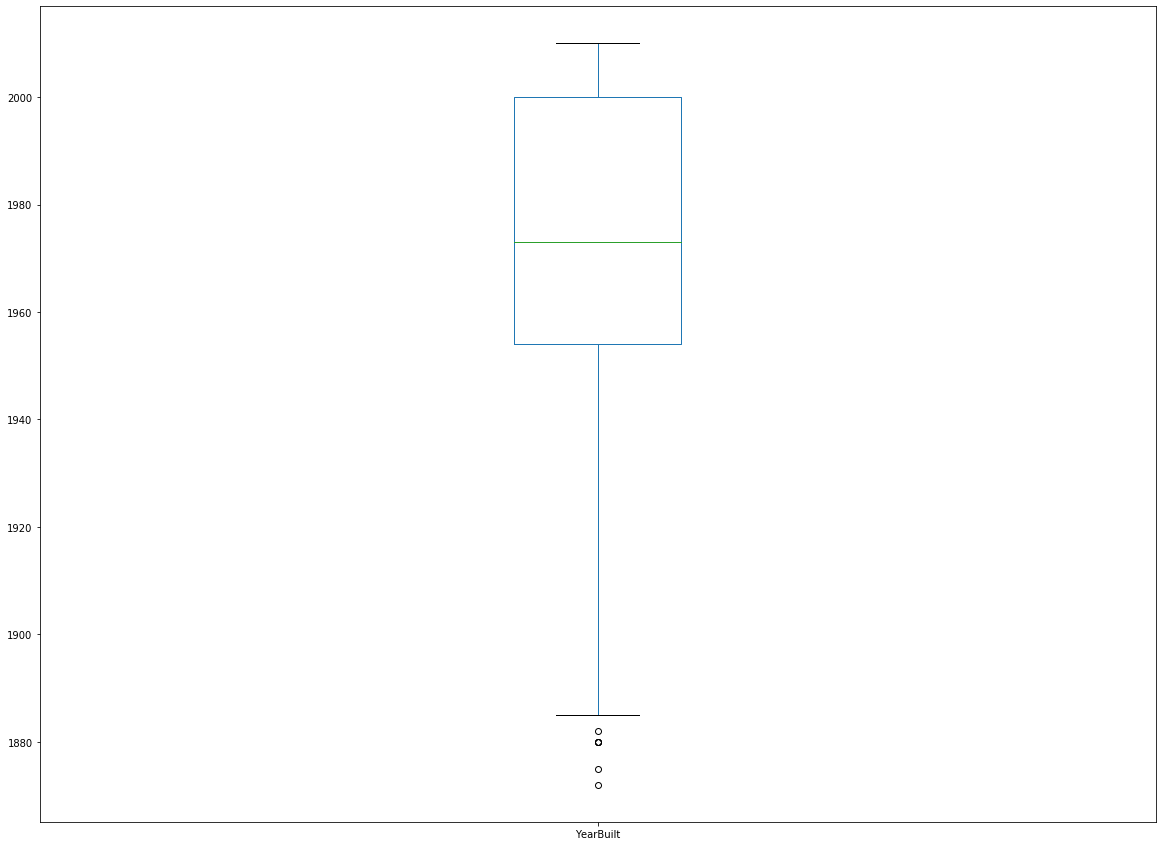

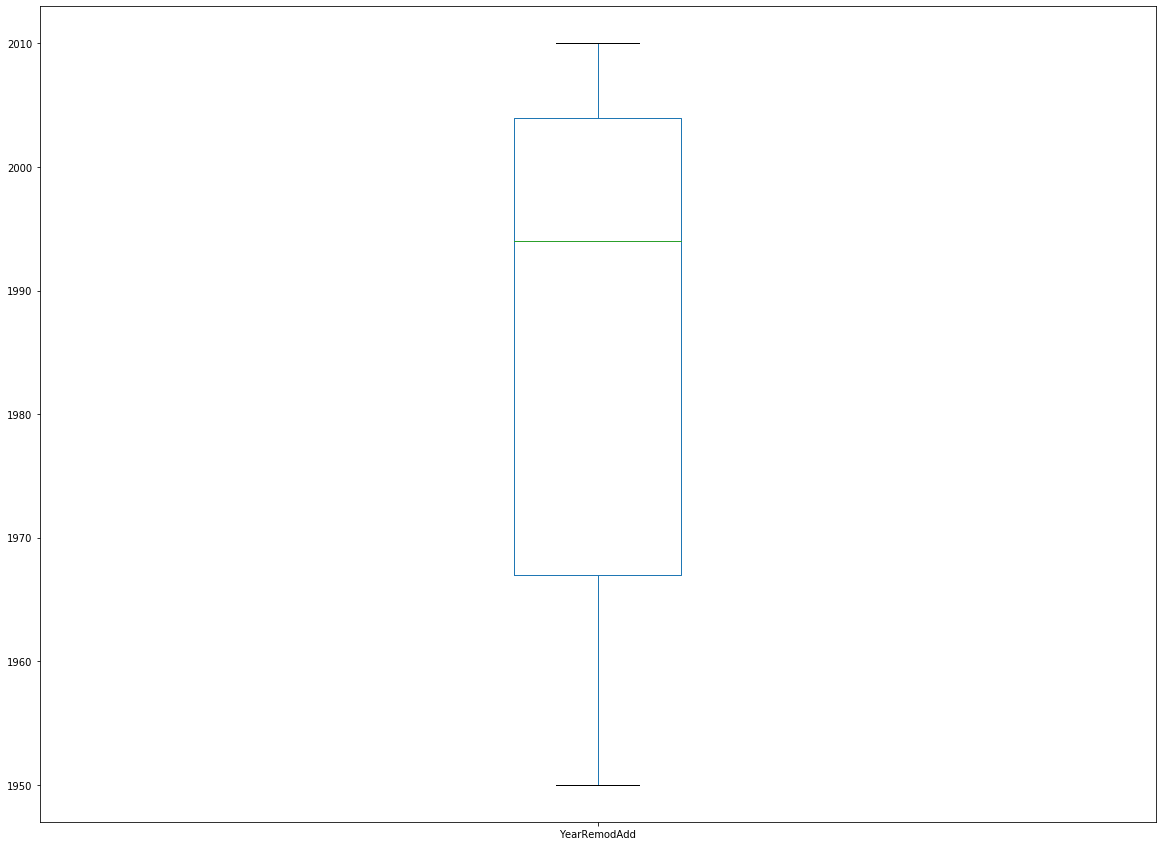

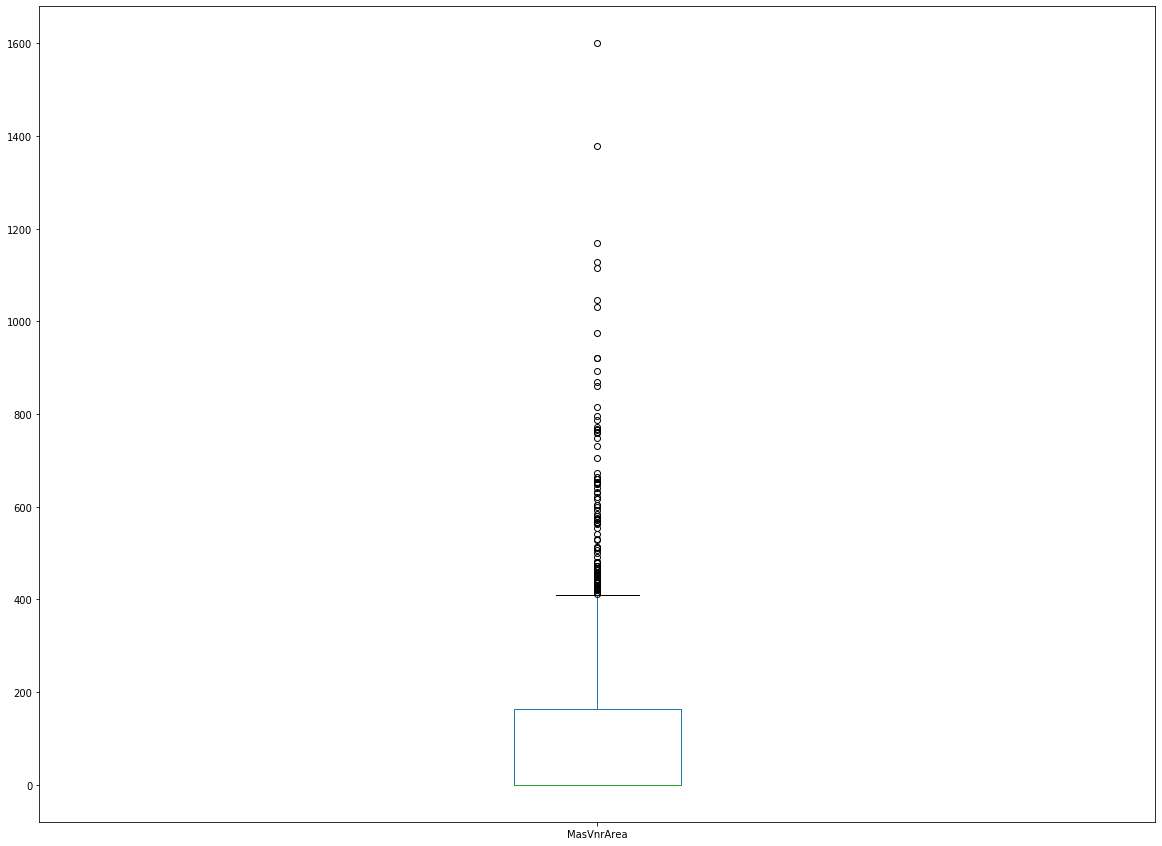

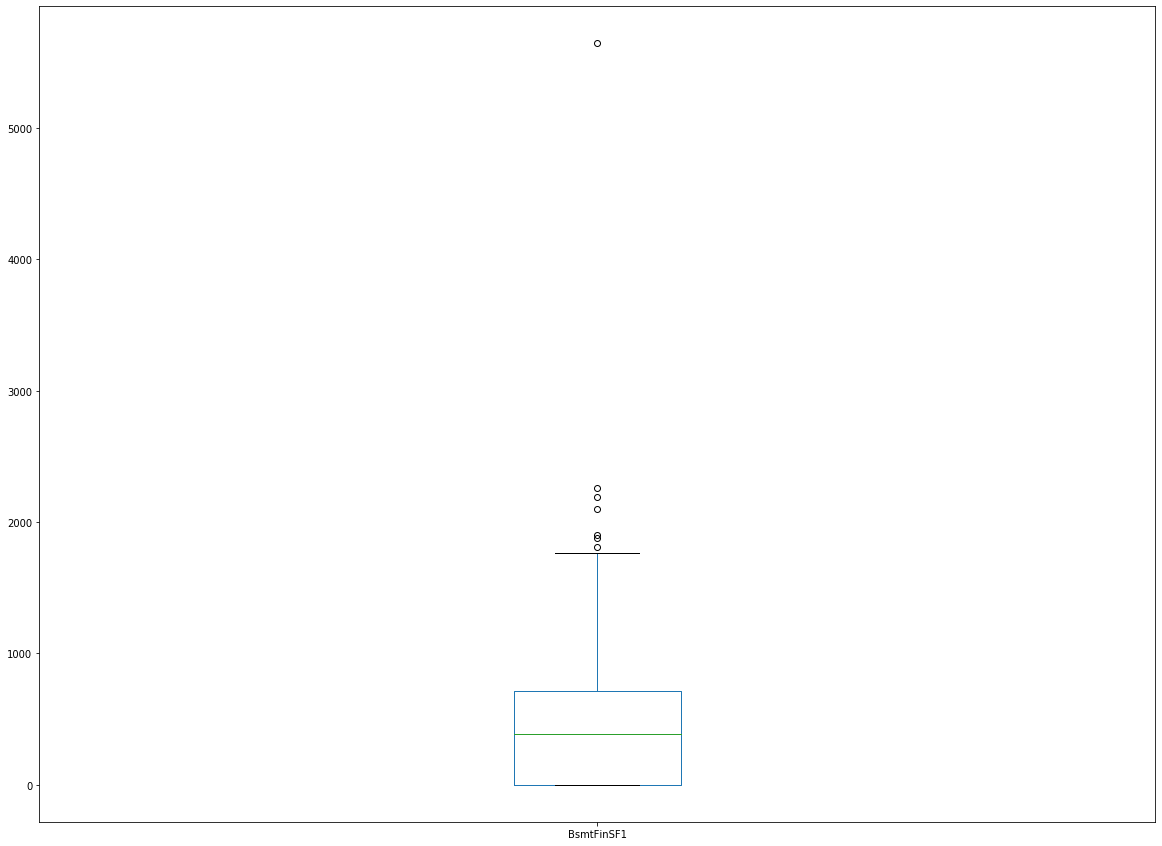

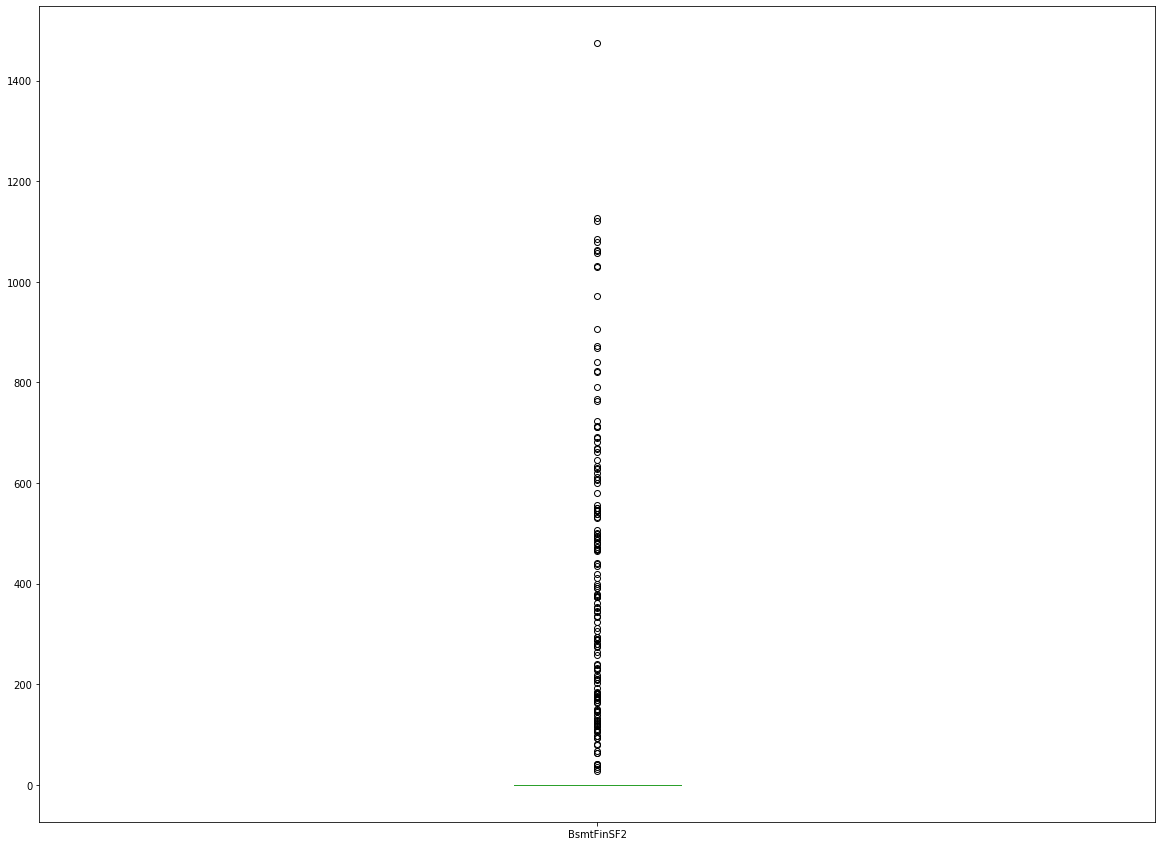

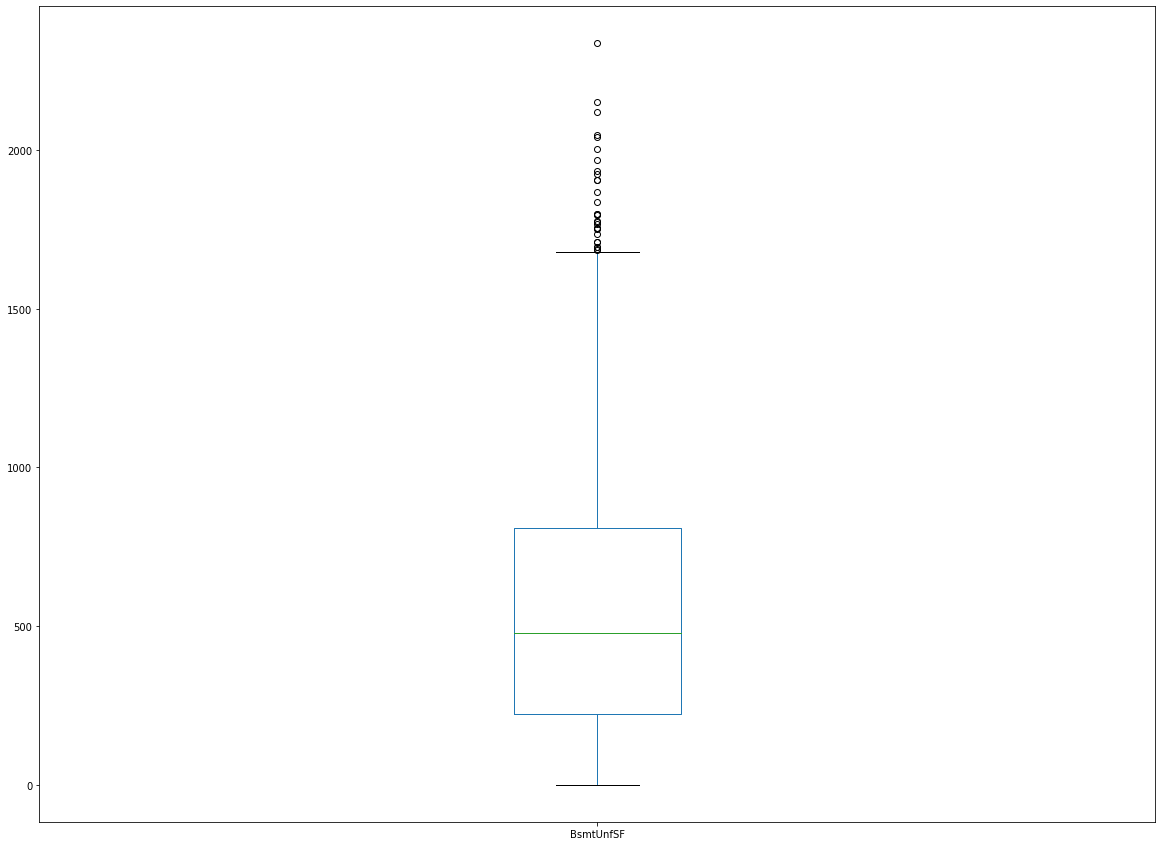

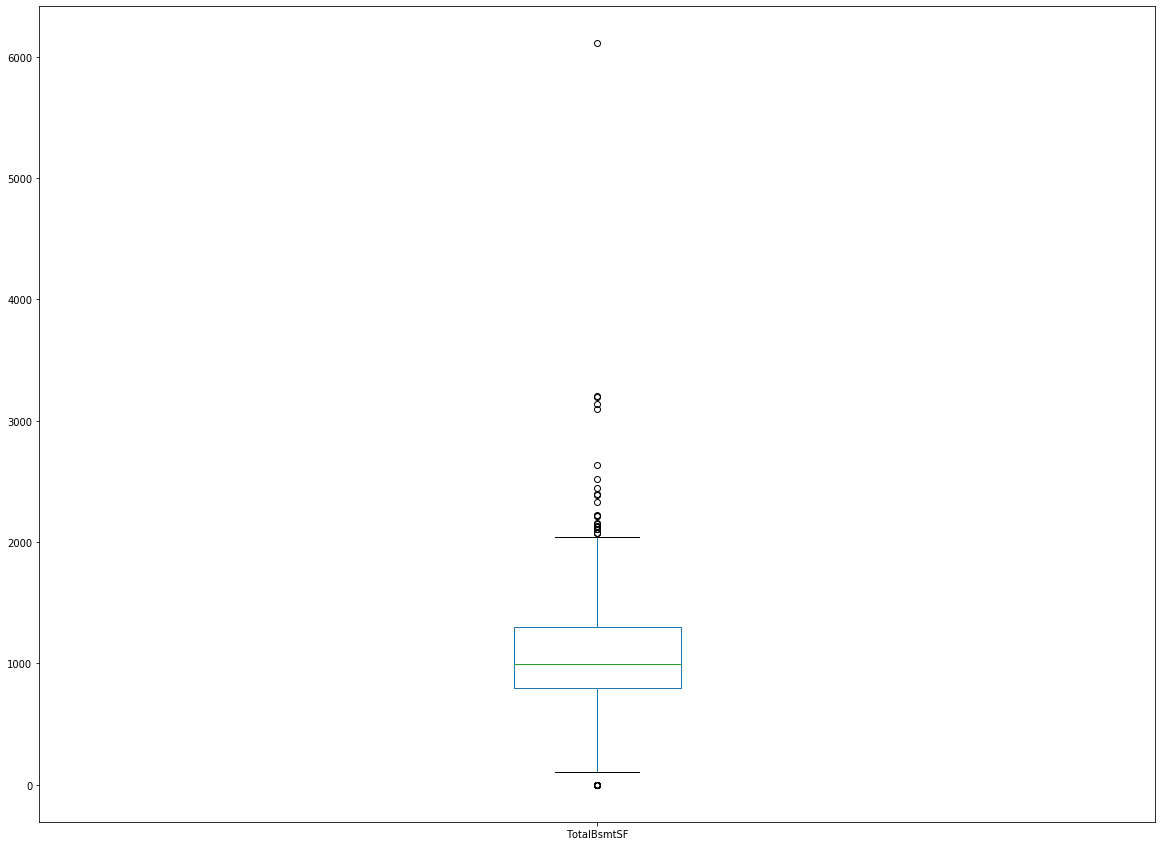

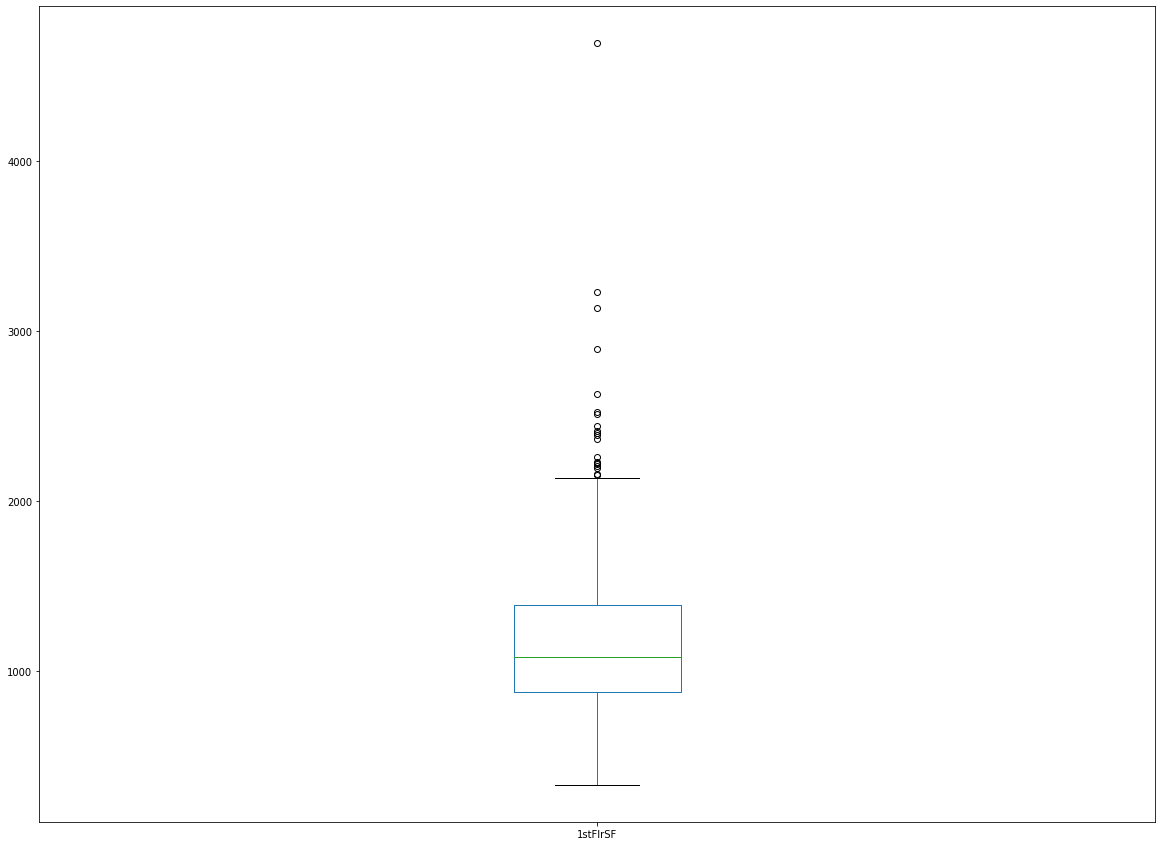

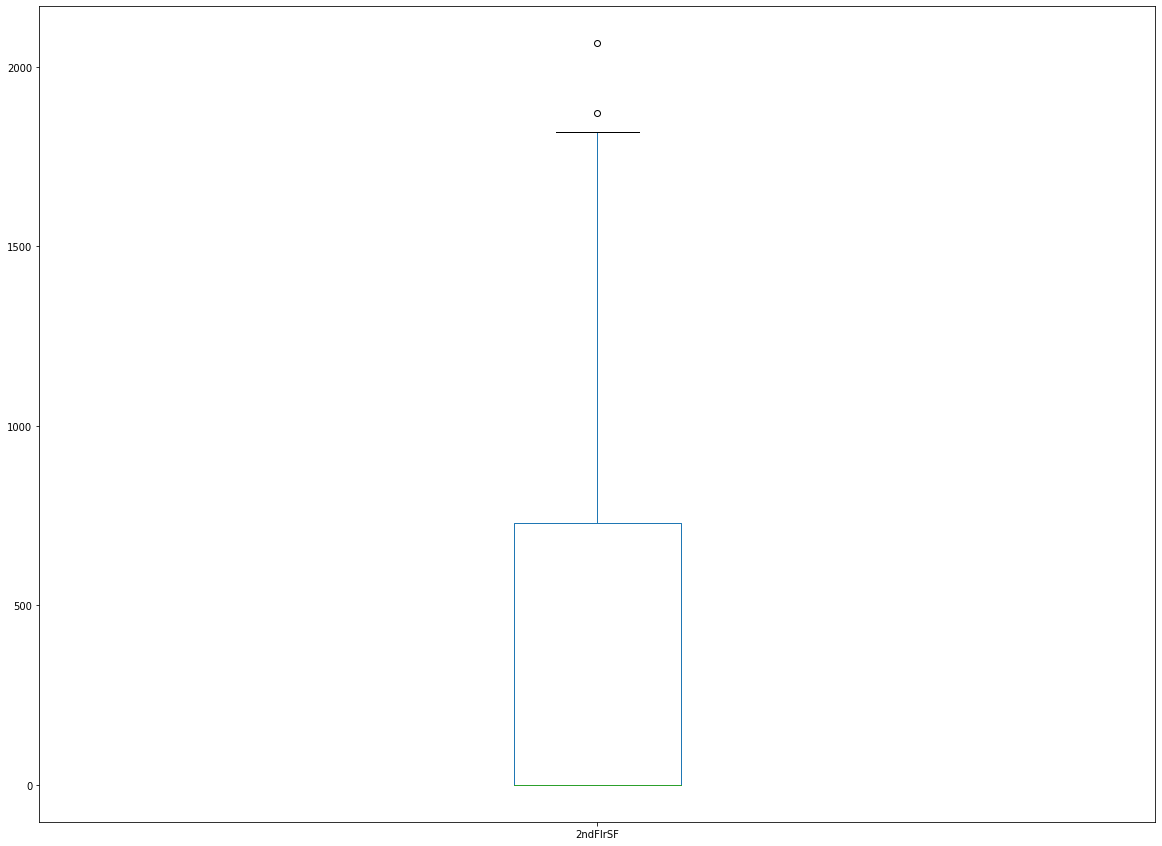

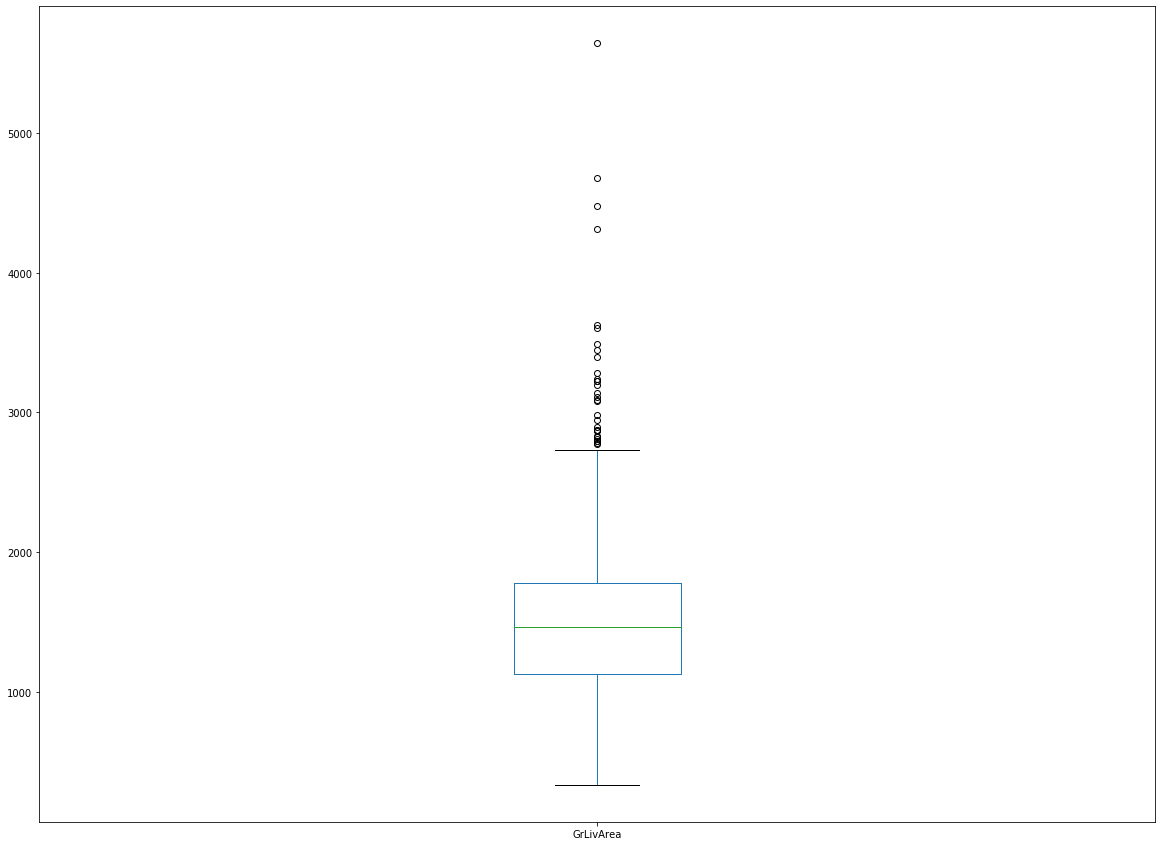

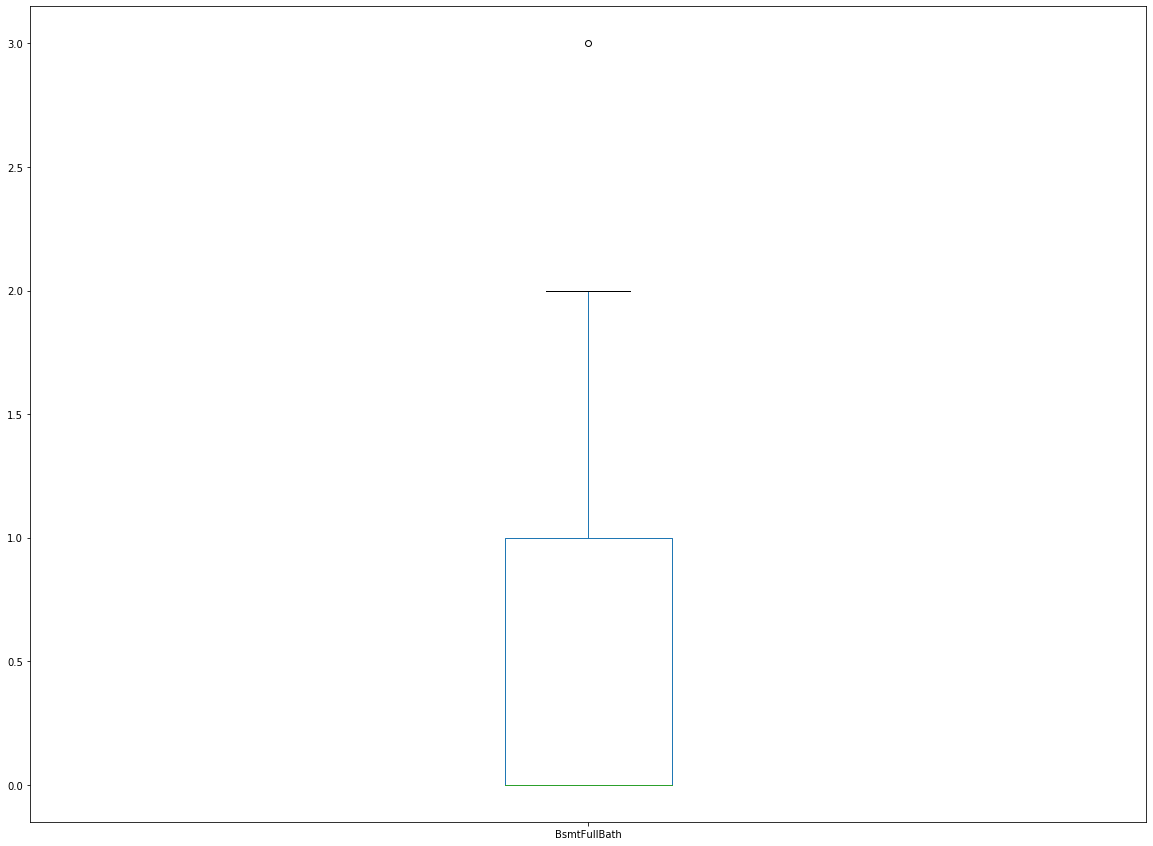

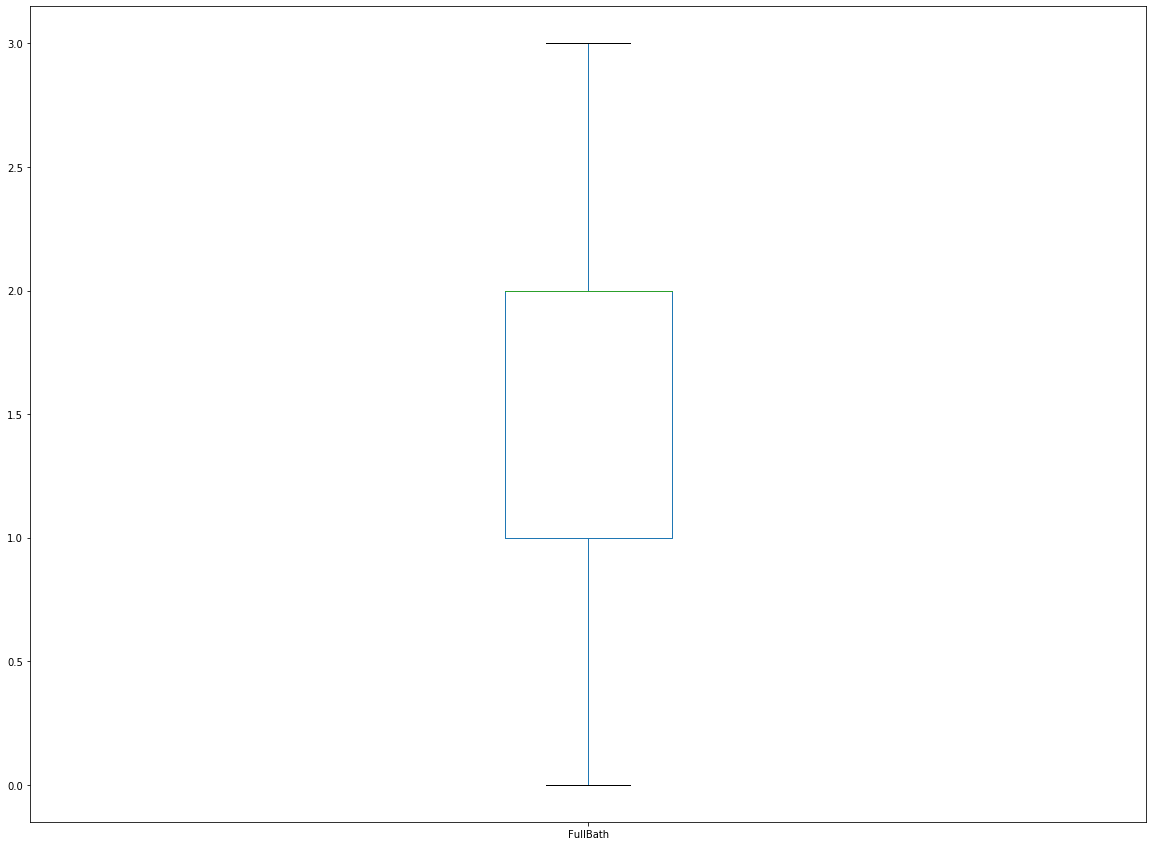

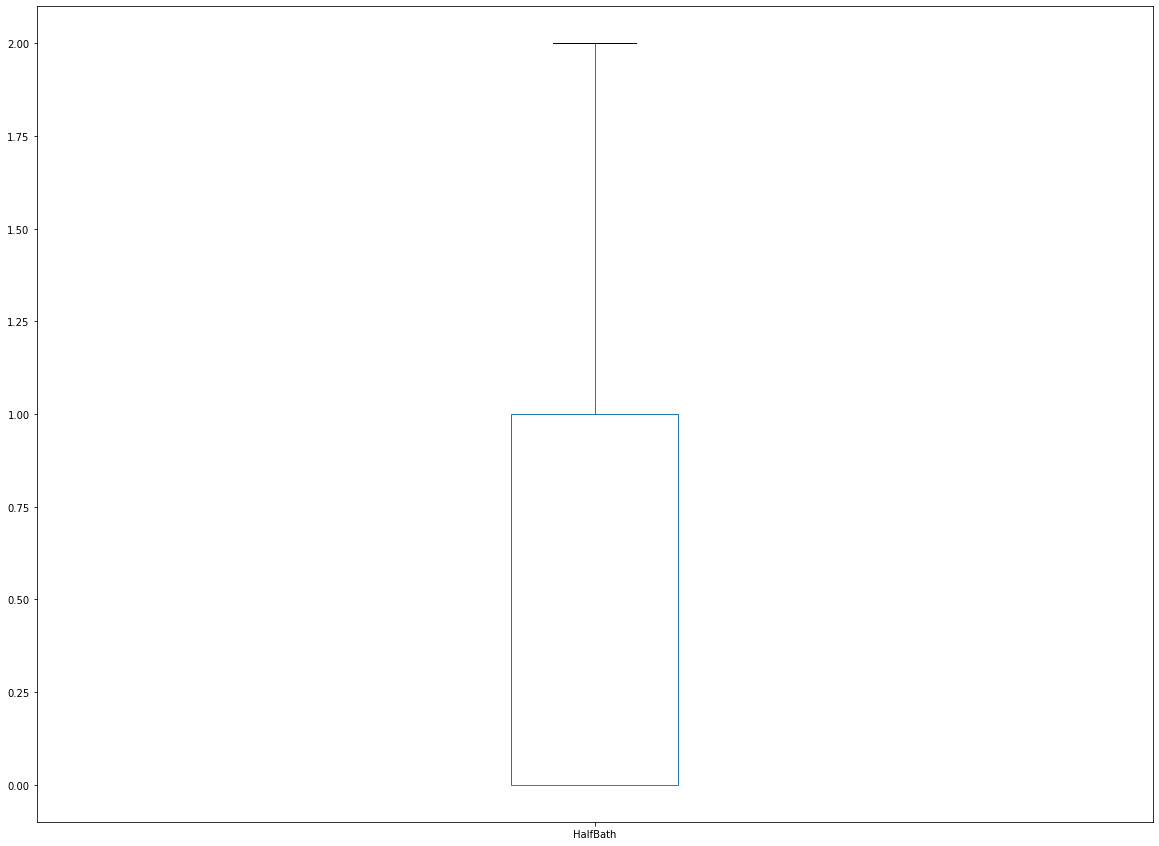

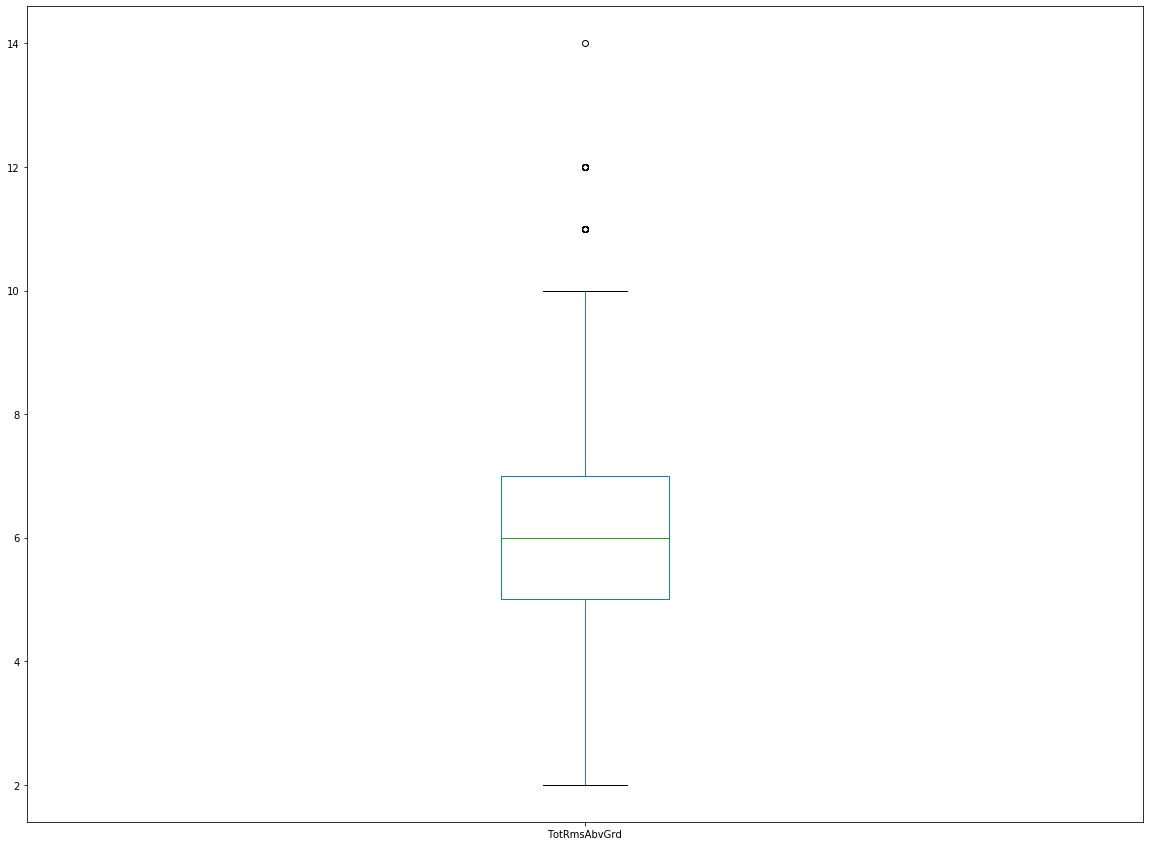

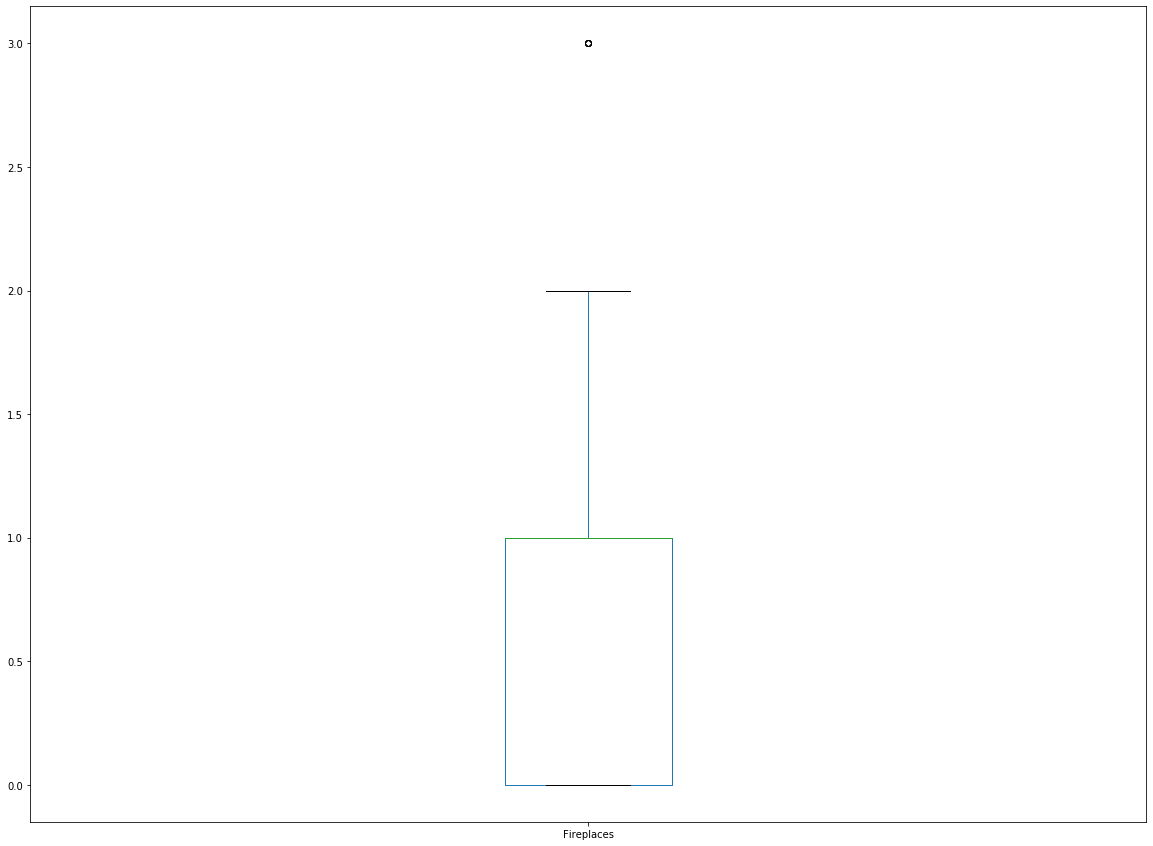

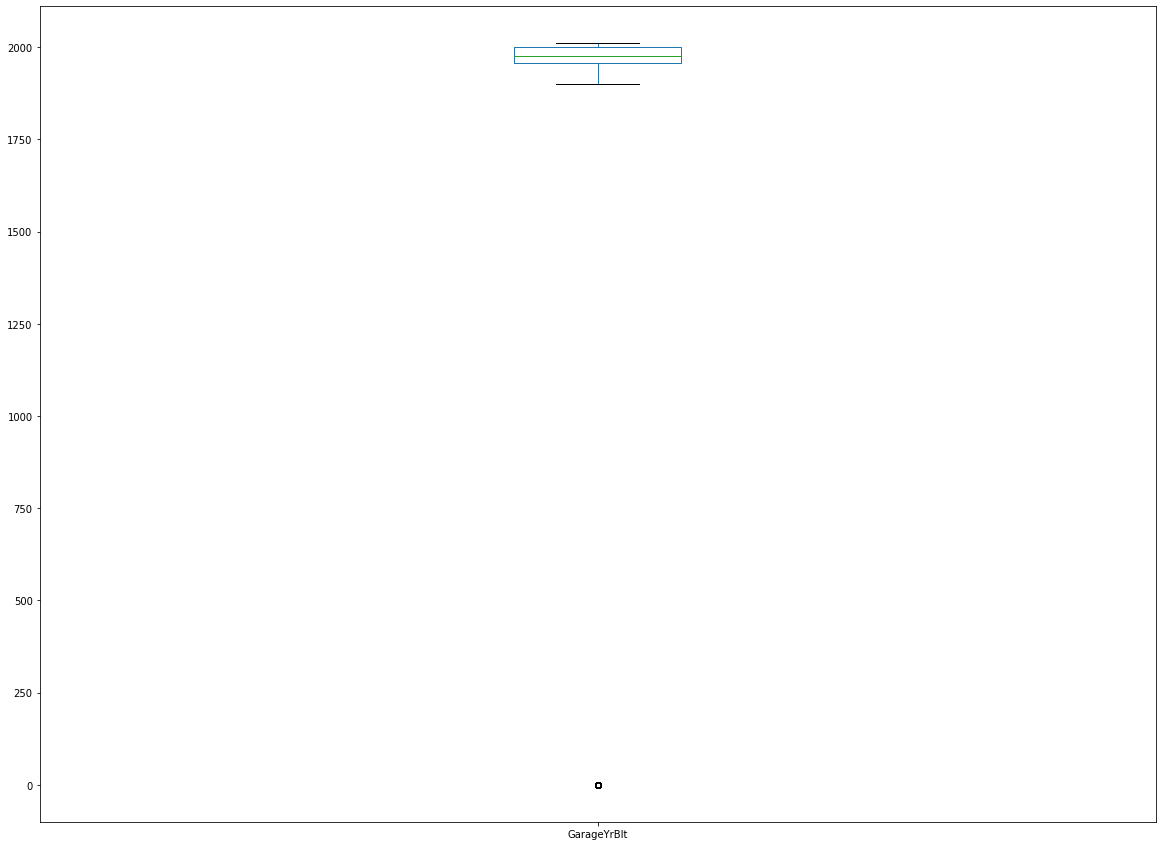

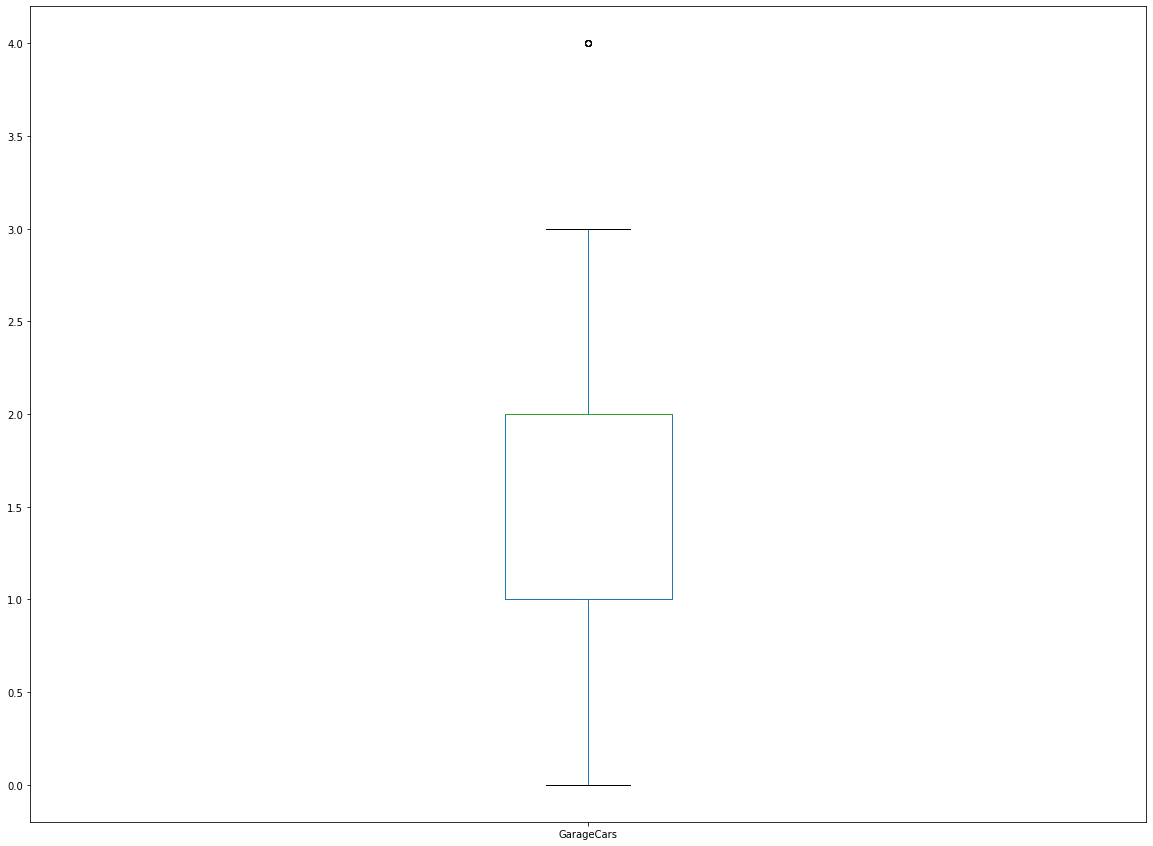

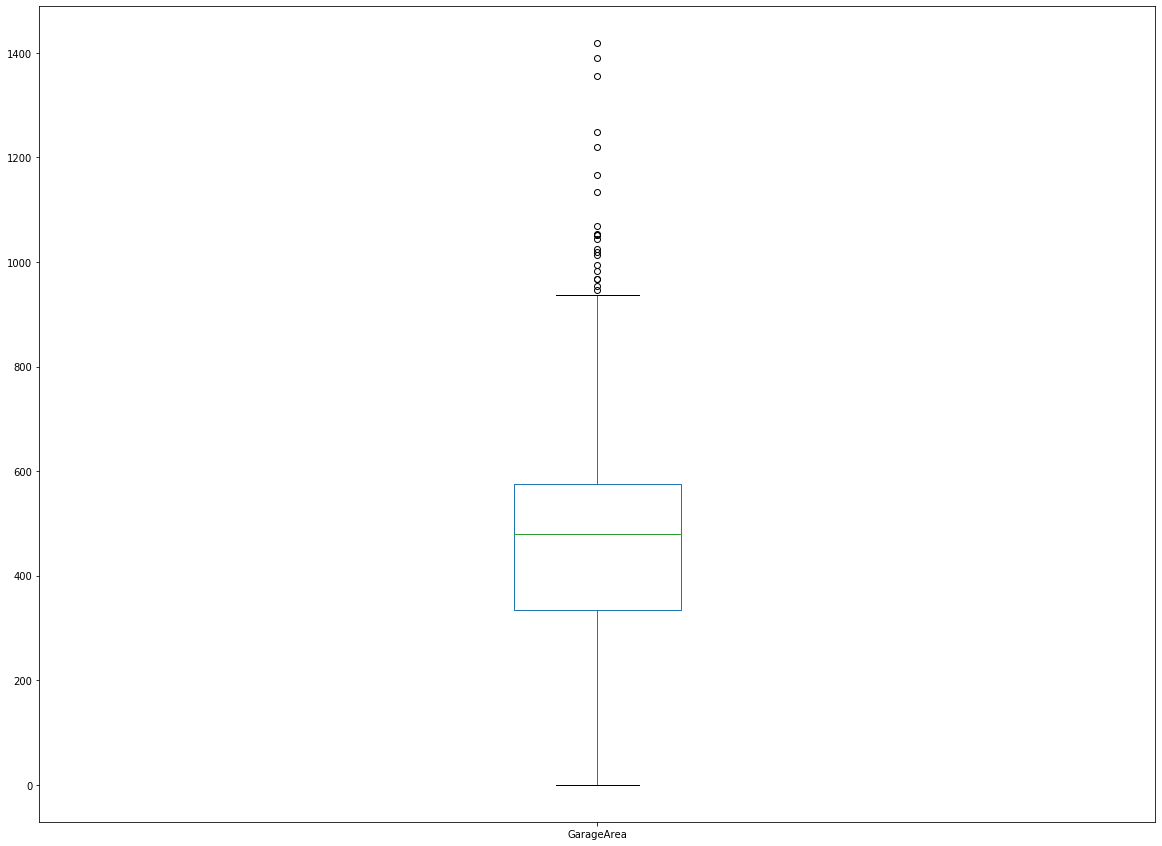

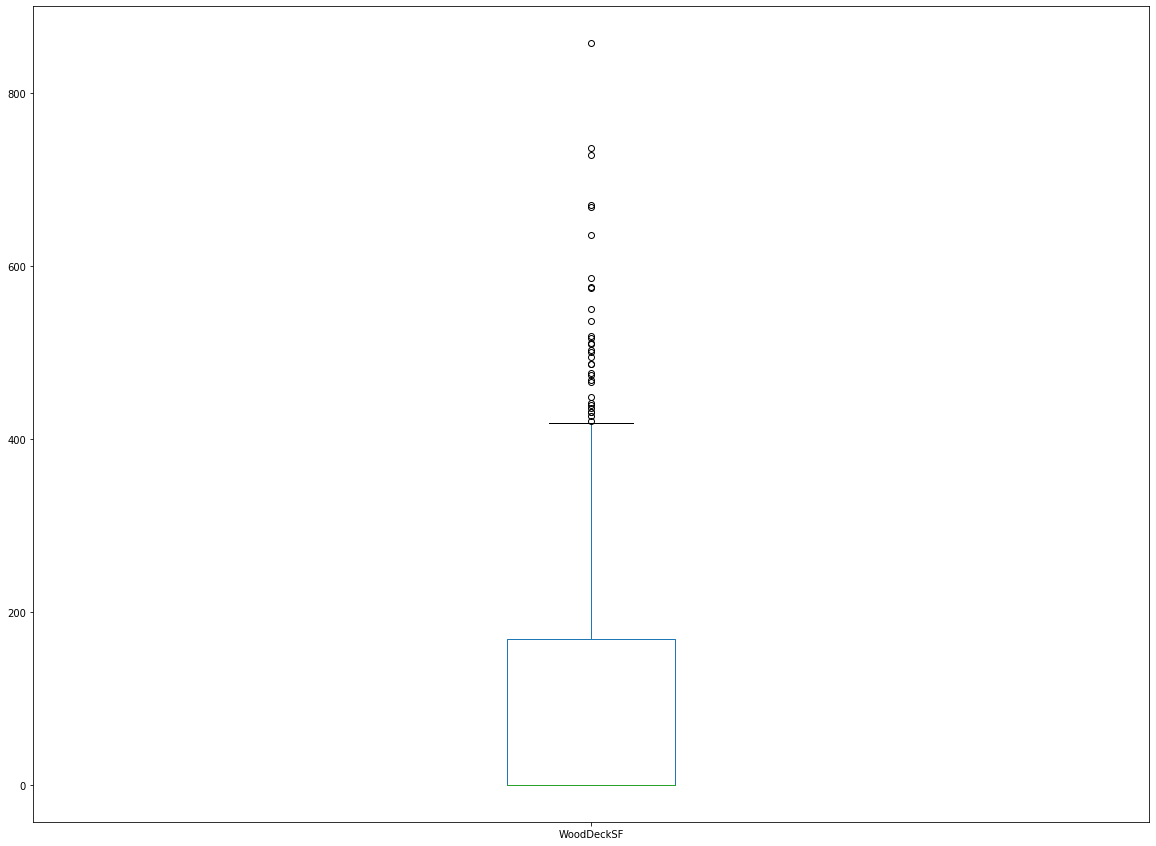

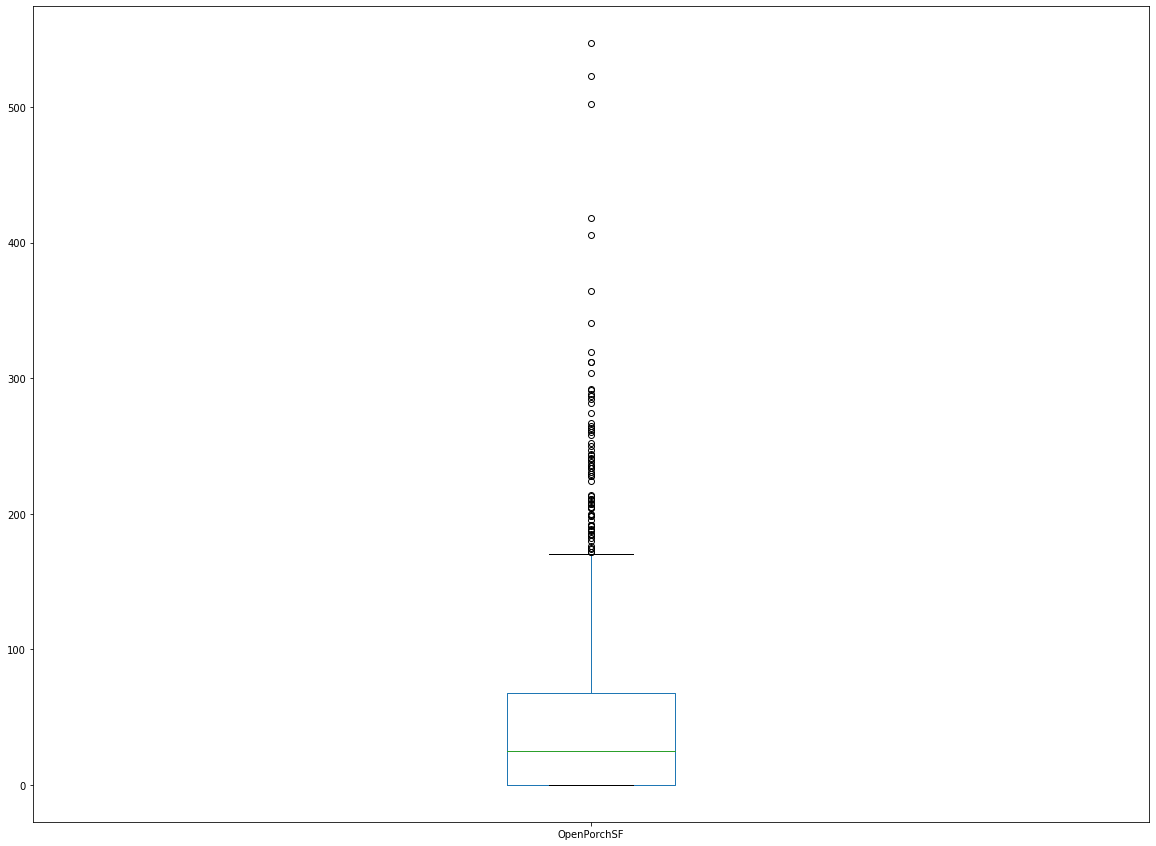

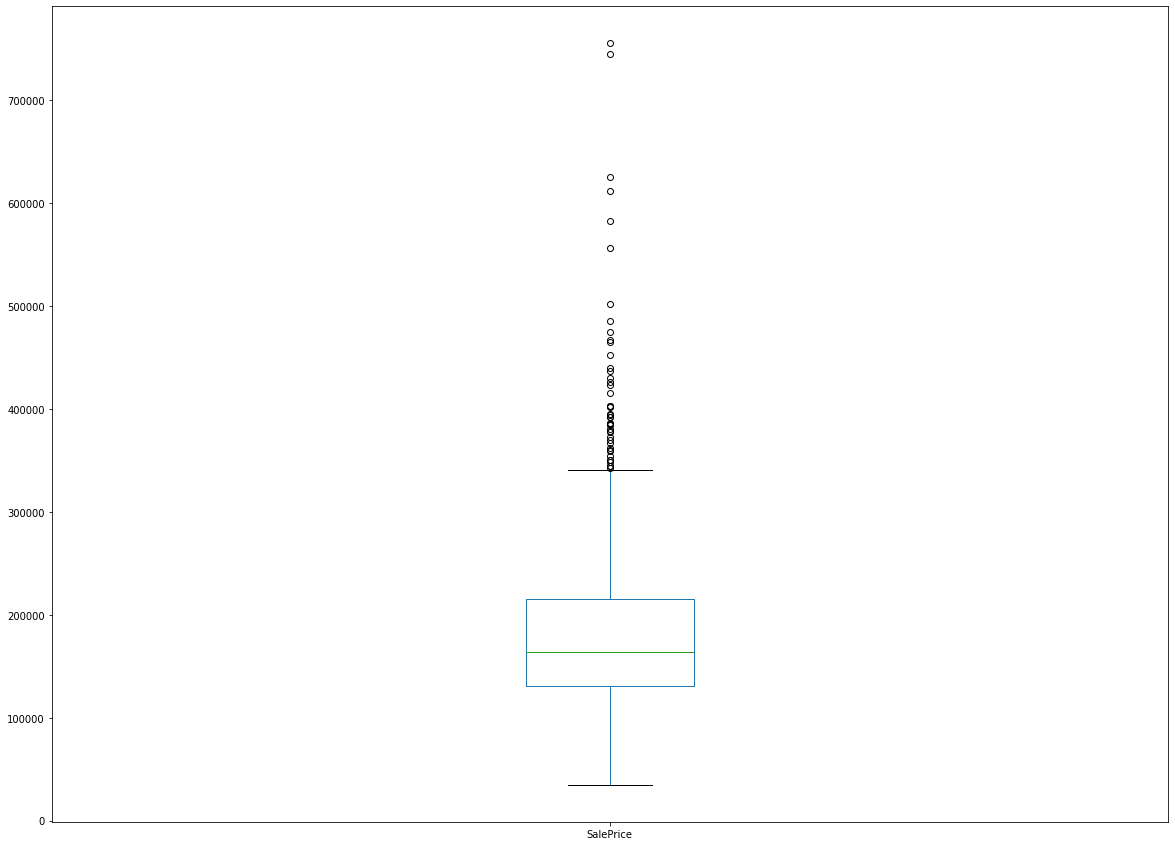

In [37]:
for i in num_cols:
    plt.figure(figsize = (20, 15))
    df[i].plot.box()

In [38]:
df[num_cols].skew()

LotFrontage      2.384950
LotArea         12.207688
OverallQual      0.216944
YearBuilt       -0.613461
YearRemodAdd    -0.503562
MasVnrArea       2.677616
BsmtFinSF1       1.685503
BsmtFinSF2       4.255261
BsmtUnfSF        0.920268
TotalBsmtSF      1.524255
1stFlrSF         1.376757
2ndFlrSF         0.813030
GrLivArea        1.366560
BsmtFullBath     0.596067
FullBath         0.036562
HalfBath         0.675897
TotRmsAbvGrd     0.676341
Fireplaces       0.649565
GarageYrBlt     -3.869501
GarageCars      -0.342549
GarageArea       0.179981
WoodDeckSF       1.541376
OpenPorchSF      2.364342
SalePrice        1.953878
dtype: float64

In [39]:
num_cols.remove('SalePrice')

In [40]:
df_new = df

In [41]:
from sklearn.preprocessing import power_transform        #removing skewness
df_new[num_cols] = power_transform(df[num_cols], method='yeo-johnson')        #using yeo-johnson method due to presence of negative skewness
df_new = pd.DataFrame(df_new, columns = df.columns)

In [42]:
df_new[num_cols].skew()

LotFrontage     0.173047
LotArea         0.026569
OverallQual     0.018233
YearBuilt      -0.134920
YearRemodAdd   -0.225561
MasVnrArea      0.426258
BsmtFinSF1     -0.411401
BsmtFinSF2      2.425650
BsmtUnfSF      -0.274971
TotalBsmtSF     0.232534
1stFlrSF       -0.001106
2ndFlrSF        0.280724
GrLivArea       0.000171
BsmtFullBath    0.360390
FullBath       -0.049435
HalfBath        0.521435
TotRmsAbvGrd    0.001879
Fireplaces      0.083549
GarageYrBlt    -3.791474
GarageCars     -0.024840
GarageArea     -0.328235
WoodDeckSF      0.132275
OpenPorchSF    -0.014772
dtype: float64

In [43]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in object_cols:
    df_new[col] = label_encoder.fit_transform(df_new[col])

Encoding object columns using Label Encoder.

In [44]:
df = df_new

In [45]:
train = df.loc[df['source'] == 1]
test = df.loc[df['source'] == 0]


Separating train and test dataset.

In [46]:
train.drop('source', axis = 1, inplace = True)
test.drop(['source', 'SalePrice'], axis = 1, inplace = True)

In [47]:
x = train.drop('SalePrice', axis = 1)
y = train['SalePrice']

In [48]:
train.head()

MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  LotConfig  \
0         3     0.086081 -1.173387       1         0            3          4   
1         3     1.159440  1.086704       1         0            3          4   
2         3     1.039598  0.169184       1         0            3          1   
3         3     1.544099  0.498627       1         0            3          4   
4         3     0.086081  1.180052       1         0            3          2   

   LandSlope  Neighborhood  Condition1  ...  GarageCars  GarageArea  \
0          0            13           2  ...    0.273835   -0.094779   
1          1            12           2  ...    0.273835    0.697262   
2          0            15           2  ...    0.273835   -0.027076   
3          0            14           2  ...    0.273835    0.375207   
4          0            14           2  ...    0.273835    0.301080   

   GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  SaleType  \
0           5           5           2   -0.950337     1.415905         8   
1           5           5           2    0.803933     1.420557         8   
2           5           5           2    1.059652     1.198532         8   
3           5           5           2   -0.950337     1.168365         0   
4           5           5           2    1.148270    -1.071307         8   

   SaleCondition  SalePrice  
0              4   128000.0  
1              4   268000.0  
2              4   269790.0  
3              4   190000.0  
4              4   215000.0  

[5 rows x 62 columns]

In [49]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x = scaler.fit_transform(x)

In [50]:
test_cols = test.columns
test = scaler.fit_transform(test)
test = pd.DataFrame(test, columns=test_cols)

test.head()

MSZoning  LotFrontage   LotArea    Street  LotShape  LandContour  \
0 -0.142702     0.935630  0.840000  0.083045 -1.402669    -2.566101   
1 -0.142702     0.232624 -0.742244  0.083045 -1.402669     0.299297   
2 -0.142702     0.232624  0.518434  0.083045  0.745474     0.299297   
3 -0.142702     0.459700  0.542804  0.083045  0.745474    -3.998799   
4 -0.142702     0.935630  0.895318  0.083045 -1.402669     0.299297   

   LotConfig  LandSlope  Neighborhood  Condition1  ...  GarageFinish  \
0  -2.001106  -0.226274      1.552004   -0.032019  ...     -1.096769   
1  -1.351136  -0.226274      1.552004   -0.032019  ...     -0.036317   
2   0.598774  -0.226274     -1.277283   -0.032019  ...     -0.036317   
3   0.598774  -0.226274     -1.110854   -0.032019  ...      1.024135   
4  -1.351136  -0.226274      1.385575   -1.200730  ...     -1.096769   

   GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  \
0    1.799019    1.007724    0.327458    0.306573    0.281378    1.119469   
1    0.322275    0.532317    0.327458    0.306573    0.281378    0.779728   
2    0.322275    0.343540    0.327458    0.306573    0.281378    1.159177   
3   -0.991359   -1.017945    0.327458    0.306573    0.281378   -0.911749   
4    1.799019    0.973982    0.327458    0.306573    0.281378    0.933829   

   OpenPorchSF  SaleType  SaleCondition  
0     0.734155  0.242421       0.211151  
1    -1.117602 -6.266715      -3.583077  
2     1.251724  0.242421       0.211151  
3    -1.117602  0.242421       0.211151  
4     0.254196  0.242421       0.211151  

[5 rows x 61 columns]

# Model Building

In [83]:
from sklearn.model_selection import train_test_split         #for splitting dataset into train and test
from sklearn.metrics import r2_score                         #for model evaluation
from sklearn.metrics import mean_squared_error               #for model evaluation
from sklearn.metrics import mean_absolute_error              #for checking model accuracy
from sklearn.linear_model import LinearRegression            #regression model
from sklearn.tree import DecisionTreeRegressor               #regression model
from sklearn.ensemble import RandomForestRegressor           #regression model
from sklearn.model_selection import cross_val_score          #for cross validating model
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

In [52]:
maxr2score = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    r2 = r2_score(y_test, predrf)
    if r2>maxr2score:
        maxr2score = r2
        maxRS = i
print ('Max R2 score obtained is', maxr2score, 'on Random State', maxRS)

Max R2 score obtained is 0.867801454152508 on Random State 454


In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = maxRS)

In [54]:
LR = LinearRegression()
LR.fit(x_train, y_train)
pred = LR.predict(x_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))
print (mean_absolute_error(y_test, pred))

0.867801454152508
735094039.9135237
20145.998588657385


In [55]:
ridge = Ridge(alpha=1)

In [56]:
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))
print (mean_absolute_error(y_test, pred))

0.8681626382488395
733085664.7470431
20110.64006562844


In [59]:
alphas = np.logspace(5,-5,50)
ridgecv = RidgeCV(alphas=alphas)
ridgecv.fit(x_train, y_train)
pred = ridgecv.predict(x_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))
print (mean_absolute_error(y_test, pred))

0.8766935234681426
685649417.7014033
19035.690496686544


In [61]:
lasso = Lasso(alpha=1)
lasso.fit(x_train, y_train)
pred = lasso.predict(x_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))
print (mean_absolute_error(y_test, pred))

0.8678341332448049
734912326.8256584
20142.75155425224


In [63]:
lassocv = LassoCV(alphas=alphas)
lassocv.fit(x_train, y_train)
pred = lassocv.predict(x_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))
print (mean_absolute_error(y_test, pred))

0.8738393072673454
701520373.8029253
19123.43193832554


In [64]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
pred = dt.predict(x_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))
print (mean_absolute_error(y_test, pred))

0.7243504709743587
1532757600.2649572
28016.156695156697


In [65]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))
print (mean_absolute_error(y_test, pred))

0.8907211137838775
607648574.5806234
17636.174415954418


In [66]:
models = [LR, dt, rf]
for i in models:
    cvs = cross_val_score(i, x, y, cv = 5)
    print ('Cross Validation Score for ',i, ' model is :', cvs.mean())
    print (' ')

Cross Validation Score for  LinearRegression()  model is : 0.7784735787202403
 
Cross Validation Score for  DecisionTreeRegressor()  model is : 0.738743265077213
 
Cross Validation Score for  RandomForestRegressor()  model is : 0.8466069052108691
 


# Hypertuning using GridSearchCV

In [67]:
from sklearn.model_selection import GridSearchCV

In [69]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

grid_cv_dt = GridSearchCV(dt, param_grid, cv=5)

grid_cv_dt.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [70]:
grid_cv_dt.best_params_

{'criterion': 'mae',
 'max_depth': 8,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 20,
 'min_samples_split': 20}

In [72]:
gdt = DecisionTreeRegressor(criterion = 'mae', max_depth = 8, max_leaf_nodes = 100, min_samples_leaf = 20, min_samples_split = 20)
gdt.fit(x_train, y_train)
predgdt = gdt.predict(x_test)
print (r2_score(y_test, predgdt))
print (mean_squared_error(y_test, predgdt))
print (mean_absolute_error(y_test, predgdt))

0.7831458594547274
1205824052.1745014
24938.60826210826


In [73]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae']
}

grid_cv_rf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5)
grid_cv_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [74]:
grid_cv_rf.best_params_

{'criterion': 'mae',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [75]:
rfr = RandomForestRegressor(random_state = maxRS, max_features = 'sqrt', n_estimators = 500, max_depth = 8, criterion='mae')
rfr.fit(x_train, y_train)
predrfr = rfr.predict(x_test)
print (r2_score(y_test, predrfr))
print (mean_squared_error(y_test, predrfr))
print (mean_absolute_error(y_test, predrfr))

0.8838746954922044
645718291.979556
17162.55777207977


After hypertuning, Random Forest Regressor model has the highest R2 score.

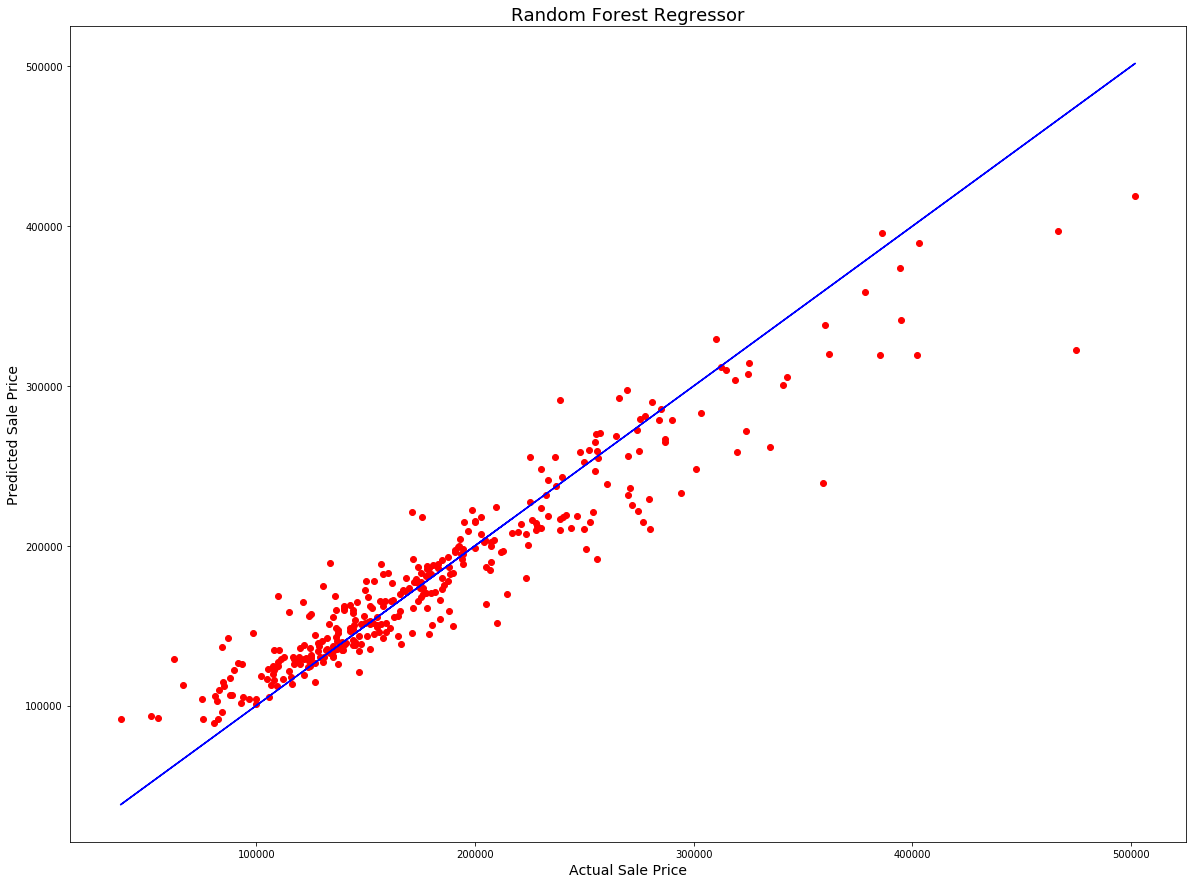

In [85]:
plt.figure(figsize = (20, 15))
plt.scatter(x = y_test, y = predrfr, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual Sale Price', fontsize = 14)
plt.ylabel('Predicted Sale Price', fontsize = 14)
plt.title('Random Forest Regressor', fontsize = 18)
plt.show()

In [78]:
import pickle

filename = 'House Price Rfr.pkl'
pickle.dump(rfr, open(filename, 'wb'))

# Using the Test set

In [79]:
fitted_model = pickle.load(open('House Price Rfr.pkl', 'rb'))

In [80]:
fitted_model

RandomForestRegressor(criterion='mae', max_depth=8, max_features='sqrt',
                      n_estimators=500, random_state=454)

In [81]:
predictions = fitted_model.predict(test)

In [82]:
predictions

array([330230.748, 204993.619, 257573.81 , 169106.463, 242145.146,
        91678.945, 149024.565, 324879.879, 238042.19 , 173937.386,
        94887.115, 152554.56 , 128507.075, 192986.885, 312352.631,
       127379.024, 117977.01 , 132639.898, 173180.147, 196516.282,
       148718.659, 156088.117, 151712.317, 101427.454, 112549.054,
       130555.079, 180809.054, 149253.574, 173350.223, 114933.843,
       144626.379, 192939.452, 234522.333, 163818.995, 118849.988,
       179534.157, 196593.333, 118686.351, 161598.709, 151865.183,
       118976.614, 299834.958, 204797.169, 187247.638, 145000.334,
       129272.437, 129963.313, 112146.613, 203665.292, 338879.604,
       146177.73 , 207426.171, 111000.497, 110659.951, 276593.499,
       130302.077, 147417.851, 188949.997, 124851.976, 252950.2  ,
       105645.831, 180147.435, 139125.001, 151224.889, 193089.122,
       108161.83 , 155317.532, 204991.454, 139198.752, 164380.538,
       271906.849, 165537.187, 163324.238, 163138.031, 146145.